In [1]:
pip install dcor --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\saadr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install torch==2.2.0 --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\saadr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import json
import math
import os
import pandas as pd
import torch
import time as time
from omegaconf import OmegaConf

In [4]:
pd.set_option('display.max_columns', None)

In [9]:
# Read pickles from the path specified in config.dest_file
config_path = "config.yaml"  # Replace with the path to your config file
config = OmegaConf.load(config_path)
df_encoded_path = os.path.join(config.dest_file, "df_encoded.csv")
# Load the DataFrame from the CSV file
df = pd.read_csv(df_encoded_path)

In [10]:
df.head(-5)

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,weightChassisProcessed,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,weightCavityProcessed,weightMould,totalTransportationPercentage,percentageAircraft,percentageLorry,percentageTrain,percentageShip,totalDistance,transportCost,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nAnniProduzione,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,cycleTime,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,memtiEngineValue,steelPrice,runnersType,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,gateDiameter,setupTime,warmupTime,deliveryVolume,deliveryPeriod,mouldDesignCostDisplay,mouldTotalCost,Cost,human health - photochemical oxidation,ecosystem quality - terrestrial ecotoxicity,resources - mineral extraction,resources - non-renewable energy,ecosystem quality - terrestrial acidification & nutrification,resources - total,human health - ionising radiation,human health - respiratory effects (inorganics),human health - total,human health - human toxicity,ecosystem quality - aquatic ecotoxicity,climate change - climate change,human health - ozone layer depletion,ecosystem quality - land occupation,climate change - total,ecosystem quality - total
0,3.0,1.0,3.0,2.0,0.0,3.0,2.0,3.0,1.0,0.0,4.0,3.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0,56093.360588,0.000005,0.000885,0.000019,0.001452,0.000023,0.001471,0.000599,0.002724,0.004244,0.000916,0.000017,0.001938,1.483623e-07,0.000036,0.001938,0.000961
1,3.0,1.0,3.0,1.0,2.0,4.0,1.0,1.0,1.0,0.0,4.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0,43493.360588,0.000004,0.000805,0.000018,0.001366,0.000022,0.001384,0.000567,0.002586,0.004010,0.000853,0.000016,0.001825,1.379114e-07,0.000032,0.001825,0.000874
2,3.0,0.0,3.0,2.0,3.0,2.0,2.0,3.0,1.0,0.0,2.0,3.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0,102993.360588,0.000005,0.000885,0.000019,0.001452,0.000023,0.001470,0.000599,0.002723,0.004243,0.000916,0.000017,0.001938,1.483223e-07,0.000036,0.001938,0.000960
3,3.0,1.0,1.0,1.0,3.0,4.0,1.0,2.0,1.0,0.0,4.0,3.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0,44993.360588,0.000004,0.000853,0.000018,0.001414,0.000022,0.001432,0.000584,0.002666,0.004146,0.000891,0.000017,0.001891,1.439857e-07,0.000034,0.001891,0.000926
4,3.0,0.0,2.0,1.0,2.0,3.0,2.0,2.0,1.0,0.0,2.0,3.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0,67593.360588,0.000004,0.000852,0.000018,0.001414,0.000022,0.001432,0.000584,0.002666,0.004145,0.000890,0.000017,0.001890,1.439457e-07,0.000034,0.001890,0.000925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164138,2.0,0.0,3.0,1.0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,3.0,7.0,3.0,3.0,0.0,0.0,1.0,6.0,6.0,2.0,4.0,0.0,1.0,1.0,0.0,3.0,0.0,1.0,80493.410588,0.000005,0.002183,0.000019,0.003471,0.000036,0.003490,0.001876,0.003970,0.007019,0.001168,0.000041,0.003177,2.562055e-07,0.000051,0.003177,0.002311
164139,2.0

In [8]:
df.describe()

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,weightChassisProcessed,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,weightCavityProcessed,weightMould,totalTransportationPercentage,percentageAircraft,percentageLorry,percentageTrain,percentageShip,totalDistance,transportCost,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nAnniProduzione,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,cycleTime,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,memtiEngineValue,steelPrice,runnersType,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,gateDiameter,setupTime,warmupTime,deliveryVolume,deliveryPeriod,mouldDesignCostDisplay,mouldTotalCost,Cost,human health - photochemical oxidation,ecosystem quality - terrestrial ecotoxicity,resources - mineral extraction,resources - non-renewable energy,ecosystem quality - terrestrial acidification & nutrification,resources - total,human health - ionising radiation,human health - respiratory effects (inorganics),human health - total,human health - human toxicity,ecosystem quality - aquatic ecotoxicity,climate change - climate change,human health - ozone layer depletion,ecosystem quality - land occupation,climate change - total,ecosystem quality - total
count,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.0000,164148.000000,164148.000000,164148.000000,164148.000000,1.641480e+05,164148.0,164148.0,164148.0,164148.0,164148.0,164148.000000,164148.0,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.0,164148.000000,164148.000000,164148.000000,164148.000000,164148.0,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.0,164148.000000,164148.0,164148.000000,164148.000000,164148.00000,164148.000000,164148.0,164148.000000,164148.0,164148.000000,164148.000000,164148.0,164148.0,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,1.641480e+05,164148.000000,164148.000000,164148.000000
mean,3.000000,0.195409,15862.270634,36722.073982,1606.586739,51.724541,50.532934,0.163086,6.6725,0.769793,0.308290,2.740917,0.005495,6.677995e+00,100.0,5.0,25.0,40.0,30.0,1133.808514,4000.0,3.455528,2.275922,0.461194,19.336300,1.319736,9.781782,0.319078,1.0,5381.814874,0.001102,0.147477,0.174690,360.0,14.347540,10185.344933,21.585642,3.501060,2.076979,0.0,0.426347,1.0,5.818901,9.061274,5.43275,4.115469,1.0,41.896764,30.0,6594.545654,3.644126,2000.0,38500.0,66584.271435,0.000040,0.003328,0.000024,0.030269,0.000185,0.030294,0.006191,0.014077,0.023236,0.002927,0.000106,0.019277,1.373095e-06,0.000173,0.019277,0.003792
std,0.554905,0.396516,10592.036270,12479.432960,505.081843,21.184073,2.776695,0.024592,0.0000,1.186966,0.037572,6.279052,0.000000,3.552725e-15,0.0,0.0,0.0,0.0,0.0,2229.091505,0.0,1.700838,2.623105,0.498493,29.477817,0.732969,9.831097,0.466121,0.0,15494.806796,0.000140,0.681254,0.768119,0.0,11.216855,6239.503454,11.208630,1.647026,0.525674,0.0,1.047509,0.0,1.404725,4.282591,3.29176,0.933774,0.0,38.959314,0.0,16912.852510,4.686030,0.0,0.0,15482.078690,0.000101,0.005769,0.000017,0.080793,0.000451,0.080809,0.015016,0.031402,0.051850,0.005354,0.000233,0.048485,3.047302e-06,0.000378,0.048485,0.006825
min,2.000000,0.000000,10000.000000,25000.000000,1500.000000,40.000000,50.000000,0.150000,6.6725,0.000000,0.300000,1.000000,0.005495,6.677995e+00,100.0,5.0,25.0,40.0,30.0,50.000000,4000.0,0.000000,1.000000,0.000000,5.000000,1.000000,5.000000,0.000000,1.0,1.000000,0.000920,0.000000,0.000000,360.0,10.000000,8000.000000,12.000000,0.000000,1.000000,0.0,0.000000,1.0,2.000000,2.000000,0.00000,1.000000,1.0,15.000000,30.

In [9]:
df.columns

Index(['surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
       'manufacturingCost', 'mouldValidationCost', 'designTime',
       'hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
       'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
       'weightCavityProcessed', 'weightMould', 'totalTransportationPercentage',
       'percentageAircraft', 'percentageLorry', 'percentageTrain',
       'percentageShip', 'totalDistance', 'transportCost',
       'injectedMaterial_product', 'injectedMaterialCost',
       'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
       'productVolume', 'materozzaVolume', 'nAnniProduzione', 'nProdottiAnno',
       'materialDensity', 'tolerance', 'surfaceFinishing', 'cycleTime',
       'machineCycleTime', 'maintenanceCost', 'productionCost',
       'injectedMaterial_materozza', 'injectionMouldingProcess',
       'memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName',
       'machineName',

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [11]:
# Correct way to select and convert multiple columns to string
columns_to_convert = ['surfaceProcessingLocationCavity', 'surfaceProcessingLocationChassis', 
                      'injectedMaterial_product', 'injectedMaterial_materozza', 
                      'injectionMouldingProcess','memtiEngineValue', 'steelPrice', 
                      'runnersType', 'mouldMaterialName','machineName', 
                      'EUUSMacchina', 'CNMacchina']

#df[columns_to_convert] = df[columns_to_convert].astype(float)
#df[df.columns] = df[df.columns].astype(str)

In [12]:
df_encoded = df

In [13]:
import dcor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# Function to compute distance correlation for a pair of columns
def compute_distance_correlation(col1, col2):
    return dcor.distance_correlation(col1, col2)

# Function to calculate distance correlation matrix using parallel processing
def distance_correlation_matrix_parallel(df, n_jobs=-1):
    num_vars = df.shape[1]
    corr_matrix = np.zeros((num_vars, num_vars))
    
    results = Parallel(n_jobs=n_jobs)(
        delayed(compute_distance_correlation)(df.iloc[:, i].values, df.iloc[:, j].values)
        for i in range(num_vars) for j in range(num_vars)
    )
    
    # Fill the correlation matrix
    for idx, (i, j) in enumerate([(i, j) for i in range(num_vars) for j in range(num_vars)]):
        corr_matrix[i, j] = results[idx]
    
    return corr_matrix

# Function to filter variables by distance correlation threshold
def filter_variables_by_distance_correlation_parallel(df, threshold=0.43, n_jobs=-1):
    corr_matrix = distance_correlation_matrix_parallel(df, n_jobs=n_jobs)
    filtered_corr_matrix = np.where(corr_matrix >= threshold, corr_matrix, 0)
    filtered_corr_df = pd.DataFrame(filtered_corr_matrix, index=df.columns, columns=df.columns)
    return filtered_corr_df


In [15]:
#filtered_corr_df = filter_variables_by_distance_correlation_parallel(df_encoded, threshold=0.43, n_jobs=-1)

In [14]:
filtered_corr_df = pd.read_csv('filtered_corr_df.csv', index_col=0)

In [18]:
filtered_corr_df = filtered_corr_df.loc[(filtered_corr_df != 0).any(axis=1), (filtered_corr_df != 0).any(axis=0)]

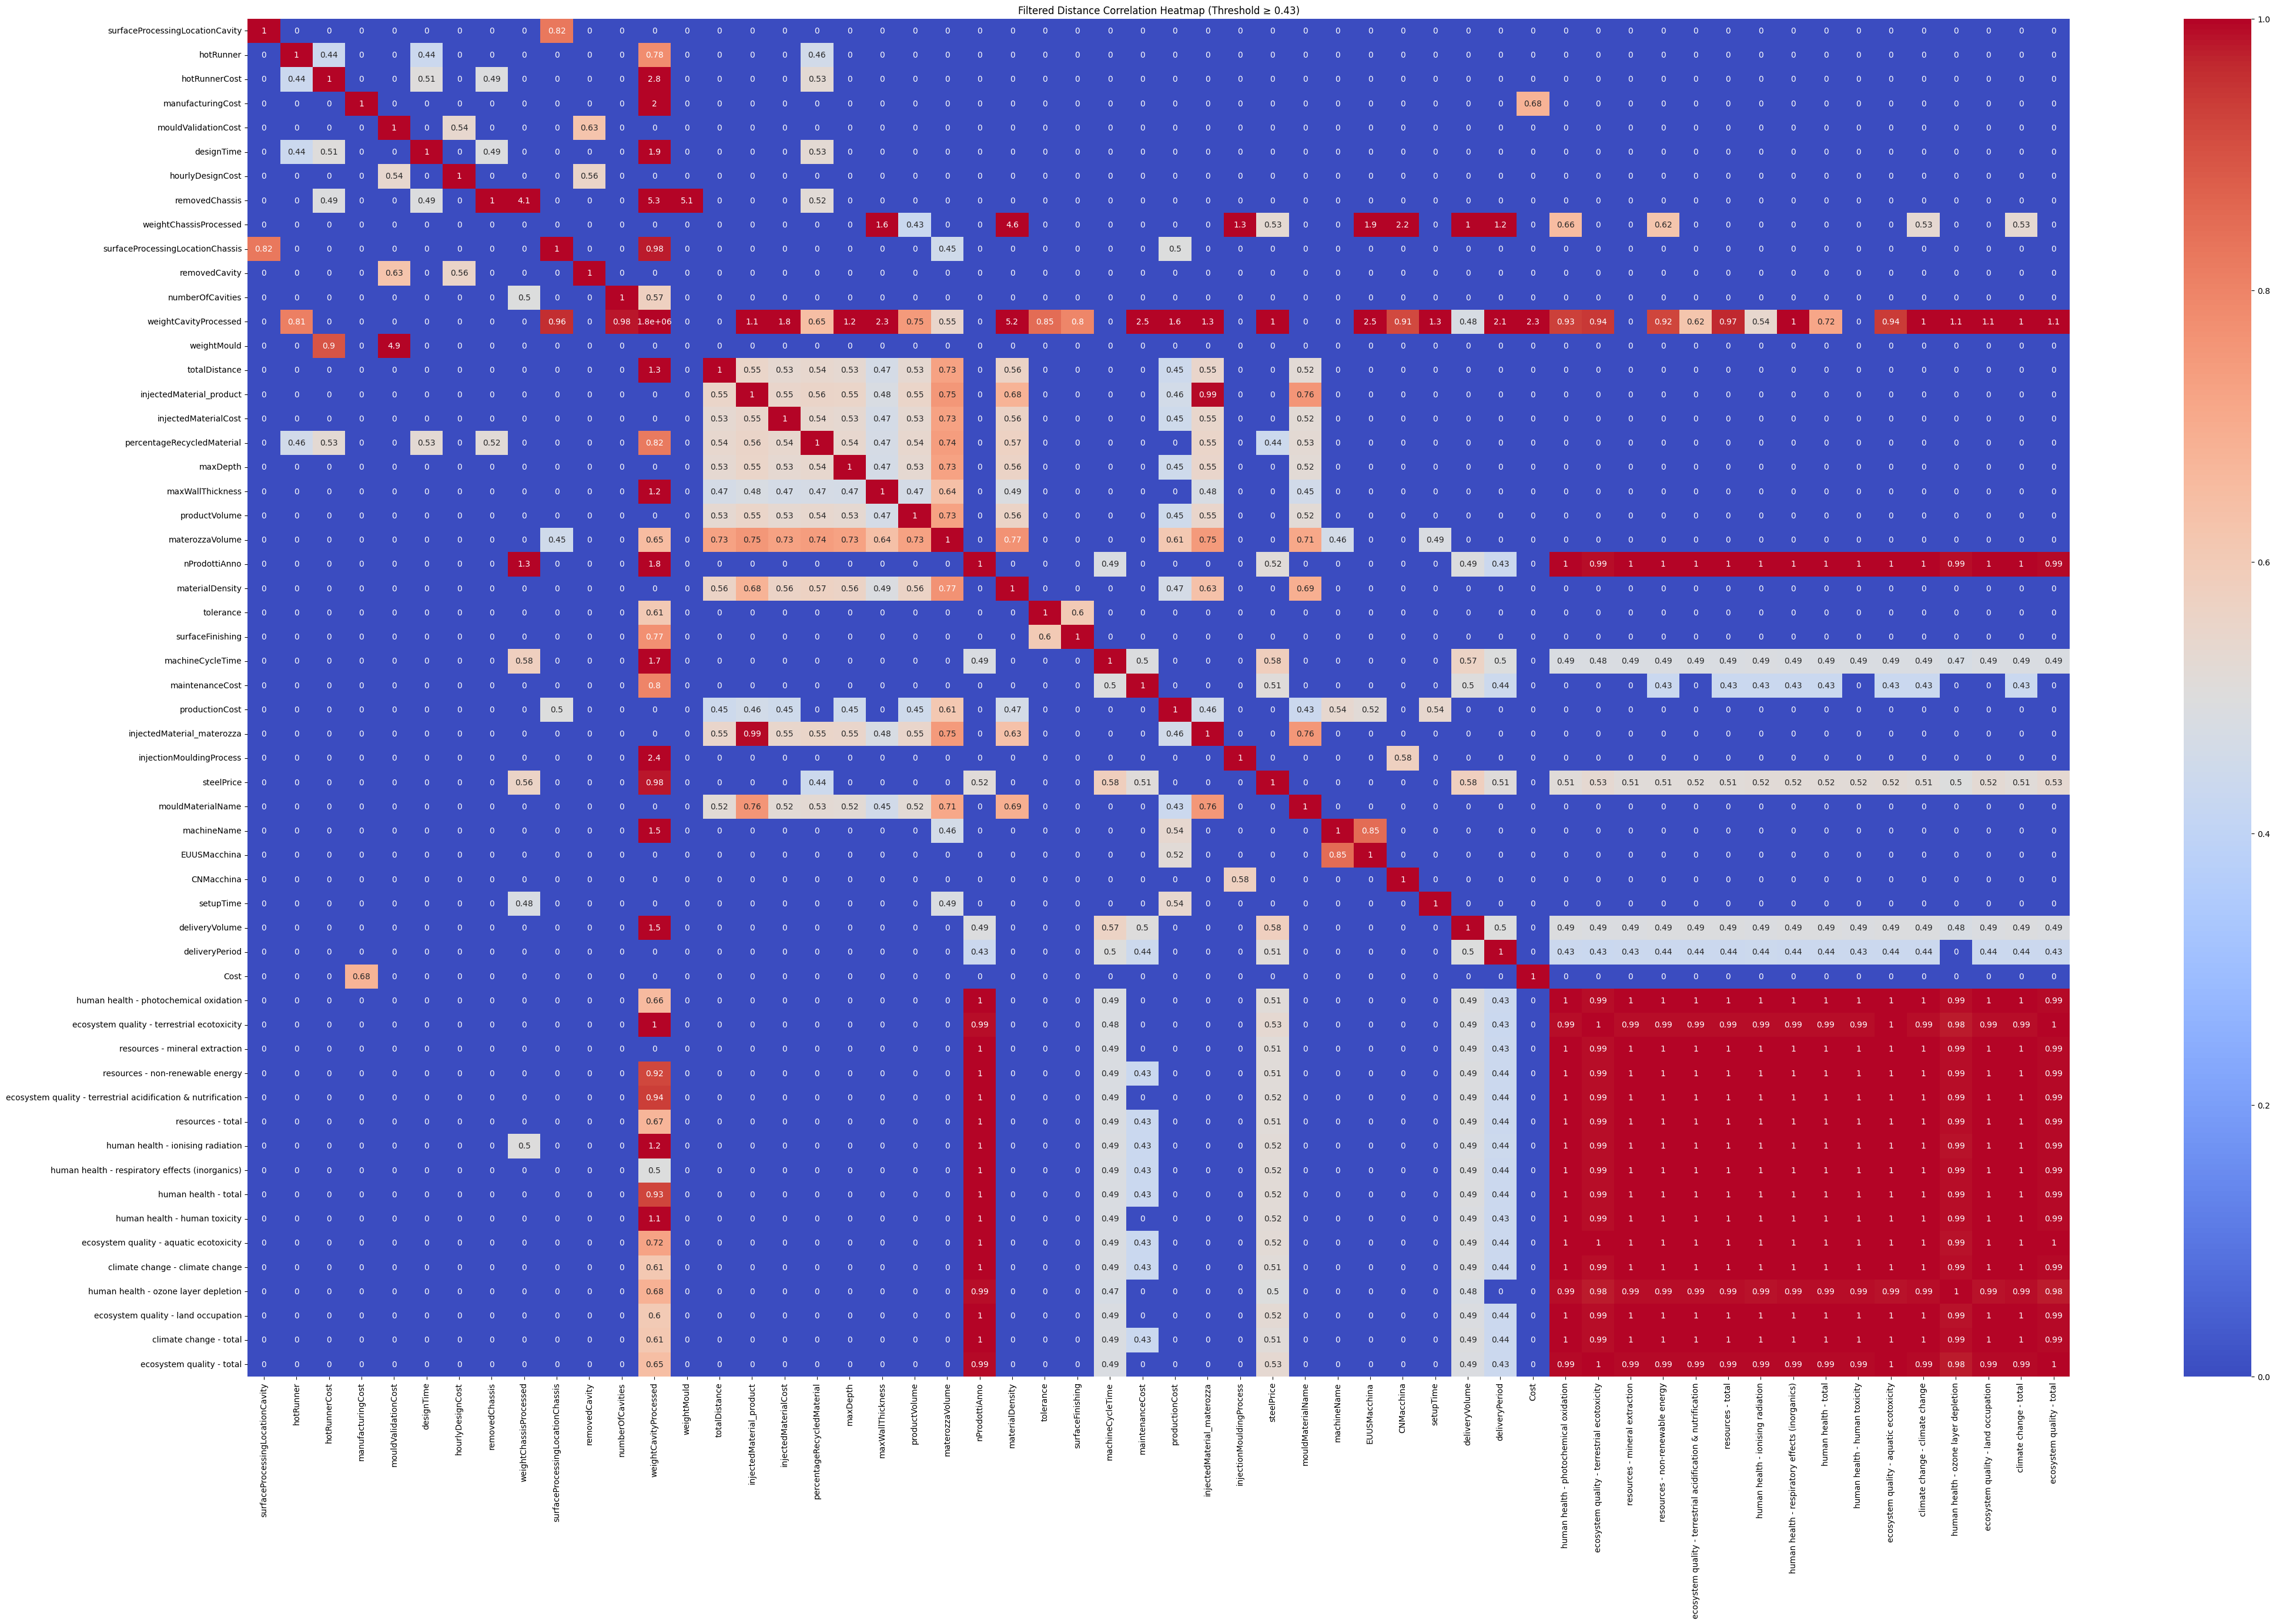

In [19]:
# Plot the filtered heatmap
plt.figure(figsize=(50, 30))
sns.heatmap(filtered_corr_df, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Filtered Distance Correlation Heatmap (Threshold ≥ 0.43)")
plt.show()

In [16]:
feature_column = ['surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
       'manufacturingCost', 'mouldValidationCost', 'designTime',
       'hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
       'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
       'weightCavityProcessed', 'weightMould', 'totalTransportationPercentage',
       'percentageAircraft', 'percentageLorry', 'percentageTrain',
       'percentageShip', 'totalDistance', 'transportCost',
       'injectedMaterial_product', 'injectedMaterialCost',
       'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
       'productVolume', 'materozzaVolume', 'nAnniProduzione', 'nProdottiAnno',
       'materialDensity', 'tolerance', 'surfaceFinishing', 'cycleTime',
       'machineCycleTime', 'maintenanceCost', 'productionCost',
       'injectedMaterial_materozza', 'injectionMouldingProcess',
       'memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName',
       'machineName', 'EUUSMacchina', 'CNMacchina', 'gateDiameter',
       'setupTime', 'warmupTime', 'deliveryVolume', 'deliveryPeriod',
       'mouldDesignCostDisplay', 'mouldTotalCost']

target_column = ['Cost',
       'human health - photochemical oxidation',
       'ecosystem quality - terrestrial ecotoxicity',
       'resources - mineral extraction', 'resources - non-renewable energy',
       'ecosystem quality - terrestrial acidification & nutrification',
       'resources - total', 'human health - ionising radiation',
       'human health - respiratory effects (inorganics)',
       'human health - total', 'human health - human toxicity',
       'ecosystem quality - aquatic ecotoxicity',
       'climate change - climate change',
       'human health - ozone layer depletion',
       'ecosystem quality - land occupation', 'climate change - total',
       'ecosystem quality - total']

From the above table, we know hat most of the target variables having distance correlation=1 are redundant or used for deriving the final variables. Hence it is good to eliminate them and keep only four ['human health - total', 'ecosystem quality - total', 'resources - total', 'Cost']

In [17]:
input_variables= ['surfaceProcessingLocationCavity', 'hotRunner',
'hotRunnerCost','manufacturingCost', 'mouldValidationCost',
'designTime','hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
'weightCavityProcessed', 'weightMould',
'totalTransportationPercentage','percentageAircraft', 'percentageLorry', 'percentageTrain','percentageShip', 'totalDistance',
'injectedMaterial_product', 'injectedMaterialCost','percentageRecycledMaterial', 'maxDepth', 'maxWallThickness','productVolume', 'materozzaVolume', 'nAnniProduzione', 'nProdottiAnno',
 'materialDensity', 'tolerance', 'surfaceFinishing', 'cycleTime',
'machineCycleTime',
'maintenanceCost', 'productionCost','transportCost', 'mouldTotalCost',
'injectedMaterial_materozza', 'injectionMouldingProcess','memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName',
'machineName', 'EUUSMacchina', 'CNMacchina', 'gateDiameter', 'setupTime', 'warmupTime', 'deliveryVolume', 'deliveryPeriod','mouldDesignCostDisplay']

output_variables= ['human health - total', 
                   'ecosystem quality - total',
                    'resources - total', 
                      'Cost']

In [22]:
selected_features= ['surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
       'manufacturingCost', 'mouldValidationCost', 'designTime',
       'hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
       'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
       'weightCavityProcessed', 'weightMould', 'totalDistance',
       'injectedMaterial_product', 'injectedMaterialCost',
       'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
       'productVolume', 'materozzaVolume', 'nProdottiAnno', 'materialDensity',
       'tolerance', 'surfaceFinishing', 'machineCycleTime', 'maintenanceCost',
       'productionCost', 'injectedMaterial_materozza',
       'injectionMouldingProcess', 'steelPrice', 'mouldMaterialName',
       'machineName', 'EUUSMacchina', 'CNMacchina', 'setupTime',
       'deliveryVolume', 'deliveryPeriod']
selected_outputs=target_column= ['Cost', 'resources - total', 'human health - total',
       'ecosystem quality - total']

In [20]:
filtered_corr_df.columns

NameError: name 'filtered_corr_df' is not defined

In [20]:
# Find non-numeric columns
#non_numeric_columns = filtered_corr_df.select_dtypes(exclude=[float, int]).columns
#print("Non-numeric columns:", non_numeric_columns)

In [22]:
#df_scaled= pd.read_csv('out11.csv')

In [18]:
selected_features= selected_features = filtered_corr_df.columns.intersection(input_variables)
selected_outputs = filtered_corr_df.columns.intersection(output_variables)

print(selected_features)
print(selected_outputs)

Index(['surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
       'manufacturingCost', 'mouldValidationCost', 'designTime',
       'hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
       'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
       'weightCavityProcessed', 'weightMould', 'totalDistance',
       'injectedMaterial_product', 'injectedMaterialCost',
       'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
       'productVolume', 'materozzaVolume', 'nProdottiAnno', 'materialDensity',
       'tolerance', 'surfaceFinishing', 'machineCycleTime', 'maintenanceCost',
       'productionCost', 'injectedMaterial_materozza',
       'injectionMouldingProcess', 'steelPrice', 'mouldMaterialName',
       'machineName', 'EUUSMacchina', 'CNMacchina', 'setupTime',
       'deliveryVolume', 'deliveryPeriod'],
      dtype='object')
Index(['Cost', 'resources - total', 'human health - total',
       'ecosystem quality - total'],
      dty

In [19]:
features=df[selected_features]
target= df[selected_outputs]

In [20]:
X = df[selected_features].values
Y = df[selected_outputs].values

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)

scaler_y = MinMaxScaler()
Y_scaled = scaler_y.fit_transform(Y)


In [22]:
df_selected = pd.concat([features, target], axis=1)

In [23]:
df_selected.head()

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,weightChassisProcessed,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,weightCavityProcessed,weightMould,totalDistance,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,steelPrice,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,setupTime,deliveryVolume,deliveryPeriod,Cost,resources - total,human health - total,ecosystem quality - total
0,3.0,1.0,40000.0,40000.0,1500.0,40.0,65.0,0.20,6.6725,0.0,0.5,32.0,0.005495,6.677995,50.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,0.00105,0.0,0.0,10.0,8000.0,12.0,3.0,2.0,0.0,6.0,7.0,4.0,4.0,15.0,10.0,2.0,56093.360588,0.001471,0.004244,0.000961
1,3.0,1.0,40000.0,25000.0,3000.0,70.0,50.0,0.15,6.6725,0.0,0.5,16.0,0.005495,6.677995,50.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,0.00105,0.0,0.0,10.0,8000.0,12.0,3.0,2.0,0.0,6.0,7.0,4.0,4.0,15.0,10.0,2.0,43493.360588,0.001384,0.004010,0.000874
2,3.0,0.0,40000.0,40000.0,4500.0,100.0,65.0,0.20,6.6725,0.0,0.3,32.0,0.005495,6.677995,50.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,0.00105,0.0,0.0,10.0,8000.0,12.0,3.0,2.0,0.0,6.0,7.0,4.0,4.0,15.0,10.0,2.0,102993.360588,0.001470,0.004243,0.000960
3,3.0,1.0,10000.0,25000.0,4500.0,70.0,50.0,0.18,6.6725,0.0,0.5,32.0,0.005495,6.677995,50.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,0.00105,0.0,0.0,10.0,8000.0,12.0,3.0,2.0,0.0,6.0,7.0,4.0,4.0,15.0,10.0,2.0,44993.360588,0.001432,0.004146,0.000926
4,3.0,0.0,25000.0,25000.0,3000.0,40.0,65.0,0.18,6.6725,0.0,0.3,32.0,0.005495,6.677995,50.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,0.00105,0.0,0.0,10.0,8000.0,12.0,3.0,2.0,0.0,6.0,7.0,4.0,4.0,15.0,10.0,2.0,67593.360588,0.001432,0.004145,0.000925


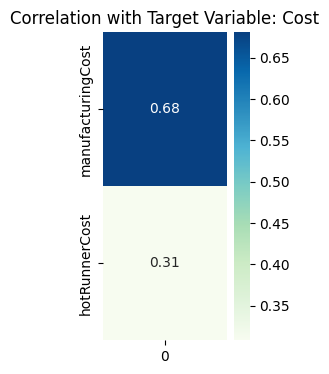

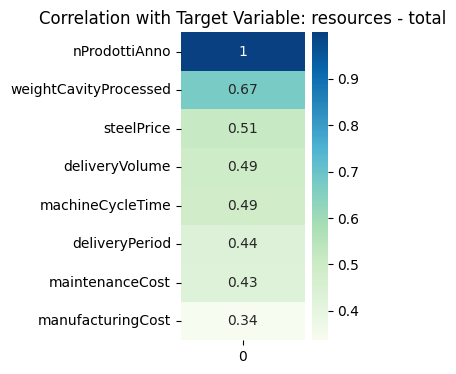

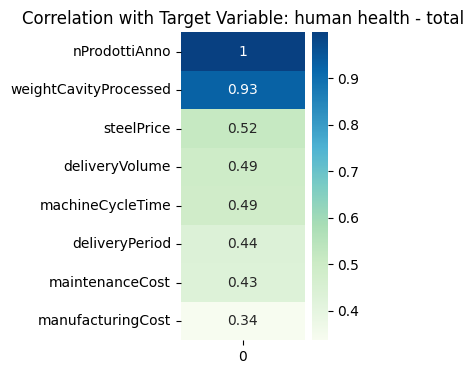

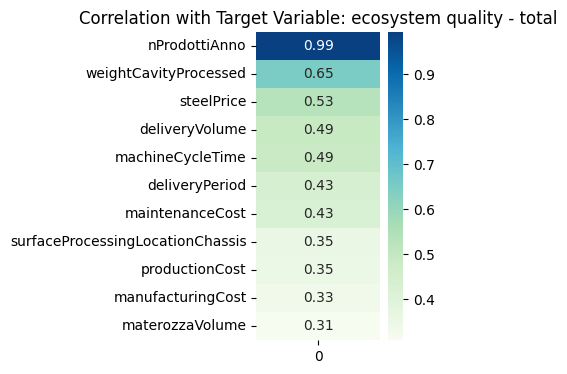

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to store filtered correlations
filtered_correlations = {}

# Assuming target is a DataFrame with multiple columns
for column in target.columns:
    # Calculate correlation with the specific target variable
    corr_with_target = features.corrwith(target[column], method= compute_distance_correlation)
    
    # Filter correlations: keep only those >= 0.3 or <= -0.3
    filtered_corr = corr_with_target[(corr_with_target >= 0.3) | (corr_with_target <= -0.3)]
    
    # Store the filtered correlations in a dictionary
    filtered_correlations[column] = filtered_corr
    
    # Sort the filtered correlations
    filtered_corr = filtered_corr.sort_values(ascending=False)
    
    # Check if there are any correlations to plot
    if not filtered_corr.empty:
        # Plot the heatmap for this target variable
        plt.figure(figsize=(2, 4))
        sns.heatmap(filtered_corr.to_frame(), cmap='GnBu', annot=True)
        plt.title(f'Correlation with Target Variable: {column}')
        plt.show()
    else:
        print(f"No features with correlation >= 0.3 or <= -0.3 for {column}")

# After loop, you can access filtered_correlations for each target variable


In [28]:
filtered_corr_df


NameError: name 'filtered_corr_df' is not defined

In [29]:
print(filtered_correlations['Cost'])


hotRunnerCost        0.307943
manufacturingCost    0.681033
dtype: float64


In [30]:
target.columns

Index(['Cost', 'resources - total', 'human health - total',
       'ecosystem quality - total'],
      dtype='object')

Target Variable: Cost
Train Score: 0.49
Test Score: 0.50



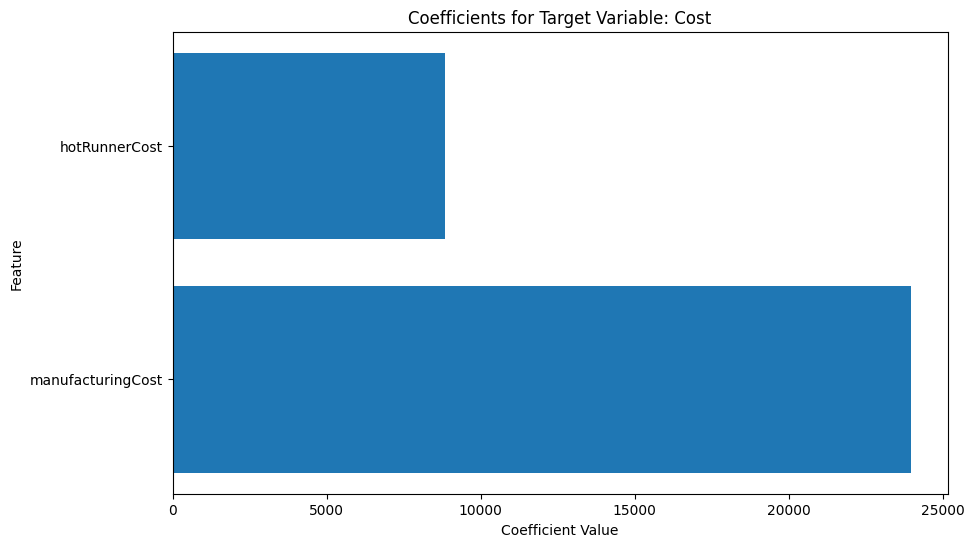

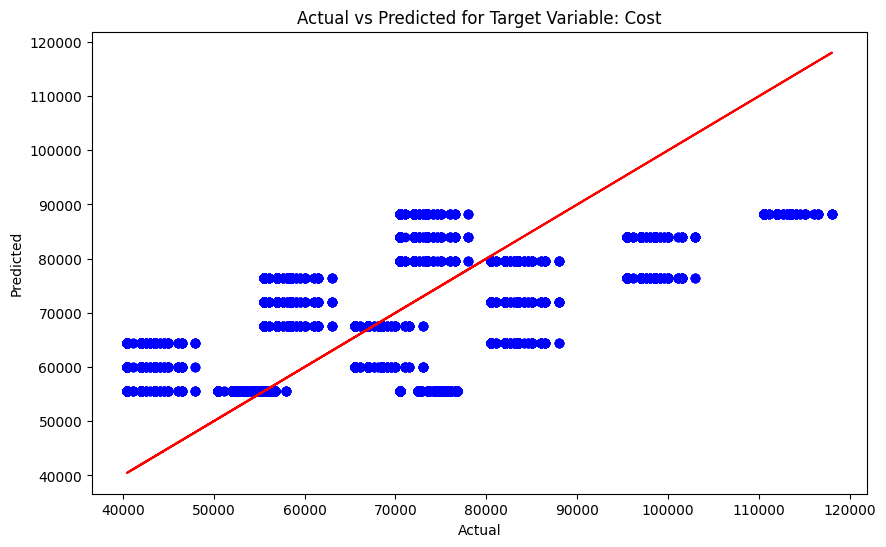

Target Variable: resources - total
Train Score: 1.00
Test Score: 1.00



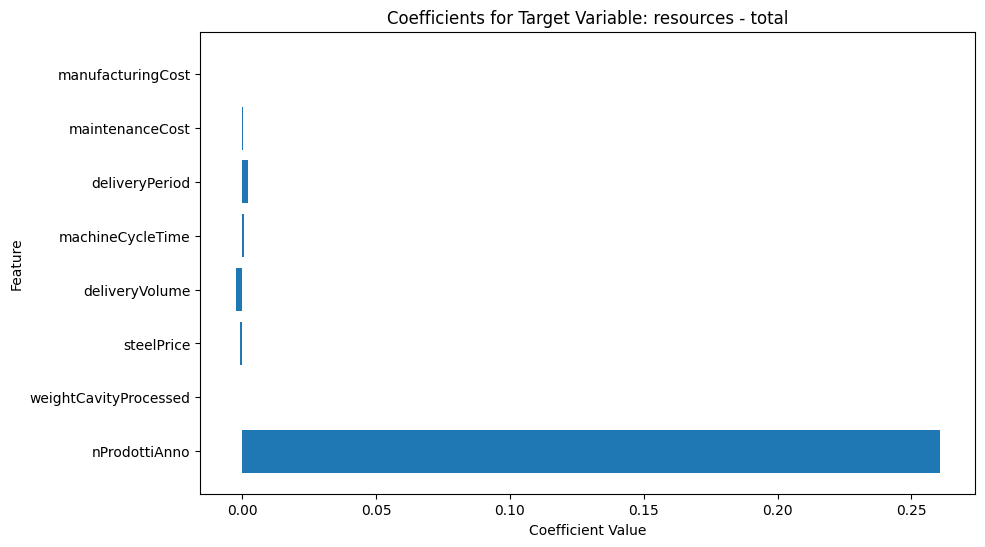

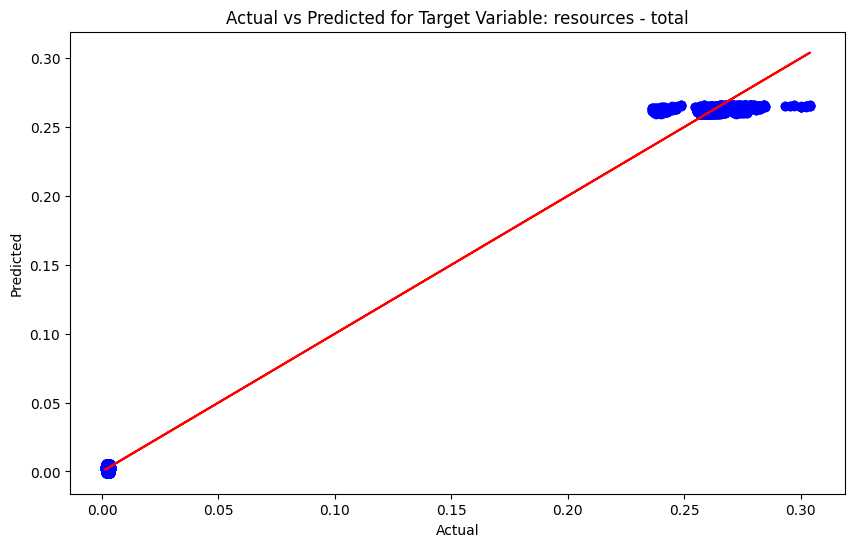

Target Variable: human health - total
Train Score: 1.00
Test Score: 1.00



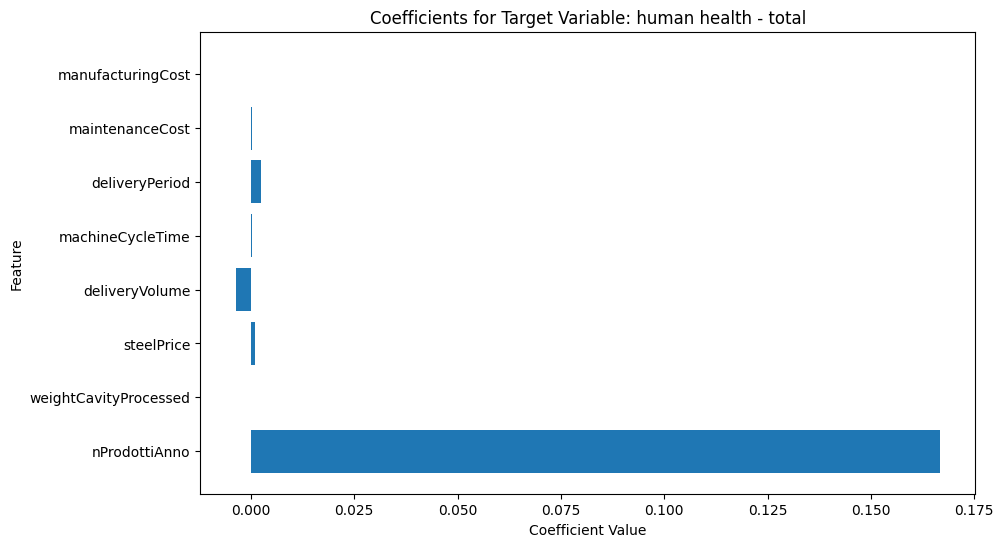

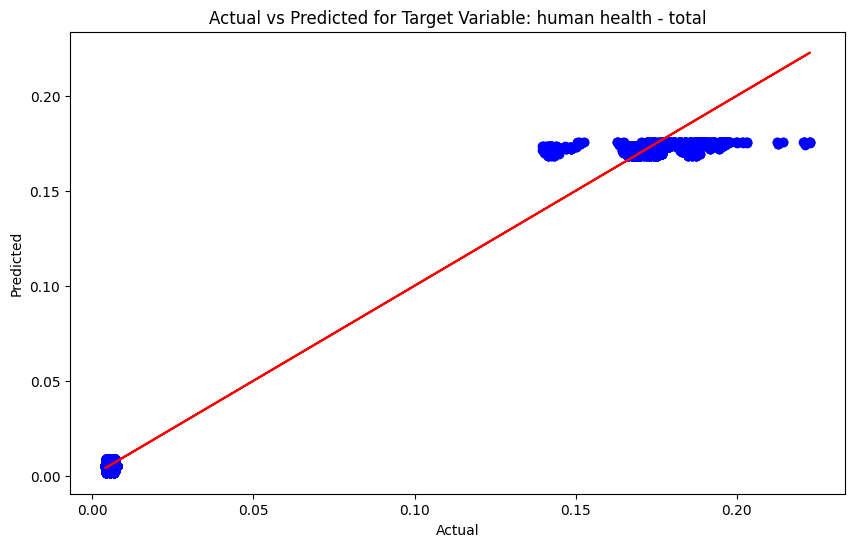

Target Variable: ecosystem quality - total
Train Score: 1.00
Test Score: 1.00



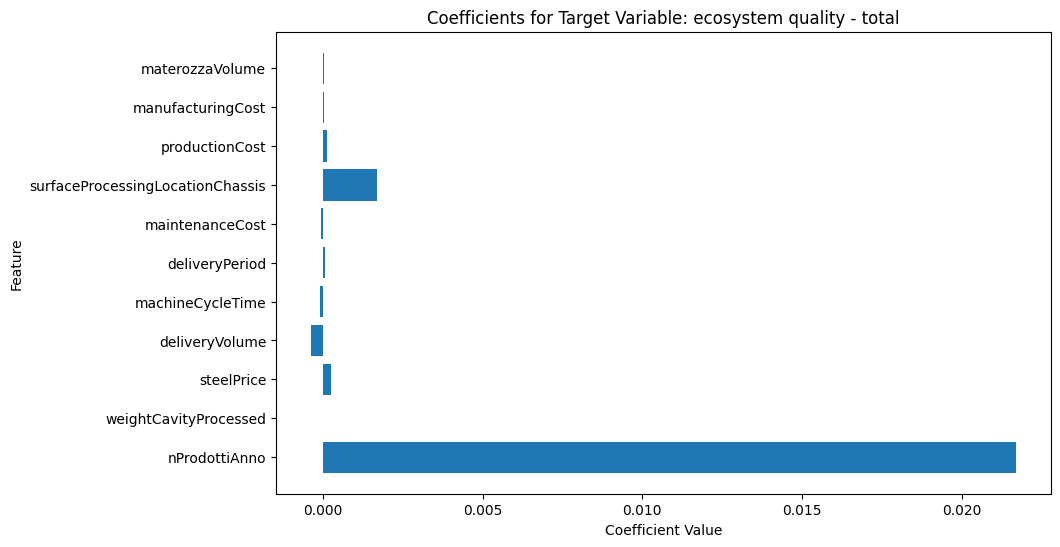

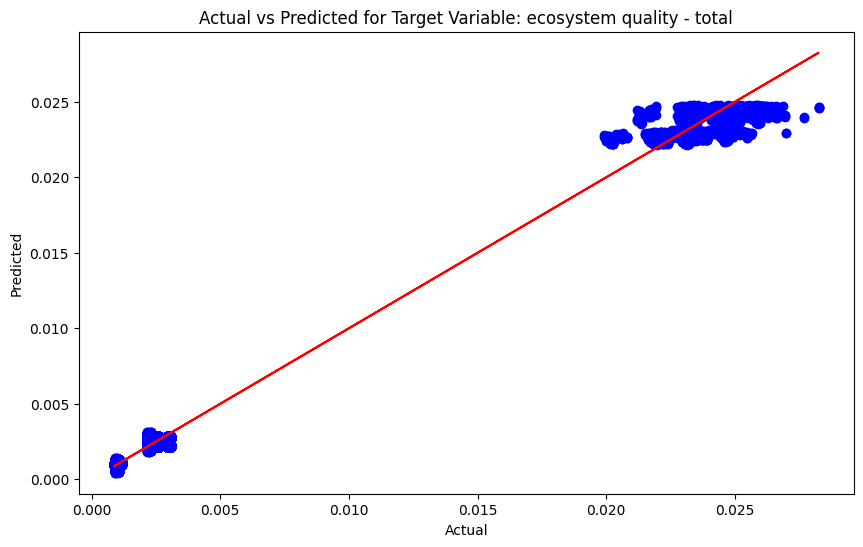

{'Cost': hotRunnerCost        0.307943
manufacturingCost    0.681033
dtype: float64, 'resources - total': manufacturingCost        0.336716
weightCavityProcessed    0.672492
nProdottiAnno            0.999749
machineCycleTime         0.487781
maintenanceCost          0.430272
steelPrice               0.514909
deliveryVolume           0.493530
deliveryPeriod           0.435653
dtype: float64, 'human health - total': manufacturingCost        0.336747
weightCavityProcessed    0.927186
nProdottiAnno            0.998955
machineCycleTime         0.487887
maintenanceCost          0.430264
steelPrice               0.517123
deliveryVolume           0.492324
deliveryPeriod           0.436689
dtype: float64, 'ecosystem quality - total': manufacturingCost                   0.334988
surfaceProcessingLocationChassis    0.353641
weightCavityProcessed               0.652883
materozzaVolume                     0.309155
nProdottiAnno                       0.992526
machineCycleTime                    0.48

In [142]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

filtered_correlations = {}

for column in target.columns:
    # Calculate correlation with the specific target variable
    corr_with_target = features.corrwith(target[column], method=compute_distance_correlation)
    
    # Filter correlations: keep only those >= 0.3 or <= -0.3
    filtered_corr = corr_with_target[(corr_with_target >= 0.3) | (corr_with_target <= -0.3)]
    
    # Store the filtered correlations in a dictionary
    filtered_correlations[column] = filtered_corr
    
    # Sort the filtered correlations
    filtered_corr = filtered_corr.sort_values(ascending=False)

    X = df_encoded[filtered_corr.index]
    y = df_encoded[column]

    # Split the data into training and testing sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the data
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate the model
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    print(f"Target Variable: {column}")
    print(f"Train Score: {train_score:.2f}")
    print(f"Test Score: {test_score:.2f}")
    print("")

    # Plot the coefficients
    plt.figure(figsize=(10, 6))
    plt.barh(filtered_corr.index, model.coef_)
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.title(f"Coefficients for Target Variable: {column}")
    plt.show()
    print("")

    # Plot the predicted vs actual values
    y_pred = model.predict(X_test)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot(y_test, y_test, color='red')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Actual vs Predicted for Target Variable: {column}")
    plt.show()

# After loop, you can access filtered_correlations for each target variable
print(filtered_correlations)

In [32]:
X

NameError: name 'X' is not defined

In [ ]:
trials= 
splits = target.columns.shape[0]



## Exact GP: Works but have memory issues

In [33]:
#%% [code]
import numpy as np
import pandas as pd
import torch
import gpytorch
from joblib import Parallel, delayed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import dcor
import time
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# --- Utility Functions ---

def compute_distance_correlation(x, y):
    """Compute the distance correlation between two arrays."""
    return dcor.distance_correlation(x, y)

def filter_features_by_distance_corr(features, target_series, threshold=0.3):
    """
    Calculate distance correlation between each feature and the target.
    Returns a sorted Series of correlations (only values >= threshold or <= -threshold).
    """
    corr_with_target = features.apply(lambda col: compute_distance_correlation(col.values, target_series.values))
    filtered_corr = corr_with_target[(corr_with_target >= threshold) | (corr_with_target <= -threshold)]
    return filtered_corr.sort_values(ascending=False)

# --- GP Model and Acquisition Function using gpytorch ---

class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
        
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

def acquisition_lcb(model, likelihood, x, kappa=2.0):
    """
    Lower Confidence Bound (LCB) acquisition function.
    Returns: mean - kappa * standard deviation.
    """
    model.eval()
    likelihood.eval()
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        posterior = model(x)
        mean = posterior.mean
        std = posterior.stddev
    return mean - kappa * std

def optimize_acquisition(model, likelihood, bounds, n_restarts=10, kappa=2.0):
    """
    Optimizes the acquisition function using multiple random restarts in parallel.
    bounds: np.array of shape (d,2) where d is the input dimension.
    """
    dim = bounds.shape[0]
    
    def acq_objective(x_np):
        x = torch.tensor(x_np, dtype=torch.float32).unsqueeze(0)
        return acquisition_lcb(model, likelihood, x, kappa).item()
    
    scipy_bounds = [(bounds[i, 0], bounds[i, 1]) for i in range(dim)]
    
    def local_optimization(x0):
        res = minimize(acq_objective, x0, method='L-BFGS-B', bounds=scipy_bounds)
        return res.x, res.fun
    
    # Generate random starting points within bounds
    random_starts = np.random.uniform(bounds[:, 0], bounds[:, 1], size=(n_restarts, dim))
    
    results = Parallel(n_jobs=-1)(delayed(local_optimization)(x0) for x0 in random_starts)
    
    best_x, best_acq = None, np.inf
    for x_opt, acq_val in results:
        if acq_val < best_acq:
            best_acq = acq_val
            best_x = x_opt
    return best_x

# --- Bayesian Optimization Loop ---

def bayesian_optimization(objective_func, bounds, initial_X, initial_y, n_iter=2, kappa=2.0, n_restarts=10):
    """
    Performs Bayesian optimization.
    
    Parameters:
        objective_func: function accepting np.array (n_samples x d) and returning np.array (n_samples,)
        bounds: np.array of shape (d,2) defining lower and upper limits for each dimension.
        initial_X: np.array (n_samples x d) initial training inputs.
        initial_y: np.array (n_samples,) initial training outputs.
        n_iter: number of BO iterations.
    
    Returns:
        all_x, all_y: arrays of evaluated points and corresponding objective values.
        model, likelihood: trained GP model and likelihood.
    """
    # Convert initial data to torch tensors
    train_x = torch.tensor(initial_X, dtype=torch.float32)
    train_y = torch.tensor(initial_y, dtype=torch.float32)
    
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = ExactGPModel(train_x, train_y, likelihood)
    
    model.train()
    likelihood.train()
    optimizer_model = torch.optim.Adam(model.parameters(), lr=0.1)
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)
    
    # Initial training of the GP hyperparameters
    training_iter = 50
    for _ in range(training_iter):
        optimizer_model.zero_grad()
        output = model(train_x)
        loss = -mll(output, train_y)
        loss.backward()
        optimizer_model.step()
    
    all_x = initial_X.copy()
    all_y = initial_y.copy()
    
    for iteration in range(n_iter):
        # Optimize the acquisition function to find the next point
        next_x = optimize_acquisition(model, likelihood, bounds, n_restarts=n_restarts, kappa=kappa)
        
        # Evaluate the objective function at the new point
        next_y = objective_func(np.array([next_x]))
        
        # Append new data point
        all_x = np.vstack([all_x, next_x])
        all_y = np.concatenate([all_y, next_y])
        
        # Update GP model with new data
        train_x = torch.tensor(all_x, dtype=torch.float32)
        train_y = torch.tensor(all_y, dtype=torch.float32)
        model.set_train_data(train_x, train_y, strict=False)
        
        # Re-train the GP hyperparameters
        model.train()
        likelihood.train()
        optimizer_model = torch.optim.Adam(model.parameters(), lr=0.1)
        for _ in range(training_iter):
            optimizer_model.zero_grad()
            output = model(train_x)
            loss = -mll(output, train_y)
            loss.backward()
            optimizer_model.step()
        
        print(f"Iteration {iteration+1}/{n_iter} | New point: {next_x} | Objective: {next_y[0]}")
    
    return all_x, all_y, model, likelihood

# --- Example Notebook Workflow ---

# Simulated data: in practice, replace these with your actual dataframes.

filtered_correlations = {}
optimized_results = {}

# Define the bounds for the features (assumed scaled between 0 and 1)
bounds = np.array([[0, 1]] * df_encoded.shape[1])

# Loop over each target column to filter features and run Bayesian optimization
for column in target.columns:
    # Filter features by distance correlation with the current target
    filtered_corr = filter_features_by_distance_corr(features, target[column], threshold=0.3)
    filtered_correlations[column] = filtered_corr
    selected_features = filtered_corr.index.tolist()
    
    # Extract relevant data
    X = df_encoded[selected_features]
    y = target[column]
    
    # Split the data (optional for BO; here for demonstration)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define a dummy objective function.
    # Replace this with your actual expensive-to-evaluate function.
    def objective(x_np):
        # Here we simply sum the features; in practice, this might be a simulation or experimental evaluation.
        return np.sum(x_np, axis=1)
    
    print(f"\nRunning Bayesian Optimization for target: {column}")
    all_x, all_y, model, likelihood = bayesian_optimization(
        objective, bounds, X_train_scaled, y_train.values, n_iter=5, kappa=2.0, n_restarts=10
    )
    
    optimized_results[column] = {
        'all_x': all_x,
        'all_y': all_y,
        'model': model,
        'likelihood': likelihood,
        'selected_features': selected_features
    }

print("\nOptimization complete!")



Running Bayesian Optimization for target: Cost


RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 68977668496 bytes.

## Works but only for one variable

In [ ]:
import numpy as np
import pandas as pd
import torch
import gpytorch
from joblib import Parallel, delayed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import dcor
import time
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# --- Utility Functions ---

def compute_distance_correlation(x, y):
    """Compute the distance correlation between two arrays."""
    return dcor.distance_correlation(x, y)

def filter_features_by_distance_corr(features, target_series, threshold=0.3):
    """
    Compute distance correlation for each feature with the target.
    Returns filtered correlations (only those with absolute value above the threshold) sorted in descending order.
    """
    corr_with_target = features.apply(lambda col: compute_distance_correlation(col.values, target_series.values))
    filtered_corr = corr_with_target[(corr_with_target >= threshold) | (corr_with_target <= -threshold)]
    return filtered_corr.sort_values(ascending=False)

# --- Sparse GP Model using Variational Inference ---

class SparseGPModel(gpytorch.models.ApproximateGP):
    def __init__(self, inducing_points):
        # Define variational distribution and strategy with the given inducing points.
        variational_distribution = gpytorch.variational.CholeskyVariationalDistribution(inducing_points.size(0))
        variational_strategy = gpytorch.variational.VariationalStrategy(
            self, inducing_points, variational_distribution, learn_inducing_locations=True
        )
        super(SparseGPModel, self).__init__(variational_strategy)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
        
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# --- Acquisition Function & Optimization ---

def acquisition_lcb(model, likelihood, x, kappa=2.0):
    """
    Compute the Lower Confidence Bound (LCB) acquisition value.
    Returns: mean - kappa * standard deviation.
    """
    model.eval()
    likelihood.eval()
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        posterior = model(x)
        mean = posterior.mean
        std = posterior.stddev
    return mean - kappa * std

def optimize_acquisition(model, likelihood, bounds, n_restarts=10, kappa=2.0):
    """
    Optimize the acquisition function using multiple random restarts in parallel.
    
    Parameters:
      bounds: np.array of shape (d,2) with lower and upper bounds for each dimension.
    Returns:
      The best input found (as a numpy array).
    """
    dim = bounds.shape[0]
    
    def acq_objective(x_np):
        x = torch.tensor(x_np, dtype=torch.float32).unsqueeze(0)
        return acquisition_lcb(model, likelihood, x, kappa).item()
    
    # Set up scipy bounds for minimization
    scipy_bounds = [(bounds[i, 0], bounds[i, 1]) for i in range(dim)]
    
    def local_optimization(x0):
        res = minimize(acq_objective, x0, method='L-BFGS-B', bounds=scipy_bounds)
        return res.x, res.fun
    
    # Generate random starting points
    random_starts = np.random.uniform(bounds[:, 0], bounds[:, 1], size=(n_restarts, dim))
    
    results = Parallel(n_jobs=-1)(delayed(local_optimization)(x0) for x0 in random_starts)
    
    best_x, best_acq = None, np.inf
    for x_opt, acq_val in results:
        if acq_val < best_acq:
            best_acq = acq_val
            best_x = x_opt
    return best_x

# --- Bayesian Optimization Loop with Sparse GP ---

def bayesian_optimization(objective_func, bounds, initial_X, initial_y, n_iter=10, kappa=2.0, n_restarts=10, num_inducing=20):
    """
    Perform Bayesian optimization using a sparse GP.
    
    Parameters:
      - objective_func: Function that takes a (n_samples x d) np.array and returns a (n_samples,) np.array.
      - bounds: np.array of shape (d,2) defining the search space.
      - initial_X: Initial training inputs (n_samples x d).
      - initial_y: Initial training outputs (n_samples,).
      - n_iter: Number of BO iterations.
      - num_inducing: Number of inducing points for the sparse GP.
      
    Returns:
      - all_x, all_y: Arrays of all evaluated inputs and corresponding objective values.
      - model, likelihood: The final GP model and likelihood.
    """
    # Convert data to torch tensors
    train_x = torch.tensor(initial_X, dtype=torch.float32)
    train_y = torch.tensor(initial_y, dtype=torch.float32)
    
    # Choose a subset of training points as inducing points if possible.
    if train_x.size(0) > num_inducing:
        inducing_points = train_x[torch.randperm(train_x.size(0))[:num_inducing]]
    else:
        inducing_points = train_x.clone()
        
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = SparseGPModel(inducing_points)
    
    # Set model and likelihood to training mode.
    model.train()
    likelihood.train()
    optimizer_model = torch.optim.Adam(model.parameters(), lr=0.1)
    mll = gpytorch.mlls.VariationalELBO(likelihood, model, num_data=train_y.size(0))
    
    training_iter = 50
    for _ in range(training_iter):
        optimizer_model.zero_grad()
        output = model(train_x)
        loss = -mll(output, train_y)
        loss.backward()
        optimizer_model.step()
    
    all_x = initial_X.copy()
    all_y = initial_y.copy()
    
    for iteration in range(n_iter):
        # Optimize the acquisition function to propose a new candidate point.
        next_x = optimize_acquisition(model, likelihood, bounds, n_restarts=n_restarts, kappa=kappa)
        next_y = objective_func(np.array([next_x]))
        
        # Append the new data point.
        all_x = np.vstack([all_x, next_x])
        all_y = np.concatenate([all_y, next_y])
        
        # Update training data and retrain the GP.
        train_x = torch.tensor(all_x, dtype=torch.float32)
        train_y = torch.tensor(all_y, dtype=torch.float32)
        model.set_train_data(train_x, train_y, strict=False)
        
        model.train()
        likelihood.train()
        optimizer_model = torch.optim.Adam(model.parameters(), lr=0.1)
        for _ in range(training_iter):
            optimizer_model.zero_grad()
            output = model(train_x)
            loss = -mll(output, train_y)
            loss.backward()
            optimizer_model.step()
        
        print(f"Iteration {iteration+1}/{n_iter} | New point: {next_x} | Objective: {next_y[0]}")
    
    return all_x, all_y, model, likelihood

# --- Example Notebook Workflow ---

# For demonstration, we'll simulate a dataset.
# Replace this with your actual data loading code.
# Here we assume your dataset has 164,148 rows and 2 columns.


# For illustration, create a target as a function of these two features.

# Filter features by distance correlation (for a 2-D dataset this may be trivial).



# Use all features (both) in this case.
selected_features = filtered_corr.index.tolist() if len(filtered_corr) > 0 else df_encoded.columns.tolist()

# Prepare data for the current target.
X = df_encoded[selected_features]
y = target[column]

# Split data and scale features.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a dummy objective function (replace with your actual evaluation function).
def objective(x_np):
    # For example, sum the features.
    return np.sum(x_np, axis=1)

print(f"\nRunning Bayesian Optimization with Sparse GP for: {column}")
all_x, all_y, model, likelihood = bayesian_optimization(
    objective, 
    bounds=np.array([[0, 1]] * X_train_scaled.shape[1]), 
    initial_X=X_train_scaled, 
    initial_y=y_train.values, 
    n_iter=5, 
    kappa=2.0, 
    n_restarts=10, 
    num_inducing=50  # You can adjust the number of inducing points
)

print("\nOptimization complete!")



Running Bayesian Optimization with Sparse GP for: Cost


AttributeError: 'SparseGPModel' object has no attribute 'set_train_data'

## initial parallel loop with GP that works

In [41]:
import numpy as np
import pandas as pd
import torch
import gpytorch
from joblib import Parallel, delayed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import dcor
import time
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.spatial.distance import euclidean

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
df
# --- Utility Functions ---

def compute_distance_correlation(x, y):
    """Compute the distance correlation between two arrays."""
    return dcor.distance_correlation(x, y)



def filter_features_by_distance_corr(features, target_series, threshold=0.3):
    """
    Compute distance correlation for each feature with the target.
    Returns filtered correlations (only those with absolute value above the threshold)
    sorted in descending order.
    """
    corr_with_target = features.apply(lambda col: compute_distance_correlation(col.values, target_series.values))
    filtered_corr = corr_with_target[(corr_with_target >= threshold) | (corr_with_target <= -threshold)]
    return filtered_corr.sort_values(ascending=False)

def scale(x, lb=None, ub=None, bounds=None):
    m = (bounds.ub - bounds.lb) / (ub - lb)
    b = bounds.ub - m * ub
    return m * x + b

def descale(x, lb=None, ub=None, bounds=None):
    m = (ub - lb) / (bounds.ub - bounds.lb)
    b = ub - m * bounds.ub
    return m * x + b
    
# --- Sparse GP Model using Variational Inference ---

class SparseGPModel(gpytorch.models.ApproximateGP):
    def __init__(self, inducing_points):
        # Define variational distribution and strategy with the given inducing points.
        variational_distribution = gpytorch.variational.CholeskyVariationalDistribution(inducing_points.size(0))
        variational_strategy = gpytorch.variational.VariationalStrategy(
            self, inducing_points, variational_distribution, learn_inducing_locations=True
        )
        super(SparseGPModel, self).__init__(variational_strategy)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
        
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# --- Acquisition Function & Optimization ---

def acquisition_lcb(model, likelihood, x, kappa=2.0):
    """
    Compute the Lower Confidence Bound (LCB) acquisition value.
    Returns: mean - kappa * standard deviation.
    """
    model.eval()
    likelihood.eval()
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        posterior = model(x)
        mean = posterior.mean
        std = posterior.stddev
    return mean - kappa * std

def optimize_acquisition(model, likelihood, bounds, n_restarts=10, kappa=2.0):
    """
    Optimize the acquisition function using multiple random restarts in parallel.
    
    Parameters:
      bounds: np.array of shape (d,2) with lower and upper bounds for each dimension.
    Returns:
      The best input found (as a numpy array).
    """
    dim = bounds.shape[0]
    
    def acq_objective(x_np):
        x = torch.tensor(x_np, dtype=torch.float32).unsqueeze(0)
        return acquisition_lcb(model, likelihood, x, kappa).item()
    
    # Define bounds for scipy minimization.
    scipy_bounds = [(bounds[i, 0], bounds[i, 1]) for i in range(dim)]
    
    def local_optimization(x0):
        res = minimize(acq_objective, x0, method='L-BFGS-B', bounds=scipy_bounds)
        return res.x, res.fun
    
    # Generate random starting points.
    random_starts = np.random.uniform(bounds[:, 0], bounds[:, 1], size=(n_restarts, dim))
    results = Parallel(n_jobs=-1)(delayed(local_optimization)(x0) for x0 in random_starts)
    
    best_x, best_acq = None, np.inf
    for x_opt, acq_val in results:
        if acq_val < best_acq:
            best_acq = acq_val
            best_x = x_opt
        return best_x


    

# --- Bayesian Optimization Loop with Sparse GP ---

def bayesian_optimization(objective_func, bounds, initial_X, initial_y, n_iter=10, kappa=2.0, n_restarts=10, num_inducing=20):
    """
    Perform Bayesian optimization using a sparse GP.
    
    Parameters:
      - objective_func: Function that takes a (n_samples x d) np.array and returns a (n_samples,) np.array.
      - bounds: np.array of shape (d,2) defining the search space.
      - initial_X: Initial training inputs (n_samples x d).
      - initial_y: Initial training outputs (n_samples,).
      - n_iter: Number of BO iterations.
      - num_inducing: Number of inducing points for the sparse GP.
      
    Returns:
      - all_x, all_y: Arrays of all evaluated inputs and corresponding objective values.
      - model, likelihood: The final GP model and likelihood.
    """
    # Convert data to torch tensors.
    train_x = torch.tensor(initial_X, dtype=torch.float32)
    train_y = torch.tensor(initial_y, dtype=torch.float32)
    
    # Choose a subset of training points as inducing points.
    if train_x.size(0) > num_inducing:
        inducing_points = train_x[torch.randperm(train_x.size(0))[:num_inducing]]
    else:
        inducing_points = train_x.clone()
        
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = SparseGPModel(inducing_points)
    
    # Set model to training mode.
    model.train()
    likelihood.train()
    optimizer_model = torch.optim.Adam(model.parameters(), lr=0.1)
    mll = gpytorch.mlls.VariationalELBO(likelihood, model, num_data=train_y.size(0))
    
    training_iter = 50
    for _ in range(training_iter):
        optimizer_model.zero_grad()
        output = model(train_x)
        loss = -mll(output, train_y)
        loss.backward()
        optimizer_model.step()
    
    all_x = initial_X.copy()
    all_y = initial_y.copy()
    
    for iteration in range(n_iter):
        # Optimize acquisition to propose a new candidate point.
        next_x = optimize_acquisition(model, likelihood, bounds, n_restarts=n_restarts, kappa=kappa)
        next_y = objective_func(np.array([next_x]))
        
        # Append the new point.
        all_x = np.vstack([all_x, next_x])
        all_y = np.concatenate([all_y, next_y])
        
        # Update training data.
        train_x = torch.tensor(all_x, dtype=torch.float32)
        train_y = torch.tensor(all_y, dtype=torch.float32)
        # Update the variational strategy's training inputs.
        model.variational_strategy.train_inputs = (train_x,)
        
        # Re-create the ELBO with updated number of data points.
        mll = gpytorch.mlls.VariationalELBO(likelihood, model, num_data=train_y.size(0))
        
        # Retrain the GP model.
        model.train()
        likelihood.train()
        optimizer_model = torch.optim.Adam(model.parameters(), lr=0.1)
        for _ in range(training_iter):
            optimizer_model.zero_grad()
            output = model(train_x)
            loss = -mll(output, train_y)
            loss.backward()
            optimizer_model.step()
        
        print(f"Iteration {iteration+1}/{n_iter} | New point: {next_x} | Objective: {next_y[0]}")
    
    return all_x, all_y, model, likelihood
   


In [ ]:
# --- Updated Objective Function ---

def objective(x_np):
    # We assume the goal is to minimize the target value
    return -np.sum(x_np, axis=1)  # Negate since Bayesian Optimization maximizes by default

# Dictionary to store the best results for each target variable
best_results = {}

for column in target.columns:
    # Filter features by distance correlation with the current target
    filtered_corr = filter_features_by_distance_corr(features, target[column], threshold=0.3)
    filtered_correlations[column] = filtered_corr
    selected_features = filtered_corr.index.tolist()

    # Use all features if filtering returns none.
    selected_features = filtered_corr.index.tolist() if len(filtered_corr) > 0 else df_encoded.columns.tolist()

    # Prepare data for the target.
    X = df_encoded[selected_features]
    y = target[column]

    # Split data and scale features.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"\nRunning Bayesian Optimization with Sparse GP for target: {column}")
    all_x, all_y, model, likelihood = bayesian_optimization(
        objective,
        bounds=np.array([[0, 1]] * X_train_scaled.shape[1]),
        initial_X=X_train_scaled,
        initial_y=y_train.values,
        n_iter=1,
        kappa=2.0,
        n_restarts=10,
        num_inducing=50
    )

    # Store the best result found
    min_idx = np.argmin(all_y)
    best_results[column] = {
        'min_y': -all_y[min_idx],  # Re-negate to get actual min
        'best_x': all_x[min_idx],
        'selected_features': selected_features
    }

# Print the overall best results across all targets
best_target = min(best_results, key=lambda k: best_results[k]['min_y'])
print(f"\nOverall best optimization result:\nTarget: {best_target}\nMin Value: {best_results[best_target]['min_y']}")
print(f"Feature values: {best_results[best_target]['best_x']}")



Running Bayesian Optimization with Sparse GP for target: Cost
Iteration 1/10 | New point: [0.60754485 1.         1.        ] | Objective: -2.607544851901438
Iteration 2/10 | New point: [0.38867729 0.27134903 0.82873751] | Objective: -1.4887638306153073
Iteration 3/10 | New point: [0.11959425 0.71324479 0.76078505] | Objective: -1.5936240817781941
Iteration 4/10 | New point: [0.80744016 0.8960913  0.31800347] | Objective: -2.0215349300594196
Iteration 5/10 | New point: [0.90826589 0.23956189 1.        ] | Objective: -2.1478277766336262
Iteration 6/10 | New point: [0.34106635 0.11347352 0.92469362] | Objective: -1.3792334905694104


KeyboardInterrupt: 

In [35]:
import numpy as np
import pandas as pd
import torch
import gpytorch
from joblib import Parallel, delayed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import dcor
import time
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.spatial.distance import euclidean

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# --- Utility Functions ---

def compute_distance_correlation(x, y):
    """Compute the distance correlation between two arrays."""
    return dcor.distance_correlation(x, y)

def filter_features_by_distance_corr(features, target_series, threshold=0.3):
    """
    Compute distance correlation for each feature with the target.
    Returns filtered correlations sorted in descending order.
    """
    corr_with_target = features.apply(lambda col: compute_distance_correlation(col.values, target_series.values))
    filtered_corr = corr_with_target[(corr_with_target.abs() >= threshold)]
    return filtered_corr.sort_values(ascending=False)

def scale(x, lb, ub, bounds):
    """Scale values to a given range."""
    m = (bounds[1] - bounds[0]) / (ub - lb)
    b = bounds[1] - m * ub
    return m * x + b

def descale(x, lb, ub, bounds):
    """Reverse scaling transformation."""
    m = (ub - lb) / (bounds[1] - bounds[0])
    b = ub - m * bounds[1]
    return m * x + b

# --- Sparse GP Model using Variational Inference ---

class SparseGPModel(gpytorch.models.ApproximateGP):
    def __init__(self, inducing_points):
        variational_distribution = gpytorch.variational.CholeskyVariationalDistribution(inducing_points.size(0))
        variational_strategy = gpytorch.variational.VariationalStrategy(
            self, inducing_points, variational_distribution, learn_inducing_locations=True
        )
        super(SparseGPModel, self).__init__(variational_strategy)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# --- Acquisition Function & Optimization ---

def acquisition_lcb(model, likelihood, x, kappa=2.0):
    """Compute the Lower Confidence Bound (LCB) acquisition value."""
    model.eval()
    likelihood.eval()
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        posterior = model(x)
        mean, std = posterior.mean, posterior.stddev
    return mean - kappa * std

def optimize_acquisition(model, likelihood, bounds, n_restarts=10, kappa=2.0):
    """Optimize the acquisition function using multiple random restarts."""
    dim = bounds.shape[0]
    
    def acq_objective(x_np):
        x = torch.tensor(x_np, dtype=torch.float32).unsqueeze(0)
        return acquisition_lcb(model, likelihood, x, kappa).item()
    
    scipy_bounds = [(bounds[i, 0], bounds[i, 1]) for i in range(dim)]
    
    def local_optimization(x0):
        res = minimize(acq_objective, x0, method='L-BFGS-B', bounds=scipy_bounds)
        return res.x, res.fun
    
    random_starts = np.random.uniform(bounds[:, 0], bounds[:, 1], size=(n_restarts, dim))
    results = Parallel(n_jobs=-1)(delayed(local_optimization)(x0) for x0 in random_starts)
    
    best_x, best_acq = None, np.inf
    for x_opt, acq_val in results:
        if acq_val < best_acq:
            best_acq = acq_val
            best_x = x_opt
    
    return best_x

# --- Bayesian Optimization Loop with Sparse GP ---

def bayesian_optimization(objective_func, bounds, initial_X, initial_y, n_iter=10, kappa=2.0, n_restarts=10, num_inducing=20):
    """Perform Bayesian optimization using a sparse GP."""
    train_x = torch.tensor(initial_X, dtype=torch.float32)
    train_y = torch.tensor(initial_y, dtype=torch.float32)
    
    inducing_points = train_x[torch.randperm(train_x.size(0))[:num_inducing]] if train_x.size(0) > num_inducing else train_x.clone()
    
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = SparseGPModel(inducing_points)
    
    model.train()
    likelihood.train()
    optimizer_model = torch.optim.Adam(model.parameters(), lr=0.1)
    mll = gpytorch.mlls.VariationalELBO(likelihood, model, num_data=train_y.size(0))
    
    for _ in range(50):
        optimizer_model.zero_grad()
        loss = -mll(model(train_x), train_y)
        loss.backward()
        optimizer_model.step()
    
    all_x, all_y = initial_X.copy(), initial_y.copy()
    
    for iteration in range(n_iter):
        next_x = optimize_acquisition(model, likelihood, bounds, n_restarts, kappa)
        next_y = objective_func(np.array([next_x]))
        
        all_x = np.vstack([all_x, next_x])
        all_y = np.concatenate([all_y, next_y])
        
        train_x = torch.tensor(all_x, dtype=torch.float32)
        train_y = torch.tensor(all_y, dtype=torch.float32)
        model.set_train_data(inputs=train_x, targets=train_y, strict=False)
        
        for _ in range(50):
            optimizer_model.zero_grad()
            loss = -mll(model(train_x), train_y)
            loss.backward()
            optimizer_model.step()
        
        print(f"Iteration {iteration+1}/{n_iter} | New point: {next_x} | Objective: {next_y[0]}")
    
    return all_x, all_y, model, likelihood


In [36]:
for column in target.columns:
    # Filter features by distance correlation with the current target
    filtered_corr = filter_features_by_distance_corr(features, target[column], threshold=0.3)
    filtered_correlations[column] = filtered_corr
    selected_features = filtered_corr.index.tolist()

    # Use all features if filtering returns none.
    selected_features = filtered_corr.index.tolist() if len(filtered_corr) > 0 else df_encoded.columns.tolist()

    # Prepare data for the target.
    X = df_encoded[selected_features]
    y = target[column]

    # Split data and scale features.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define a dummy objective function (replace with your actual expensive evaluation).
    def objective(x_np):
        return np.sum(x_np, axis=1)

    print("\nRunning Bayesian Optimization with Sparse GP:")
    all_x, all_y, model, likelihood = bayesian_optimization(
        objective, 
        bounds=np.array([[0, 1]] * X_train_scaled.shape[1]), 
        initial_X=X_train_scaled, 
        initial_y=y_train.values, 
        n_iter=1, 
        kappa=2.0, 
        n_restarts=10, 
        num_inducing=50  # You can adjust the number of inducing points
    )

    optimized_results[column] = {
        'all_x': all_x,
        'all_y': all_y,
        'model': model,
        'likelihood': likelihood,
        'selected_features': selected_features
    }

print("\nOptimization complete!")
    



Running Bayesian Optimization with Sparse GP:


AttributeError: 'SparseGPModel' object has no attribute 'set_train_data'

In [49]:
import numpy 

In [50]:
import torch
from botorch.utils.multi_objective import infer_reference_point
from botorch.acquisition.multi_objective.monte_carlo import qNoisyExpectedHypervolumeImprovement
from botorch.acquisition.objective import GenericMCObjective
from botorch.utils.multi_objective.scalarization import get_chebyshev_scalarization
from botorch.sampling import SobolQMCNormalSampler
from botorch.acquisition import qExpectedImprovement
from botorch.optim.optimize import optimize_acqf_list
from botorch.utils.sampling import sample_simplex

batch_size = 2
torch.manual_seed(seed=0)

# --- Updated Multi-Objective Function ---

def objective(x_np):
    x_tensor = torch.tensor(x_np, dtype=torch.float32)
    obj1 = -torch.sum(x_tensor, dim=1)  # First objective to minimize
    obj2 = torch.var(x_tensor, dim=1)  # Second objective to minimize
    return torch.stack([obj1, obj2], dim=1)  # Return multiple objectives

# Dictionary to store the best results for each target variable
best_results = {}

for column in target.columns:
    # Filter features by distance correlation with the current target
    filtered_corr = filter_features_by_distance_corr(features, target[column], threshold=0.3)
    filtered_correlations[column] = filtered_corr
    selected_features = filtered_corr.index.tolist()

    # Use all features if filtering returns none.
    selected_features = filtered_corr.index.tolist() if len(filtered_corr) > 0 else df_encoded.columns.tolist()

    # Prepare data for the target.
    X = df_encoded[selected_features]
    y = target[column]

    # Split data and scale features.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"\nRunning Multi-Objective Bayesian Optimization with Sparse GP for target: {column}")
    all_x, all_y, model, likelihood = bayesian_optimization(
        objective,
        bounds=np.array([[0, 1]] * X_train_scaled.shape[1]),
        initial_X=X_train_scaled,
        initial_y=y_train.values,
        n_iter=10,
        kappa=2.0,
        n_restarts=10,
        num_inducing=50
    )

    # Multi-Objective Acquisition Function Optimization
    AcqFun_list = []
    for _ in range(batch_size):
        weights = sample_simplex(torch.tensor(all_y).size()[1]).squeeze()
        objective_func = GenericMCObjective(get_chebyshev_scalarization(weights=weights, Y=torch.tensor(all_y)))
        qEI_sample = SobolQMCNormalSampler(num_samples=2048, resample=False, seed=0)
        AcqFun = qExpectedImprovement(model, best_f=objective_func(torch.tensor(all_y)).max(), sampler=qEI_sample, objective=objective_func)
        AcqFun_list.append(AcqFun)
    
    x_next, _ = optimize_acqf_list(AcqFun_list, bounds=torch.tensor([[0.0, 1.0]] * X_train_scaled.shape[1]), num_restarts=50, raw_samples=512, options={"batch_limit": 10, "maxiter": 500})

    # Store the best result found based on Pareto front
    all_y_tensor = torch.tensor(all_y, dtype=torch.float32)
    reference_point = infer_reference_point(all_y_tensor)
    min_idx = torch.argmin(all_y_tensor, dim=0)[0]
    best_results[column] = {
        'min_y': all_y[min_idx].tolist(),
        'best_x': all_x[min_idx],
        'selected_features': selected_features
    }

# Print the overall best results across all targets
best_target = min(best_results, key=lambda k: sum(best_results[k]['min_y']))
print(f"\nOverall best optimization result:\nTarget: {best_target}\nMin Values: {best_results[best_target]['min_y']}")
print(f"Feature values: {best_results[best_target]['best_x']}")



Running Multi-Objective Bayesian Optimization with Sparse GP for target: Cost


RuntimeError: Numpy is not available

In [59]:
import torch
from botorch.utils.sampling import sample_simplex
from botorch.utils.multi_objective.scalarization import get_chebyshev_scalarization

In [64]:
import torch
from botorch.utils.sampling import sample_simplex
from botorch.utils.multi_objective.scalarization import get_chebyshev_scalarization

# --- Updated Objective Function ---

def objective(x_np):
    # Convert to tensor for multi-objective optimization
    x_tensor = torch.tensor(x_np, dtype=torch.float32)
    
    # Define multi-objective function with two objectives (example: sum and variance)
    obj1 = -torch.sum(x_tensor, dim=1)  # Negate to minimize
    obj2 = torch.var(x_tensor, dim=1)
    
    # Randomly sample weights for scalarization
    weights = sample_simplex(target.shape[1], dtype=torch.float32).squeeze()
    chebyshev = get_chebyshev_scalarization(weights, Y=obj1.unsqueeze(-1))
    
    return chebyshev.evaluate(obj1.unsqueeze(-1)) + chebyshev.evaluate(obj2.unsqueeze(-1))

def objective(x_np):
    # Convert to tensor for multi-objective optimization
    x_tensor = torch.tensor(x_np, dtype=torch.float32)
    
    # Define multi-objective function with two objectives (example: sum and variance)
    obj1 = -torch.sum(x_tensor, dim=1)  # Negate to minimize
    obj2 = torch.var(x_tensor, dim=1)
    
    # Randomly sample weights for scalarization
    weights = sample_simplex(2, dtype=torch.float32).squeeze()  # 2 objectives
    chebyshev = get_chebyshev_scalarization(weights, Y=torch.stack([obj1, obj2], dim=-1))
    
    return chebyshev(torch.stack([obj1, obj2], dim=-1))

# Dictionary to store the best results for each target variable
best_results = {}

for column in target.columns:
    # Filter features by distance correlation with the current target
    filtered_corr = filter_features_by_distance_corr(features, target[column], threshold=0.3)
    filtered_correlations[column] = filtered_corr
    selected_features = filtered_corr.index.tolist()

    # Use all features if filtering returns none.
    selected_features = filtered_corr.index.tolist() if len(filtered_corr) > 0 else df_encoded.columns.tolist()

    # Prepare data for the target.
    X = df_encoded[selected_features]
    y = target[column]

    # Split data and scale features.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"\nRunning Bayesian Optimization with Sparse GP for target: {column}")
    all_x, all_y, model, likelihood = bayesian_optimization(
        objective,
        bounds=np.array([[0, 1]] * X_train_scaled.shape[1]),
        initial_X=X_train_scaled,
        initial_y=y_train.values,
        n_iter=10,
        kappa=2.0,
        n_restarts=10,
        num_inducing=50
    )

    # Store the best result found
    min_idx = np.argmin(all_y)
    best_results[column] = {
        'min_y': -all_y[min_idx],  # Re-negate to get actual min
        'best_x': all_x[min_idx],
        'selected_features': selected_features
    }

# Print the overall best results across all targets
best_target = min(best_results, key=lambda k: best_results[k]['min_y'])
print(f"\nOverall best optimization result:\nTarget: {best_target}\nMin Value: {best_results[best_target]['min_y']}")
print(f"Feature values: {best_results[best_target]['best_x']}")



Running Bayesian Optimization with Sparse GP for target: Cost


RuntimeError: Numpy is not available

In [55]:
target.shape[1]

4

In [43]:
for column in target.columns:
    # Filter features by distance correlation with the current target
    filtered_corr = filter_features_by_distance_corr(features, target[column], threshold=0.3)
    filtered_correlations[column] = filtered_corr
    selected_features = filtered_corr.index.tolist()

    # Use all features if filtering returns none.
    selected_features = filtered_corr.index.tolist() if len(filtered_corr) > 0 else df_encoded.columns.tolist()

    # Prepare data for the target.
    X = df_encoded[selected_features]
    y = target[column]
    print(f"X is {X}")
    print(f"y is {y}")

X is         weightCavityProcessed  manufacturingCost  hotRunnerCost
0                    0.005495            40000.0        40000.0
1                    0.005495            25000.0        40000.0
2                    0.005495            40000.0        40000.0
3                    0.005495            25000.0        10000.0
4                    0.005495            25000.0        25000.0
...                       ...                ...            ...
164143               0.005495            25000.0        10000.0
164144               0.005495            40000.0        10000.0
164145               0.005495            55000.0        10000.0
164146               0.005495            55000.0        40000.0
164147               0.005495            25000.0        25000.0

[164148 rows x 3 columns]
y is 0          56093.360588
1          43493.360588
2         102993.360588
3          44993.360588
4          67593.360588
              ...      
164143     43493.432811
164144     65493.382811
164

In [ ]:
start_f = time.time()

# Compute y_nxt in parallel
y_nxt = Parallel(n_jobs=f_cores)(
    delayed(self.distmod)(self.descale(x_s), *self.args) for x_s in x_nxtbs
)

# Compute y_ref based on the type of ref_mod
if isinstance(ref_mod, Network):
    y_ref = Parallel(n_jobs=ref_cores)(
        delayed(ref_mod)(x_s, *self.ref_args) for x_s in torch.from_numpy(x).float()
    )
    y_ref = torch.hstack(y_ref[:]).T.reshape(-1, 1).data.numpy()
else:
    y_ref = Parallel(n_jobs=ref_cores)(
        delayed(ref_mod)(self.descale(x_s), *self.ref_args) for x_s in x_nxtbs
    )
    y_ref = np.vstack(y_ref[:])

end_f = time.time()
self.time_fvp[i + init_pts] = self.time_fvp[i + init_pts - 1] + (end_f - start_f)

# Update x, y, eps, and y_bst
x = np.vstack([x, x_nxt])
y_nxt = np.vstack(y_nxt[:])
y = np.vstack([y, y_nxt])
eps_nxt = y_nxt - y_ref
eps = np.vstack([eps, eps_nxt])
y_bst = np.vstack([y_bst, np.min(y_nxt, axis=0).reshape(-1, 1).T])

# Update bounds and models
for j in range(splits):
    if any(y_nxt[:, j] < min(y[:, j])):
        lwr[j] = x_nxt[np.argmin(y_nxt[:, j])]
        lwr[j, j * div : (j + 1) * div] = self.bounds.lb[j]
        upr[j] = x_nxt[np.argmin(y_nxt[:, j])] + 1e-6
        upr[j, j * div : (j + 1) * div] = self.bounds.ub[j]

for j in range(splits):
    model_vp[str(j + 1)].fit(x, eps[:, j])
    bnds_var[str(j + 1)] = Bounds(lwr[j], upr[j])

end = time.time()
self.time_vp[i + init_pts] = end - start

print(
    f"ITERATION COUNT IS AT {init_pts + i + 1}; TOTAL ELAPSED TIME: {self.time_vp[i + init_pts]:.1f}"
)

In [143]:
def optimizer_vpbo(self, trials, split_num, lim_init,
                         f_cores = 1, af_cores = 1, ref_cores = 1, x_init  = None):
        
        """
        > split_number is the number of splits the input space is being separated into
        
        > lim_init is the initial point that is being used to sample (minimum of the reference model)
          and these serve as the value limits along the axes that are NOT being optimized
          in each respective partition; it is updated as the algorithm progresses
          
        > lim_init should be the same size as x and it can be randomly selected if not available
        
        > f_cores and af_cores are the cores used for sampling f and optimizing the AF
        
        > if reference model is not available, make them functions that return 0
         
        > x_init is an array containing the intial points at which to sample
        """
        
        # Split partition using variables as split point
        print('Variable Partitioned BO run...')
        start = time.time()
        self.trials_vp = trials
        splits = split_num
        self.time_vp = np.zeros(self.trials_vp)
        self.time_fvp = np.zeros(self.trials_vp)
        div = int(self.dim/splits)        
        ref_mod = self.dist_ref['distrefmod']
        
        x = lim_init*np.ones((splits, self.dim))
        lwr = x.copy()
        upr = x.copy()+1e-6
        for i in range(splits):
            if x_init is None:
                x[i, i*div:(i+1)*div] = np.random.uniform(self.bounds.lb,
                                                          self.bounds.ub,
                                                          (1, div))
            else:
                x_init = x_init.reshape(1, self.dim)
                x[i, i*div:(i+1)*div] = x_init[0, i*div:(i+1)*div]
            lwr[i, i*div:(i+1)*div] = self.bounds.lb[i]
            upr[i, i*div:(i+1)*div] = self.bounds.ub[i]
        x = np.vstack([x, lim_init])
        
        init_pts = int(len(x)/splits)
        splt = int(x.shape[0]/f_cores)
        x_bs = np.array(np.ones(f_cores), dtype = tuple)
        
        if f_cores == 1:
            x_bs[0] = x
        else:
            for i in range(f_cores-1):
                x_bs[i] = x[i*splt:(i+1)*splt, :]
            x_bs[-1] = x[(i+1)*splt:, :]
        
        start_f = time.time()
        y = Parallel(n_jobs = f_cores)(delayed(self.distmod)(self.descale(x_s), *self.args)
                                       for x_s in x_bs)
        if str(type(ref_mod))=="<class '__main__.Network'>":
            y_ref = Parallel(n_jobs = ref_cores)(delayed(ref_mod)(x_s, *self.ref_args)
                                                 for x_s in torch.from_numpy(x).float())
            y_ref = torch.hstack(y_ref[:]).T.reshape(-1, 1).data.numpy()
            end_f = time.time()
        else:
            y_ref = Parallel(n_jobs = ref_cores)(delayed(ref_mod)(self.descale(x_s), *self.ref_args)
                                                 for x_s in x_bs)
            y_ref = np.vstack(y_ref[:])
            end_f = time.time()            
        self.time_fvp[0] = end_f-start_f
        
        y = np.vstack(y[:])
        eps = y-y_ref
        y_bst = np.min(y, axis = 0).reshape(-1, 1).T
        
        bnds_var = {}
        model_vp = {}
        LCB = {}
        
        for i in range(splits):
            model_vp[str(i+1)] = gpr.GaussianProcessRegressor(self.kernel,
                                                              alpha = 1e-6,
                                                              n_restarts_optimizer = 10,
                                                              normalize_y = True)
            model_vp[str(i+1)].fit(x, eps[:, i])
            bnds_var[str(i+1)] = Bounds(lwr[i], upr[i])
            LCB[str(i+1)] = LCB_AF(model_vp[str(i+1)],
                                   self.dim,
                                   self.exp_w,
                                   self.descale,
                                   self.dist_ref['distrefmod'+str(i+1)],
                                   self.ref_args).LCB
        
        restarts = int(round(128/(splits+1), 0))
        x_nxt = x.copy()
        x_nxtbs = np.array(np.ones(f_cores), dtype = tuple)
        
        end = time.time()
        for i in range(init_pts):
            self.time_vp[i] = (i+1)*(end-start)/init_pts
            self.time_fvp[i] = (i+1)*(end_f-start_f)/init_pts
        
        print('ITERATION COUNT IS AT 'f'{init_pts};\
              TOTAL ELAPSED TIME: 'f'{self.time_vp[init_pts-1]:.1f}')
        
        end = time.time()
        self.time_vp[0] = end-start
        
        for i in range(self.trials_vp-init_pts):
            x0 = np.random.uniform(self.bounds.lb,
                                   self.bounds.ub,
                                   (restarts, self.dim))
            
            for j in range(splits):
                opt = Parallel(n_jobs = af_cores)(delayed(minimize)(LCB[str(j+1)],
                                                                    x_0,
                                                                    method = 'L-BFGS-B',
                                                                    bounds = bnds_var[str(j+1)])
                                                  for x_0 in x0)
                x_nxts = np.array([res.x for res in opt], dtype = 'float')
                funs = np.array([np.atleast_1d(res.fun)[0] for res in opt])
                x_nxt[j] = x_nxts[np.argmin(funs)]
                x_nxt[-1, j*div:(j+1)*div] = x_nxts[np.argmin(funs), j*div:(j+1)*div]
            
            if f_cores == 1:
                x_nxtbs[0] = x_nxt
            else:
                for j in range(f_cores-1):
                    x_nxtbs[j] = x_nxt[j*splt:(j+1)*splt, :]
                x_nxtbs[-1] = x_nxt[(j+1)*splt:, :]
            
            start_f = time.time()
            y_nxt = Parallel(n_jobs = f_cores)(delayed(self.distmod)(self.descale(x_s), *self.args)
                                             for x_s in x_nxtbs)
            if str(type(ref_mod))=="<class '__main__.Network'>":
                y_ref = Parallel(n_jobs = ref_cores)(delayed(ref_mod)(x_s, *self.ref_args)
                                                 for x_s in torch.from_numpy(x).float())
                y_ref = torch.hstack(y_ref[:]).T.reshape(-1, 1).data.numpy()
                end_f = time.time()
            else:
                y_ref = Parallel(n_jobs = ref_cores)(delayed(ref_mod)(self.descale(x_s), *self.ref_args)
                                                 for x_s in x_nxtbs)
                y_ref = np.vstack(y_ref[:])
                end_f = time.time()
            self.time_fvp[i+init_pts] = self.time_fvp[i+init_pts-1]+(end_f-start_f)
            
            x = np.vstack([x, x_nxt])
            y_nxt = np.vstack(y_nxt[:])
            y = np.vstack([y, y_nxt])
            eps_nxt = y_nxt-y_ref
            eps = np.vstack([eps, eps_nxt])
            y_bst = np.vstack([y_bst, np.min(y_nxt, axis = 0).reshape(-1,1).T])
            
            for j in range(splits):
                if any(y_nxt[:, j] < min(y[:, j])):
                    lwr[j] = x_nxt[np.argmin(y_nxt[:, j])]
                    lwr[j, j*div:(j+1)*div] = self.bounds.lb[j]
                    upr[j] = x_nxt[np.argmin(y_nxt[:, j])]+1e-6
                    upr[j, j*div:(j+1)*div] = self.bounds.ub[j]
                
            for j in range(splits):
                model_vp[str(j+1)].fit(x, eps[:, j])
                bnds_var[str(j+1)] = Bounds(lwr[j], upr[j])

            end = time.time()
            self.time_vp[i+init_pts] = end-start
            
            print('ITERATION COUNT IS AT 'f'{init_pts+i+1};\
                  TOTAL ELAPSED TIME: 'f'{self.time_vp[i+init_pts]:.1f}')
            
        self.vpbo_optim = True
        self.model_vp = model_vp
        self.x_vp = self.descale(x)
        self.y_vp = y
        self.y_vpbst = y_bst


In [134]:
    X = df_encoded[filtered_corr.index]
X

,nProdottiAnno,weightCavityProcessed,steelPrice,deliveryVolume,machineCycleTime,deliveryPeriod,maintenanceCost,surfaceProcessingLocationChassis,productionCost,manufacturingCost,materozzaVolume
0,1.0,0.005495,0.0,10.0,10.0,2.0,8000.0,0.0,12.0,40000.0,0.0
1,1.0,0.005495,0.0,10.0,10.0,2.0,8000.0,0.0,12.0,25000.0,0.0
2,1.0,0.005495,0.0,10.0,10.0,2.0,8000.0,0.0,12.0,40000.0,0.0
3,1.0,0.005495,0.0,10.0,10.0,2.0,8000.0,0.0,12.0,25000.0,0.0
4,1.0,0.005495,0.0,10.0,10.0,2.0,8000.0,0.0,12.0,25000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
164143,1.0,0.005495,0.0,10.0,10.0,2.0,8000.0,0.0,38.0,25000.0,0.0
164144,1.0,0.005495,0.0,10.0,10.0,2.0,8000.0,0.0,20.0,40000.0,0.0
164145,1.0,0.005495,0.0,10.0,10.0,2.0,8000.0,3.0,15.0,55000.0,0.0
164146,1.0,0.005495,0.0,10.0,10.0,2.0,8000.0,3.0,15.0,55000.0,0.0


In [132]:
filtered_corr

nProdottiAnno                       0.992526
weightCavityProcessed               0.652883
steelPrice                          0.532910
deliveryVolume                      0.490088
machineCycleTime                    0.485542
deliveryPeriod                      0.433810
maintenanceCost                     0.428093
surfaceProcessingLocationChassis    0.353641
productionCost                      0.350838
manufacturingCost                   0.334988
materozzaVolume                     0.309155
dtype: float64

In [130]:
def calculate_features(filtered_correlations):
    features_human_health_total = filtered_correlations['human health - total'].index
    features_ecosystem_quality_total = filtered_correlations['ecosystem quality - total'].index
    features_resources_total = filtered_correlations['resources - total'].index
    features_cost = filtered_correlations['Cost'].index
    
    return features_human_health_total, features_ecosystem_quality_total, features_resources_total, features_cost

# Example usage:
features_human_health_total, features_ecosystem_quality_total, features_resources_total, features_cost = calculate_features(filtered_correlations)
print("Features for human health - total:", features_human_health_total)
print("Features for ecosystem quality - total:", features_ecosystem_quality_total)
print("Features for resources - total:", features_resources_total)
print("Features for Cost:", features_cost)

Features for human health - total: Index(['manufacturingCost', 'weightCavityProcessed', 'nProdottiAnno',
       'machineCycleTime', 'maintenanceCost', 'steelPrice', 'deliveryVolume',
       'deliveryPeriod'],
      dtype='object')
Features for ecosystem quality - total: Index(['manufacturingCost', 'surfaceProcessingLocationChassis',
       'weightCavityProcessed', 'materozzaVolume', 'nProdottiAnno',
       'machineCycleTime', 'maintenanceCost', 'productionCost', 'steelPrice',
       'deliveryVolume', 'deliveryPeriod'],
      dtype='object')
Features for resources - total: Index(['manufacturingCost', 'weightCavityProcessed', 'nProdottiAnno',
       'machineCycleTime', 'maintenanceCost', 'steelPrice', 'deliveryVolume',
       'deliveryPeriod'],
      dtype='object')
Features for Cost: Index(['hotRunnerCost', 'manufacturingCost'], dtype='object')


In [72]:
features_human_health_total = filtered_correlations['human health - total'].index,
features_ecosystem_quality_total = filtered_correlations['ecosystem quality - total'].index,
features_resources_total = filtered_correlations['resources - total'].index,
features_cost = filtered_correlations['Cost'].index

In [73]:
# List to store concatenated results
concat_results = []

for i in filtered_correlations:
    # Initialize a temporary DataFrame for each iteration over filtered_correlations
    temp_df = pd.DataFrame()

    for j in selected_features:
        # Concatenate selected features and store them temporarily
        temp_df = pd.concat([temp_df, df[[j]]], axis=1)

    # Concatenate the result of filtered_correlations column as well
    temp_df = pd.concat([temp_df, df[[i]]], axis=1)
    
    # Append the resulting DataFrame to the results list
    concat_results.append(temp_df)

# Concatenate all results into a single DataFrame
final_df = pd.concat(concat_results, axis=0, ignore_index=True)



In [74]:
print("\nFinal concatenated DataFrame:")
final_df.head(-4)


Final concatenated DataFrame:


,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,weightChassisProcessed,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,weightCavityProcessed,weightMould,totalDistance,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,steelPrice,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,setupTime,deliveryVolume,deliveryPeriod,Cost,resources - total,human health - total,ecosystem quality - total
0,3.0,1.0,40000.0,40000.0,1500.0,40.0,65.0,0.20,6.6725,0.0,0.5,32.0,0.005495,6.677995,50.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,0.00105,0.0,0.0,10.0,8000.0,12.0,3.0,2.0,0.0,6.0,7.0,4.0,4.0,15.0,10.0,2.0,56093.360588,NaN,NaN,NaN
1,3.0,1.0,40000.0,25000.0,3000.0,70.0,50.0,0.15,6.6725,0.0,0.5,16.0,0.005495,6.677995,50.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,0.00105,0.0,0.0,10.0,8000.0,12.0,3.0,2.0,0.0,6.0,7.0,4.0,4.0,15.0,10.0,2.0,43493.360588,NaN,NaN,NaN
2,3.0,0.0,40000.0,40000.0,4500.0,100.0,65.0,0.20,6.6725,0.0,0.3,32.0,0.005495,6.677995,50.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,0.00105,0.0,0.0,10.0,8000.0,12.0,3.0,2.0,0.0,6.0,7.0,4.0,4.0,15.0,10.0,2.0,102993.360588,NaN,NaN,NaN
3,3.0,1.0,10000.0,25000.0,4500.0,70.0,50.0,0.18,6.6725,0.0,0.5,32.0,0.005495,6.677995,50.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,0.00105,0.0,0.0,10.0,8000.0,12.0,3.0,2.0,0.0,6.0,7.0,4.0,4.0,15.0,10.0,2.0,44993.360588,NaN,NaN,NaN
4,3.0,0.0,25000.0,25000.0,3000.0,40.0,65.0,0.18,6.6725,0.0,0.3,32.0,0.005495,6.677995,50.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,0.00105,0.0,0.0,10.0,8000.0,12.0,3.0,2.0,0.0,6.0,7.0,4.0,4.0,15.0,10.0,2.0,67593.360588,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656583,2.0,1.0,40000.0,55000.0,1500.0,100.0,50.0,0.15,6.6725,3.0,0.3,1.0,0.005495,6.677995,50.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,0.00105,0.0,0.0,10.0,8000.0,42.0,3.0,2.0,0.0,6.0,13.0,10.0,4.0,15.0,10.0,2.0,NaN,NaN,NaN,0.002154
656584,3.0,1.0,10000.0,25000.0,1500.0,40.0,50.0,0.18,6.6725,0.0,0.3,1.0,0.005495,6.677995,50.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,0.00105,0.0,0.0,10.0,8000.0,36.0,3.0,2.0,0.0,6.0,11.0,8.0,4.0,65.0,10.0,2.0,NaN,NaN,NaN,0.001027
656585,3.0,1.0,10000.0,25000.0,1500.0,40.0,50.0,0.15,6.6725,0.0,0.3,1.0,0.005495,6.677995,50.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,0.00105,0.0,0.0,10.0,8000.0,38.0,3.0,2.0,0.0,6.0,2.0,0.0,4.0,65.0,10.0,2.0,NaN,NaN,NaN,0.000974
656586,4.0,0.0,40000.0,55000.0,1500.0,70.0,50.0,0.18,6.6725,2.0,0.3,1.0,0.005495,6.677995,50.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,0.00105,0.0,0.0,10.0,8000.0,35.0,3.0,1.0,0.0,6.0,14.0,4.0,6.0,15.0,10.0,2.0,NaN,NaN,NaN,0.002465


In [75]:
features_ecosystem_quality_total

(Index(['manufacturingCost', 'surfaceProcessingLocationChassis',
        'weightCavityProcessed', 'materozzaVolume', 'nProdottiAnno',
        'machineCycleTime', 'maintenanceCost', 'productionCost', 'steelPrice',
        'deliveryVolume', 'deliveryPeriod'],
       dtype='object'),)

In [76]:
features_human_health_total

(Index(['manufacturingCost', 'weightCavityProcessed', 'nProdottiAnno',
        'machineCycleTime', 'maintenanceCost', 'steelPrice', 'deliveryVolume',
        'deliveryPeriod'],
       dtype='object'),)

In [77]:
features_resources_total

(Index(['manufacturingCost', 'weightCavityProcessed', 'nProdottiAnno',
        'machineCycleTime', 'maintenanceCost', 'steelPrice', 'deliveryVolume',
        'deliveryPeriod'],
       dtype='object'),)

In [78]:
from joblib import cpu_count

In [79]:
cpu_count()

12

In [123]:
def get_selected_indices(filtered_correlations, filtered_corrne):
    """
    This function iterates over filtered_correlations and returns the indices
    from df_scaled for the specified columns.

    :param filtered_correlations: List of column names or indices to filter on.
    :param df_scaled: DataFrame from which to extract the indices.
    :return: List of indices for the specified columns.
    """
    # Initialize an empty list to store the indices
    all_selected_indices = []

    # Loop over each item in filtered_correlations
    for i in filtered_correlations:
        # Extract the indices for the current column i
        df_selected = filtered_correlations[i].index
        # Append the extracted indices to the list
        all_selected_indices.append(df_selected)

    # Return the list of all selected indices
    return all_selected_indices

# Example usage:
# Assuming filtere_correlations and df_scaled are defined elsewhere
selected_indices = get_selected_indices(filtered_correlations, filtered_correlations)
print(selected_indices)


[Index(['hotRunnerCost', 'manufacturingCost'], dtype='object'), Index(['manufacturingCost', 'weightCavityProcessed', 'nProdottiAnno',
       'machineCycleTime', 'maintenanceCost', 'steelPrice', 'deliveryVolume',
       'deliveryPeriod'],
      dtype='object'), Index(['manufacturingCost', 'weightCavityProcessed', 'nProdottiAnno',
       'machineCycleTime', 'maintenanceCost', 'steelPrice', 'deliveryVolume',
       'deliveryPeriod'],
      dtype='object'), Index(['manufacturingCost', 'surfaceProcessingLocationChassis',
       'weightCavityProcessed', 'materozzaVolume', 'nProdottiAnno',
       'machineCycleTime', 'maintenanceCost', 'productionCost', 'steelPrice',
       'deliveryVolume', 'deliveryPeriod'],
      dtype='object')]


In [88]:
for i in filtered_correlations:
    df_selected = df_scaled["i"].index
    return df_selected

SyntaxError: 'return' outside function (4031556492.py, line 3)

In [129]:
for col in target.columns:
    for feature in features.columns:
        print(f"Processing target column: {col}, feature: {feature}")
        # Add your processing code here

Processing target column: Cost, feature: surfaceProcessingLocationCavity
Processing target column: Cost, feature: hotRunner
Processing target column: Cost, feature: hotRunnerCost
Processing target column: Cost, feature: manufacturingCost
Processing target column: Cost, feature: mouldValidationCost
Processing target column: Cost, feature: designTime
Processing target column: Cost, feature: hourlyDesignCost
Processing target column: Cost, feature: removedChassis
Processing target column: Cost, feature: weightChassisProcessed
Processing target column: Cost, feature: surfaceProcessingLocationChassis
Processing target column: Cost, feature: removedCavity
Processing target column: Cost, feature: numberOfCavities
Processing target column: Cost, feature: weightCavityProcessed
Processing target column: Cost, feature: weightMould
Processing target column: Cost, feature: totalDistance
Processing target column: Cost, feature: injectedMaterial_product
Processing target column: Cost, feature: inject

In [124]:
features_cost

Index(['hotRunnerCost', 'manufacturingCost'], dtype='object')

In [126]:
X = df_encoded[features_cost]
X

,hotRunnerCost,manufacturingCost
0,40000.0,40000.0
1,40000.0,25000.0
2,40000.0,40000.0
3,10000.0,25000.0
4,25000.0,25000.0
...,...,...
164143,10000.0,25000.0
164144,10000.0,40000.0
164145,10000.0,55000.0
164146,40000.0,55000.0


In [94]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164148 entries, 0 to 164147
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hotRunnerCost      164148 non-null  float64
 1   manufacturingCost  164148 non-null  float64
dtypes: float64(2)
memory usage: 2.5 MB


In [95]:
X.describe()

,hotRunnerCost,manufacturingCost
count,164148.000000,164148.000000
mean,15862.270634,36722.073982
std,10592.036270,12479.432960
min,10000.000000,25000.000000
25%,10000.000000,25000.000000
50%,10000.000000,40000.000000
75%,25000.000000,55000.000000
max,40000.000000,55000.000000


In [96]:
dim=X.shape[1]

In [97]:
output_variables_F= ['Cost','human health - total','ecosystem quality - total','resources - total','climate change - total']

In [108]:
for i in output_variables_F:
    y = df_selected[i]
    print(y)
    

0          56093.360588
1          43493.360588
2         102993.360588
3          44993.360588
4          67593.360588
              ...      
164143     43493.432811
164144     65493.382811
164145     83493.368922
164146     71993.368922
164147     66993.446699
Name: Cost, Length: 164148, dtype: float64
0         0.004244
1         0.004010
2         0.004243
3         0.004146
4         0.004145
            ...   
164143    0.005655
164144    0.006676
164145    0.006243
164146    0.004649
164147    0.005221
Name: human health - total, Length: 164148, dtype: float64
0         0.000961
1         0.000874
2         0.000960
3         0.000926
4         0.000925
            ...   
164143    0.001027
164144    0.001052
164145    0.002982
164146    0.002152
164147    0.002914
Name: ecosystem quality - total, Length: 164148, dtype: float64
0         0.001471
1         0.001384
2         0.001470
3         0.001432
4         0.001432
            ...   
164143    0.002625
164144    0.003490


KeyError: 'climate change - total'

In [104]:
output_variables_F

['Cost',
 'human health - total',
 'ecosystem quality - total',
 'resources - total',
 'climate change - total']

In [ ]:
for i in output_variables_F.shape[1]:
    df_

In [148]:
'''
feature_cols = ['hotRunner',
 'hotRunnerCost',
 'manufacturingCost',
 'mouldValidationCost',
 'designTime',
 'hourlyDesignCost',
 'removedChassis',
 'removedCavity',
 'numberOfCavities']
'''

label_col = [
 'Cost']

'human health - photochemical oxidation',
 'human health - respiratory effects (inorganics)',
 'human health - total',
 'human health - human toxicity',
 'human health - ozone layer depletion',
 'ecosystem quality - terrestrial ecotoxicity',
 'ecosystem quality - terrestrial acidification & nutrification',
 'ecosystem quality - aquatic ecotoxicity',
 'ecosystem quality - land occupation',
 'ecosystem quality - total',
 'resources - mineral extraction',
 'resources - non-renewable energy',
 'resources - total',
 'human health - ionising radiation','climate change - climate change',
 'climate change - total'

In [284]:
y.shape[1]

1

In [149]:
y_relevant=label_col

In [99]:
y = df_scaled[y_relevant]

NameError: name 'y_relevant' is not defined

In [152]:
import pandas
from sklearn import linear_model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
# import the necessary packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn import metrics

# use month, mintemp, and meantemp to predict max temp

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [158]:
# prompt: define GridSearchCV and MLPregressor

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

# Define the parameter grid for GridSearchCV



In [159]:
def mlp_model(X, Y):

    estimator=MLPRegressor()


    param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
              'activation': ['relu','tanh','logistic'],
              'alpha': [0.0001, 0.05],
              'learning_rate': ['constant','adaptive'],
              'solver': ['adam']}

    gsc = GridSearchCV(
        estimator,
        param_grid,
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

    grid_result = gsc.fit(X, Y)


    best_params = grid_result.best_params_

    best_mlp = MLPRegressor(hidden_layer_sizes = best_params["hidden_layer_sizes"],
                            activation =best_params["activation"],
                            solver=best_params["solver"],
                            max_iter= 50000, n_iter_no_change = 200
                  )

    scoring = {
              'abs_error': 'neg_mean_absolute_error',
              'squared_error': 'neg_mean_squared_error',
              'r2':'r2'}

    scores = cross_validate(best_mlp, X, Y, cv=10, scoring=scoring, return_train_score=True, return_estimator = True)
    return scores

In [ ]:
mlp_model(X,y)

In [219]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164148 entries, 0 to 164149
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   hotRunner                   164148 non-null  float64
 1   hotRunnerCost               164148 non-null  float64
 2   manufacturingCost           164148 non-null  float64
 3   designTime                  164148 non-null  float64
 4   removedChassis              164148 non-null  float64
 5   percentageRecycledMaterial  164148 non-null  float64
 6   maintenanceCost             164148 non-null  float64
 7   steelPrice                  164148 non-null  float64
dtypes: float64(8)
memory usage: 11.3 MB


In [220]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164148 entries, 0 to 164149
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Cost    164148 non-null  float64
dtypes: float64(1)
memory usage: 2.5 MB


In [96]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
import re
import time
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
1.0073947202285034e-05, 1.1581808634566612e-06, 128, 10

In [164]:
class F_Predictor(nn.Module):
    def __init__(self, input_dim=8,layer1=512,layer2=256,drp=.2,output=1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim,layer1),
            nn.ReLU(),
            nn.Dropout(drp),
            nn.Linear(layer1,layer2),
            nn.ReLU(),
            nn.Dropout(drp),
            nn.Linear(layer2,output)
        )
    def forward(self,input):
        return self.net(input)

In [98]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2019)
print(x_train.shape,
y_train.shape,
y_test.shape,
x_test.shape)

NameError: name 'X' is not defined

In [ ]:
def training(x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test,lr=0.001,l2=0.001,batch_size=64,epochs=30):
    torch.manual_seed(0)
    losses=[]
    x_train, y_train, x_test, y_test= map(
    torch.FloatTensor, (x_train.values, y_train.values,x_test.values,y_test.values)
    )
    y_train=y_train.reshape(-1,1)
    y_test=y_test.reshape(-1,1)
    print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

    train_ds = TensorDataset(x_train, y_train)
    train_dl = DataLoader(train_ds, batch_size=batch_size)
    model = F_Predictor()
    loss_func = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=lr,weight_decay=l2)
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            pred = model(xb)
            loss = loss_func(pred, yb)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        if epoch==0 or  epoch % 2 == 0:
            print(loss)
        losses.append(loss.item())
    plt.plot(losses)
    model.eval()
    mse = mean_squared_error(model(x_test).detach().numpy(),y_test.detach().numpy())
    print('RMSE on test set: {}'.format(np.sqrt(mse)))
    return -mse

In [84]:
pip install bayesian-optimization


Note: you may need to restart the kernel to use updated packages.


In [85]:
from bayes_opt import BayesianOptimization
from bayes_opt.util import load_logs

pbounds = {
    'lr': (1e-5, 1e-2),
    'l2': (1e-5, 1e-2)
    }


optimizer = BayesianOptimization(
    f=training,
    pbounds=pbounds,
    verbose=2,
    random_state=1,
)


NameError: name 'training' is not defined

|   iter    |  target   |    l2     |    lr     |
-------------------------------------------------
torch.Size([131318, 8]) torch.Size([131318, 1]) torch.Size([32830, 8]) torch.Size([32830, 1])
tensor(0.0024, grad_fn=<MseLossBackward0>)
tensor(0.0019, grad_fn=<MseLossBackward0>)
tensor(0.0022, grad_fn=<MseLossBackward0>)
tensor(0.0031, grad_fn=<MseLossBackward0>)
tensor(0.0018, grad_fn=<MseLossBackward0>)
tensor(0.0019, grad_fn=<MseLossBackward0>)
tensor(0.0060, grad_fn=<MseLossBackward0>)
tensor(0.0020, grad_fn=<MseLossBackward0>)
tensor(0.0021, grad_fn=<MseLossBackward0>)
tensor(0.0023, grad_fn=<MseLossBackward0>)
tensor(0.0019, grad_fn=<MseLossBackward0>)
tensor(0.0022, grad_fn=<MseLossBackward0>)
tensor(0.0014, grad_fn=<MseLossBackward0>)
tensor(0.0022, grad_fn=<MseLossBackward0>)
tensor(0.0019, grad_fn=<MseLossBackward0>)
RMSE on test set: 0.035731252282857895
| 1         | -0.001277 | 0.004176  | 0.007206  |
torch.Size([131318, 8]) torch.Size([131318, 1]) torch.Size([32830, 8]) t

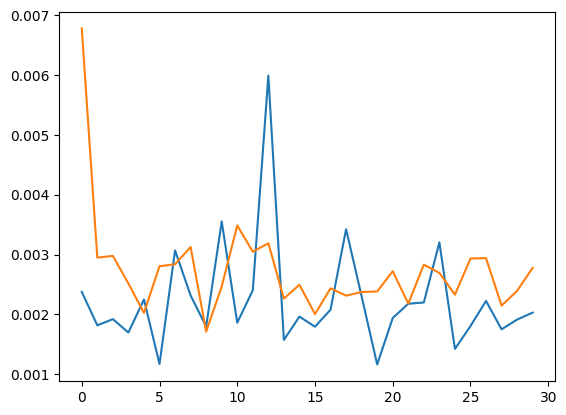

In [168]:
start = time.time()
optimizer.maximize(init_points=1, n_iter=1)
end = time.time()
print('Bayes optimization takes {:.2f} seconds to tune'.format(end - start))
print(optimizer.max)

torch.Size([131318, 8]) torch.Size([131318, 1]) torch.Size([32830, 8]) torch.Size([32830, 1])
tensor(0.2214, grad_fn=<MseLossBackward0>)
tensor(0.1829, grad_fn=<MseLossBackward0>)
tensor(0.1506, grad_fn=<MseLossBackward0>)
tensor(0.1237, grad_fn=<MseLossBackward0>)
tensor(0.1019, grad_fn=<MseLossBackward0>)
RMSE on test set: 0.3338211178779602


-0.11143654

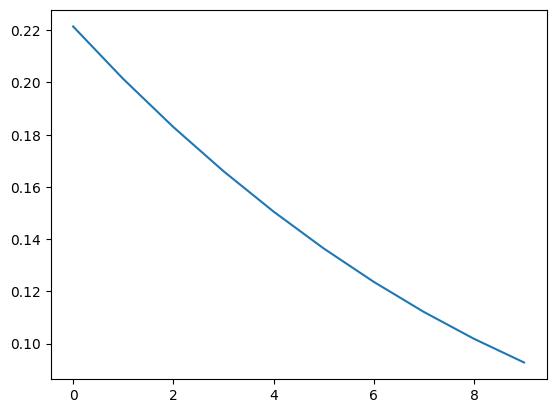

In [186]:
training(x_train=X_train,y_train=y_train,x_test=X_test,y_test=y_test,lr=1.0073947202285034e-05,l2= 1.1581808634566612e-06,batch_size=128,epochs=10)

torch.Size([131318, 8]) torch.Size([131318, 1]) torch.Size([32830, 8]) torch.Size([32830, 1])
tensor(0.0406, grad_fn=<MseLossBackward0>)
tensor(0.0407, grad_fn=<MseLossBackward0>)
tensor(0.0407, grad_fn=<MseLossBackward0>)
tensor(0.0408, grad_fn=<MseLossBackward0>)
tensor(0.0408, grad_fn=<MseLossBackward0>)
tensor(0.0409, grad_fn=<MseLossBackward0>)
tensor(0.0409, grad_fn=<MseLossBackward0>)
tensor(0.0407, grad_fn=<MseLossBackward0>)
tensor(0.0408, grad_fn=<MseLossBackward0>)
tensor(0.0407, grad_fn=<MseLossBackward0>)
tensor(0.0409, grad_fn=<MseLossBackward0>)
tensor(0.0407, grad_fn=<MseLossBackward0>)
tensor(0.0409, grad_fn=<MseLossBackward0>)
tensor(0.0406, grad_fn=<MseLossBackward0>)
tensor(0.0406, grad_fn=<MseLossBackward0>)
RMSE on test set: 0.20056632161140442


-0.040226847

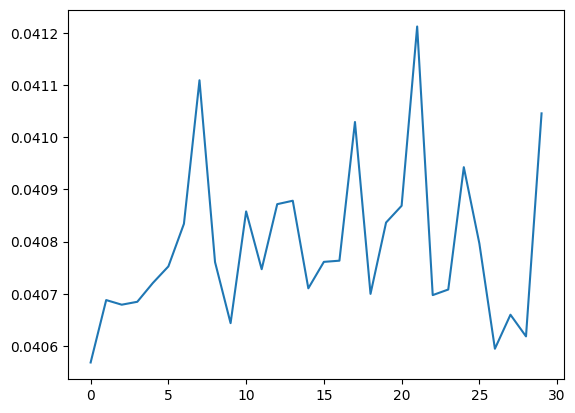

In [169]:
training(x_train=X_train,y_train=y_train,x_test=X_test,y_test=y_test,lr=0.004176049826978714,l2= 0.007206041689487159,batch_size=64,epochs=30)

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [180]:
 pip install scikit-optimize


Note: you may need to restart the kernel to use updated packages.


In [ ]:
F_Predictor

torch.Size([131318, 8]) torch.Size([131318, 1]) torch.Size([32830, 8]) torch.Size([32830, 1])
tensor(0.0027, grad_fn=<MseLossBackward0>)
tensor(0.0025, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
RMSE on test set: 0.0553915798664093
torch.Size([131318, 8]) torch.Size([131318, 1]) torch.Size([32830, 8]) torch.Size([32830, 1])
tensor(0.2572, grad_fn=<MseLossBackward0>)
tensor(0.1584, grad_fn=<MseLossBackward0>)
tensor(0.1019, grad_fn=<MseLossBackward0>)
t

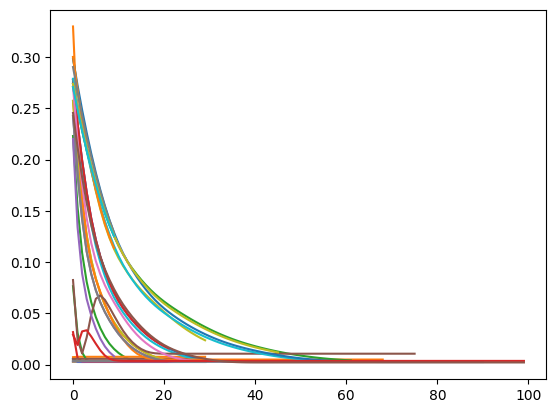

In [184]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from skopt import gp_minimize
from skopt.space import Real, Integer

# Dummy Model Definition for the sake of example
class F_Predictor(nn.Module):
    def __init__(self):
        super(F_Predictor, self).__init__()
        self.layer = nn.Linear(8, 1)  # assuming input features = 10

    def forward(self, x):
        return self.layer(x)

# Objective function
def objective_function(params):
    lr, l2, batch_size, epochs = params
    return training(lr=lr, l2=l2, batch_size=int(batch_size), epochs=int(epochs))

# Training function
def training(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, lr=0.001, l2=0.001, batch_size=64, epochs=30):
    torch.manual_seed(0)
    losses = []
    x_train, y_train, x_test, y_test = map(torch.FloatTensor, (x_train.values, y_train.values, x_test.values, y_test.values))
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

    train_ds = TensorDataset(x_train, y_train)
    train_dl = DataLoader(train_ds, batch_size=batch_size)
    model = F_Predictor()
    loss_func = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=l2)
    
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            pred = model(xb)
            loss = loss_func(pred, yb)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        if epoch == 0 or epoch % 2 == 0:
            print(loss)
        losses.append(loss.item())
    
    plt.plot(losses)
    model.eval()
    mse = mean_squared_error(model(x_test).detach().numpy(), y_test.detach().numpy())
    print('RMSE on test set: {}'.format(np.sqrt(mse)))
    return -mse  # Return negative MSE for minimization

# Partition the variables for VP-BO
def vpbo_optimization():
    space = [
        Real(1e-5, 1e-1, name='lr', prior='log-uniform'),
        Real(1e-6, 1e-2, name='l2', prior='log-uniform'),
        Integer(16, 128, name='batch_size'),
        Integer(10, 100, name='epochs')
    ]

    # Partitions: e.g., Partition 1 (lr, l2), Partition 2 (batch_size, epochs)
    partitions = [(0, 1), (2, 3)]

    # Initial hyperparameters
    x0 = [0.001, 0.001, 64, 30]

    res = x0.copy()

    # Loop through the partitions and optimize each one separately
    for partition in partitions:
        def partial_objective(partial_params):
            # Fill in the parameters from the current partition
            full_params = res.copy()
            for idx, value in zip(partition, partial_params):
                full_params[idx] = value
            return objective_function(full_params)

        partial_space = [space[i] for i in partition]

        # Optimize the current partition
        result = gp_minimize(partial_objective, partial_space, n_calls=20, x0=[res[i] for i in partition])
        
        # Update the results with the best found values for this partition
        for idx, value in zip(partition, result.x):
            res[idx] = value
    
    return res

# Execute the optimization
best_hyperparams = vpbo_optimization()
print("Best Hyperparameters found: ", best_hyperparams)


With Neurons

torch.Size([131318, 8]) torch.Size([131318, 1]) torch.Size([32830, 8]) torch.Size([32830, 1])
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
RMSE on test set: 0.01779589243233204
torch.Size([131318, 8]) torch.Size([131318, 1]) torch.Size([32830, 8]) torch.Size([32830, 1])
tensor(0.0181, grad_fn=<MseLossBackward0>)
tensor(0.0034, grad_fn=<MseLossBackward0>)
tensor(0.0023, grad_fn=<MseLossBackward0>)


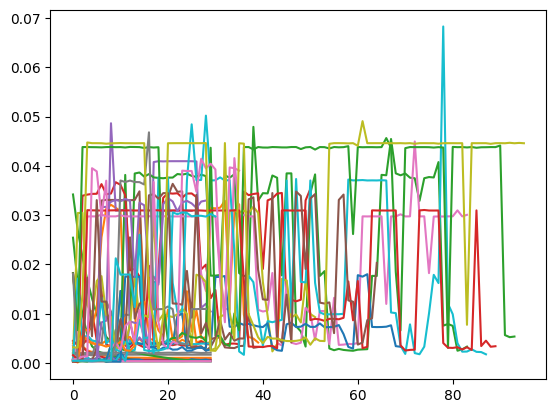

In [189]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from skopt import gp_minimize
from skopt.space import Real, Integer

# Updated Model Definition to include number of neurons
class F_Predictor(nn.Module):
    def __init__(self, n_neurons=10):
        super(F_Predictor, self).__init__()
        self.layer = nn.Linear(8, n_neurons)  # Input features assumed to be 10
        self.output_layer = nn.Linear(n_neurons, 1)  # Output layer

    def forward(self, x):
        x = torch.relu(self.layer(x))  # Use ReLU activation
        return self.output_layer(x)

# Objective function
def objective_function(params):
    lr, l2, batch_size, epochs, n_neurons = params
    return training(lr=lr, l2=l2, batch_size=int(batch_size), epochs=int(epochs), n_neurons=int(n_neurons))

# Training function
def training(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, lr=0.001, l2=0.001, batch_size=64, epochs=30, n_neurons=10):
    torch.manual_seed(0)
    losses = []
    x_train, y_train, x_test, y_test = map(torch.FloatTensor, (x_train.values, y_train.values, x_test.values, y_test.values))
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

    train_ds = TensorDataset(x_train, y_train)
    train_dl = DataLoader(train_ds, batch_size=batch_size)
    model = F_Predictor(n_neurons=n_neurons)
    loss_func = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=l2)
    
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            pred = model(xb)
            loss = loss_func(pred, yb)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        if epoch == 0 or epoch % 2 == 0:
            print(loss)
        losses.append(loss.item())
    
    plt.plot(losses)
    model.eval()
    mse = mean_squared_error(model(x_test).detach().numpy(), y_test.detach().numpy())
    print('RMSE on test set: {}'.format(np.sqrt(mse)))
    return -mse  # Return negative MSE for minimization

# Partition the variables for VP-BO
def vpbo_optimization():
    space = [
        Real(1e-5, 1e-1, name='lr', prior='log-uniform'),
        Real(1e-6, 1e-2, name='l2', prior='log-uniform'),
        Integer(16, 128, name='batch_size'),
        Integer(10, 100, name='epochs'),
        Integer(10, 100, name='n_neurons')  # New hyperparameter for number of neurons
    ]

    # Partitions: e.g., Partition 1 (lr, l2), Partition 2 (batch_size, epochs, n_neurons)
    partitions = [(0, 1), (2, 3, 4)]

    # Initial hyperparameters
    x0 = [0.001, 0.001, 64, 30, 10]

    res = x0.copy()

    # Loop through the partitions and optimize each one separately
    for partition in partitions:
        def partial_objective(partial_params):
            # Fill in the parameters from the current partition
            full_params = res.copy()
            for idx, value in zip(partition, partial_params):
                full_params[idx] = value
            return objective_function(full_params)

        partial_space = [space[i] for i in partition]

        # Optimize the current partition
        result = gp_minimize(partial_objective, partial_space, n_calls=20, x0=[res[i] for i in partition])
        
        # Update the results with the best found values for this partition
        for idx, value in zip(partition, result.x):
            res[idx] = value
    
    return res

# Execute the optimization
best_hyperparams = vpbo_optimization()
print("Best Hyperparameters found: ", best_hyperparams)


In [ ]:
 Real(1e-5, 1e-1, name='lr', prior='log-uniform'),
        Real(1e-6, 1e-2, name='l2', prior='log-uniform'),
        Integer(16, 128, name='batch_size'),
        Integer(10, 100, name='epochs'),
        Integer(10, 100, name='n_neurons'

In [ ]:
0.1, 2.4333541172908522e-06, 42, 84, 33

torch.Size([131318, 8]) torch.Size([131318, 1]) torch.Size([32830, 8]) torch.Size([32830, 1])
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0298, grad_fn=<MseLossBackward0>)
tensor(0.0298, grad_fn=<MseLossBackward0>)
tensor(0.0298, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0298, grad_fn=<MseLossBackward0>)
tensor(0.0298, grad_fn=<MseLossBackward0>)
tensor(0.0298, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
ten

-0.0402324

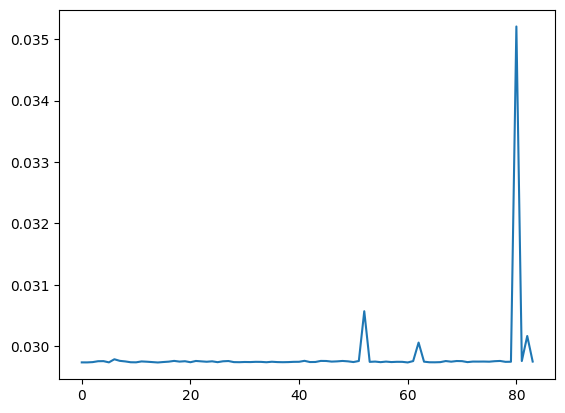

In [190]:
training(x_train=X_train,y_train=y_train,x_test=X_test,y_test=y_test,lr=0.1,l2=2.4333541172908522e-06 ,batch_size=42,epochs=84, n_neurons=33)

In [308]:
import numpy as np
import sklearn.gaussian_process as gpr
import time
from joblib import Parallel, delayed

import sys

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', RuntimeWarning)
warnings.simplefilter('ignore', ConvergenceWarning)
from scipy.optimize import minimize, Bounds, NonlinearConstraint
from collections import OrderedDict
import torch

from gpytorch.kernels import RBFKernel, ScaleKernel
from gpytorch.means import ConstantMean
from gpytorch.models import ExactGP
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.mlls import ExactMarginalLogLikelihood
from torch.optim import LBFGS

In [1]:
from skopt import gp_minimize


In [231]:
# Define Parameters
exp_w = 2.6
#C0varf = np.loadtxt('')
FR = np.array([0.100, 0.075, 0.075])
R_Frac = 1e-6
ub = np.array([423, 423])
lb = np.array([303, 303])
bounds = Bounds((0, 0), (1, 1))
dim = len(ub)
kernel = gpr.kernels.Matern((1, 1), ((0.06, 5), (0.06, 5)), nu = 2.5)

In [234]:
def normalize(x, axis = None, mu = None, sigma = None):
    if mu is None:
        mu = np.mean(x, axis = axis)
        sigma = np.std(x, axis = axis, ddof = 1)
        return (x-mu)/sigma, mu, sigma
    
    else:
        return (x-mu)/sigma


def unnormalize(x, mu, sigma):
    return sigma*x+mu

def descale(self, x):
    m = (ub-lb)/(bounds.ub-bounds.lb)
    b = ub-m*bounds.ub
    return m*x+b


def scale(x, use_self = True, lb = None, ub = None):
    if use_self:    
        m = (bounds.ub-bounds.lb)/(ub-lb)
        b = bounds.ub-m*ub
    else:
        m = (bounds.ub-bounds.lb)/(ub-lb)
        b = bounds.ub-m*ub
    return m*x+b

def LCB(x, model, dim, refmod = None,  args = ()):
    x = np.array([x]).reshape(-1,1);
    x = x.reshape(int(x.shape[0]/dim), dim)
    
    mu, std = model.predict(x, return_std=True);
    mu = mu.flatten()
    
    yref = refmod(descale(x), *args)
        
    return (yref+mu-exp_w*std).flatten()

In [ ]:
upper= max(df_scaled.max('target')

In [291]:
ub = np.ones((1,dim))
lb = np.zeros((1, dim))
bounds = Bounds(lb, ub)

In [288]:
lb

array([[0., 0., 0., 0., 0., 0., 0., 0.]])

In [293]:
# Define Parameters
exp_w = 2.6
#C0varf = np.loadtxt('')
FR = np.array([0.100, 0.075, 0.075])
R_Frac = 1e-6
dim = len(ub)
kernel = gpr.kernels.Matern((1, 1), ((0.06, 5), (0.06, 5)), nu = 2.5)

In [292]:
bounds

Bounds(array([[0., 0.]]), array([[1., 1.]]))

optimvpbo
"""
        VP-BO approach...
        The partitions are made using the 'split_num' argument; this sets the number of blocks that the variables
        are split into. 
        The 'liminit' argument sets the initial value for the x_{-k} variables.
        Note that when introducing the design variables, x, they should be ordered by subsystem.
        For example if d = 4, and split_num = 2, introducing x = (x_a, x_b, x_c, x_d) will set
        x_1 = (x_a, x_b) and x_{-1}] = (x_c, x_d), and x_2 = (x_c, x_d) and x_{-2} = (x_a, x_b).
        The 'fcores' argument sets the number of cores used for parallel experimentation, and
        the 'afcores' argument sets the cores used for optimizing the AF
        """

In [326]:
import numpy as np

# Example parameters
i = 2
div = 3
x = np.zeros((5, 15))  # A 5x15 array initialized with zeros

# Assign random values to the specified slice
x[i, i*div:(i+1)*div] = np.random.uniform(0, 1, (1, div))

print(x)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.65804502 0.30619357 0.25132038 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


In [236]:
def optimvpbo(trials, split_num, liminit, scaling_factor, fcores, afcores, xinit  = None):
    print('Partitioned Variables BO Run...')
    start= time.time()
    trialspltvar = trials
    splitvar = split_num
    timespltvar= np.zeros(trialspltvar+1)
    timefspltvar = np.zeros(trialspltvar+1)
    div = int(dim/splitvar)
    sf = scaling_factor
    refmod = np.array([]).reshape(0, dim)

    x = liminit*np.ones((splitvar, dim))
    lwr = x.copy()
    upr = x.copy()+1e-6

        
    for i in range(splitvar):
        if xinit is None:
            x[i, i*div:(i+1)*div] = np.random.uniform(0, 1, (1, div))
        else:
            xinit = xinit().reshape(1, dim)
            x[i, i*div:(i+1)*div] = xinit[0, i*div:(i+1)*div]
        lwr[i, i*div:(i+1)*div] = 0
        upr[i, i*div:(i+1)*div] = sf
        x = np.vstack([x, liminit])
        splt = int(x.shape[0]/fcores)
        xbs = np.array(np.ones(fcores), dtype = tuple)


        if fcores == 1:
            xbs[0] = x
        else:
            for i in range(fcores-1):
                xbs[i] = x[i*splt:(i+1)*splt, :]
            xbs[-1] = x[(i+1)*splt:, :]

        startf = time.time()  
    y = Parallel(n_jobs = fcores)(delayed(math.sqrt(i**2))((start_point)) for start_point in xbs)
    if str(type(refmod))=="<class '__main__.Network'>":
        yref = Parallel(n_jobs = fcores)(delayed(refmod)(start_point) for start_point in torch.from_numpy(x).float())
        endf = time.time()
        yref = torch.hstack(yref[:]).T.reshape(-1, 1).data.numpy()      
    else:
        yref = Parallel(n_jobs = fcores)(delayed(math.sqrt(i**2))((start_point)) for start_point in xbs)
        endf = time.time()
        yref = np.vstack(yref[:])
    timefspltvar[0] = endf-startf
    y = np.vstack(y[:])
    eps = y-yref
    ybst = np.min(y, axis = 0).reshape(-1, 1).T
    modelspltvar = {}
    bndsvar = {}
    LCB = {}
    xnxt = x.copy()
    init_pts = int(round(128**(div/dim)))
    x0 = np.random.uniform(0, sf, (init_pts, dim))


    for i in range(splitvar):
        modelspltvar[str(i+1)] = gpr.GaussianProcessRegressor(kernel, alpha = 1e-6,
                                                                  n_restarts_optimizer = 10,
                                                                  normalize_y = True)
        modelspltvar[str(i+1)].fit(x, eps[:, i])
        bndsvar[str(i+1)] = Bounds(lwr[i], upr[i])
        LCB[str(i+1)] = LCB(modelspltvar[str(i+1)], dim, exp_w,
                                   descale, **{'refmod': dist_ref['distrefmod'+str(i+1)]}).LCB
        opt = Parallel(n_jobs = afcores)(delayed(minimize)(LCB[str(i+1)], x0 = start_point,
                                                        method = 'L-BFGS-B',
                                                        bounds = bndsvar[str(i+1)])   
                                        for start_point in x0)   
        xnxts = np.array([res.x for res in opt], dtype = 'float')
        funs = np.array([np.atleast_1d(res.fun)[0] for res in opt])
        xnxt[i] = xnxts[np.argmin(funs)]
        xnxt[-1, i*div:(i+1)*div] = xnxts[np.argmin(funs), i*div:(i+1)*div]
    xnxtbs = np.array(np.ones(fcores), dtype = tuple)
    end = time.time()
    timespltvar[0] = end-start
    for i in range(trialspltvar):
        if fcores == 1:
            xnxtbs[0] = xnxt
        else:
            for j in range(fcores-1):
                xnxtbs[j] = xnxt[j*splt:(j+1)*splt, :]
            xnxtbs[-1] = xnxt[(j+1)*splt:, :]
        startf = time.time()
        ynxt = Parallel(n_jobs = fcores)(delayed(math.sqrt(i**2))(descale(start_point)) for start_point in xnxtbs)
        if str(type(refmod))=="<class '__main__.Network'>":
            yref = Parallel(n_jobs = fcores)(delayed(math.sqrt(i**2))(start_point) for start_point in torch.from_numpy(x).float())
            endf = time.time()
            yref = torch.hstack(yref[:]).T.reshape(-1, 1).data.numpy()
        else:
            yref = Parallel(n_jobs = fcores)(delayed(math.sqrt(i**2))(descale(start_point)) for start_point in xnxtbs)
            endf = time.time()
            yref = np.vstack(yref[:])
        ynxt = np.vstack(ynxt[:])
        epsnxt = ynxt-yref
        timefspltvar[i+1] = timefspltvar[i]+(endf-startf)
        for j in range(splitvar):
            if any(ynxt[:, j] < min(y[:, j])):
                lwr[j] = xnxt[np.argmin(ynxt[:, j])]
                lwr[j, j*div:(j+1)*div] = 0
                upr[j] = xnxt[np.argmin(ynxt[:, j])]+1e-6
                upr[j, j*div:(j+1)*div] = sf
        x = np.vstack([x, xnxt])
        y = np.vstack([y, ynxt])
        eps = np.vstack([eps, epsnxt])
        ybst = np.vstack([ybst, np.min(ynxt, axis = 0).reshape(-1,1).T])
        x0 = np.random.uniform(0, sf, (init_pts, dim))
        for j in range(splitvar):
            modelspltvar[str(j+1)].fit(x, eps[:, j])
            bndsvar[str(j+1)] = Bounds(lwr[j], upr[j])
            opt = Parallel(n_jobs = afcores)(delayed(minimize)(LCB[str(j+1)], x0 = start_point,
                                                                method = 'L-BFGS-B',
                                                                bounds = bndsvar[str(j+1)])
                                            for start_point in x0)
            xnxts = np.array([res.x for res in opt], dtype = 'float')
            funs = np.array([np.atleast_1d(res.fun)[0] for res in opt])
            xnxt[j] = xnxts[np.argmin(funs)]
            xnxt[-1, j*div:(j+1)*div] = xnxts[np.argmin(funs), j*div:(j+1)*div]
        end = time.time()
        timespltvar[i+1] = end-start
    spltvar_optim = True
    modelspltvar = modelspltvar
    xspltvar = descale(x)
    yspltvar = y
    yspltvarbst = ybst

In [238]:
from joblib import Parallel, delayed
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Define the neural network model (F_Predictor needs to be defined separately)
class F_Predictor(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(F_Predictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the training function
def training(x_train, y_train, x_test, y_test, lr, l2, batch_size, epochs, neurons):
    torch.manual_seed(0)
    losses = []
    x_train, y_train, x_test, y_test = map(
    torch.FloatTensor, (x_train.values, y_train.values, x_test.values, y_test.values)
    )
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

    train_ds = TensorDataset(x_train, y_train)
    train_dl = DataLoader(train_ds, batch_size=batch_size)
    
    # Initialize the model with the specified number of neurons
    model = F_Predictor(input_dim=x_train.shape[1], hidden_dim=neurons)
    
    loss_func = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=l2)
    
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            pred = model(xb)
            loss = loss_func(pred, yb)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        if epoch == 0 or epoch % 2 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')
        losses.append(loss.item())
    
    # Plot the training loss
    plt.plot(losses)
    plt.title(f'Loss Curve (lr={lr}, l2={l2}, neurons={neurons})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    
    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        mse = mean_squared_error(model(x_test).numpy(), y_test.numpy())
    rmse = np.sqrt(mse)
    print(f'RMSE on test set: {rmse}')
    
    return rmse  # Minimize RMSE during optimization

# Hyperparameter optimization using Parallel
def parallel_vpbo(x_train, y_train, x_test, y_test, trials=10, fcores=4):
    # Define the search space
    lr_range = [0.001, 0.01, 0.1]
    l2_range = [0.001, 0.01]
    batch_size_range = [32, 64, 128]
    epochs_range = [30, 50]
    neurons_range = [32, 64, 128]

    # List of all hyperparameter combinations
    param_combinations = [(lr, l2, batch_size, epochs, neurons)
                          for lr in lr_range
                          for l2 in l2_range
                          for batch_size in batch_size_range
                          for epochs in epochs_range
                          for neurons in neurons_range]

    # Function to run one trial
    def run_trial(params):
        lr, l2, batch_size, epochs, neurons = params
        return training(x_train, y_train, x_test, y_test, lr, l2, batch_size, epochs, neurons)

    # Run trials in parallel
    results = Parallel(n_jobs=fcores)(delayed(run_trial)(params) for params in param_combinations[:trials])

    # Find the best result
    best_rmse = min(results)
    best_params = param_combinations[results.index(best_rmse)]

    print(f'Best RMSE: {best_rmse}')
    print(f'Best Hyperparameters: {best_params}')

    return best_params, best_rmse

# Example usage
# Ensure x_train, y_train, x_test, y_test are defined and preprocessed
best_params, best_rmse = parallel_vpbo(X_train, y_train, X_test, y_test)


NameError: name 'X_train' is not defined

In [325]:
training(x_train, y_train, x_test, y_test, lr= 0.001, l2=0.001, batch_size=32, epochs=84, neurons=64)

torch.Size([131318, 8]) torch.Size([131318, 1]) torch.Size([32830, 8]) torch.Size([32830, 1])
Epoch 0, Loss: 0.00026037151110358536
Epoch 2, Loss: 0.0002636632416397333
Epoch 4, Loss: 0.0002711877750698477
Epoch 6, Loss: 0.0002726299862843007
Epoch 8, Loss: 0.0002740581694524735
Epoch 10, Loss: 0.0002787254343274981
Epoch 12, Loss: 0.0002834406041074544
Epoch 14, Loss: 0.00028546492103487253
Epoch 16, Loss: 0.0002864048001356423
Epoch 18, Loss: 0.00028930522967129946
Epoch 20, Loss: 0.00029066865681670606
Epoch 22, Loss: 0.0002958805998787284
Epoch 24, Loss: 0.000293007557047531
Epoch 26, Loss: 0.0002929173060692847
Epoch 28, Loss: 0.00028723885770887136
Epoch 30, Loss: 0.0002912341442424804
Epoch 32, Loss: 0.0002922802232205868
Epoch 34, Loss: 0.00029274055850692093
Epoch 36, Loss: 0.0002931477501988411
Epoch 38, Loss: 0.00029813029686920345
Epoch 40, Loss: 0.0003020959557034075
Epoch 42, Loss: 0.0003045365447178483
Epoch 44, Loss: 0.00030018604593351483
Epoch 46, Loss: 0.000299988634

KeyboardInterrupt: 

In [2]:
x_train

NameError: name 'x_train' is not defined

In [3]:
# Corrected optimvpbo function
def optimvpbo(trials, split_num, liminit, scaling_factor, fcores, afcores, xinit=None):
    print('Partitioned Variables BO Run...')
    start = time.time()
    trialspltvar = trials
    splitvar = split_num
    timespltvar = np.zeros(trialspltvar + 1)
    timefspltvar = np.zeros(trialspltvar + 1)
    dim = 8  # Example dimension; adjust according to your data
    div = int(dim / splitvar)
    sf = scaling_factor
    refmod = np.array([]).reshape(0, dim)

    x = liminit * np.ones((splitvar, dim))
    lwr = x.copy()
    upr = x.copy() + 1e-6

    for i in range(splitvar):
        if xinit is None:
            x[i, i*div:(i+1)*div] = np.random.uniform(0, 1, (1, div))
        else:
            xinit = xinit.reshape(1, dim)
            x[i, i*div:(i+1)*div] = xinit[0, i*div:(i+1)*div]
        lwr[i, i*div:(i+1)*div] = 0
        upr[i, i*div:(i+1)*div] = sf
        x = np.vstack([x, np.full((1, dim), liminit)])

        splt = int(x.shape[0] / fcores)
        xbs = np.array(np.ones(fcores), dtype=tuple)

        if fcores == 1:
            xbs[0] = x
        else:
            for i in range(fcores - 1):
                xbs[i] = x[i * splt:(i + 1) * splt, :]
            xbs[-1] = x[(i + 1) * splt:, :]

        startf = time.time()

        # Corrected line using delayed properly
        y = Parallel(n_jobs=fcores)(delayed(lambda sp: math.sqrt(np.sum(sp**2)))(start_point) for start_point in xbs)

        if str(type(refmod)) == "<class '__main__.Network'>":
            yref = Parallel(n_jobs=fcores)(delayed(refmod)(start_point) for start_point in torch.from_numpy(x).float())
            endf = time.time()
            yref = torch.hstack(yref[:]).T.reshape(-1, 1).data.numpy()
        else:
            yref = Parallel(n_jobs=fcores)(delayed(lambda sp: math.sqrt(np.sum(sp**2)))(start_point) for start_point in xbs)
            endf = time.time()
            yref = np.vstack(yref[:])
        timefspltvar[0] = endf - startf
        y = np.vstack(y[:])
        eps = y - yref
        ybst = np.min(y, axis=0).reshape(-1, 1).T
        modelspltvar = {}
        bndsvar = {}
        LCB = {}
        xnxt = x.copy()
        init_pts = int(round(128**(div / dim)))
        x0 = np.random.uniform(0, sf, (init_pts, dim))

        for i in range(splitvar):
            modelspltvar[str(i+1)] = gp_minimize
            bndsvar[str(i+1)] = Bounds(lwr[i], upr[i])
            LCB[str(i+1)] = LCB(modelspltvar[str(i+1)], dim, exp_w,
                                   descale, **{'refmod': dist_ref['distrefmod'+str(i+1)]}).LCB
            opt = Parallel(n_jobs = afcores)(delayed(minimize)(LCB[str(i+1)], x0 = start_point,
                                                        method = 'L-BFGS-B',
                                                        bounds = bndsvar[str(i+1)])   
                                        for start_point in x0) 
               
            xnxts = np.array([res.x for res in opt], dtype='float')
            funs = np.array([np.atleast_1d(res.fun)[0] for res in opt])
            xnxt[i] = xnxts[np.argmin(funs)]
            xnxt[-1, i*div:(i+1)*div] = xnxts[np.argmin(funs), i*div:(i+1)*div]
        xnxtbs = np.array(np.ones(fcores), dtype=tuple)
        end = time.time()
        timespltvar[0] = end - start
        for i in range(trialspltvar):
            if fcores == 1:
                xnxtbs[0] = xnxt
            else:
                for j in range(fcores - 1):
                    xnxtbs[j] = xnxt[j * splt:(j + 1) * splt, :]
                xnxtbs[-1] = xnxt[(j + 1) * splt:, :]
            startf = time.time()
            ynxt = Parallel(n_jobs=fcores)(delayed(lambda sp: math.sqrt(np.sum(descale(sp)**2)))(start_point) for start_point in xnxtbs)
            if str(type(refmod)) == "<class '__main__.Network'>":
                yref = Parallel(n_jobs=fcores)(delayed(lambda sp: math.sqrt(np.sum(sp**2)))(start_point) for start_point in torch.from_numpy(x).float())
                endf = time.time()
                yref = torch.hstack(yref[:]).T.reshape(-1, 1).data.numpy()
            else:
                yref = Parallel(n_jobs=fcores)(delayed(lambda sp: math.sqrt(np.sum(descale(sp)**2)))(start_point) for start_point in xnxtbs)
                endf = time.time()
                yref = np.vstack(yref[:])
            ynxt = np.vstack(ynxt[:])
            epsnxt = ynxt - yref
            timefspltvar[i + 1] = timefspltvar[i] + (endf - startf)
            for j in range(splitvar):
                if any(ynxt[:, j] < min(y[:, j])):
                    lwr[j] = xnxt[np.argmin(ynxt[:, j])]
                    lwr[j, j * div:(j + 1) * div] = 0
                    upr[j] = xnxt[np.argmin(ynxt[:, j])] + 1e-6
                    upr[j, j * div:(j + 1) * div] = sf
        x = np.vstack([x, xnxt])
        y = np.vstack([y, ynxt])
        eps = np.vstack([eps, epsnxt])

    return y, timespltvar, timefspltvar

In [ ]:
'''
def para(trials_num, split_features, ):
     print('Partitioned Variables BO Run...')
     start= time.time()
     trials_num = trials_num
     split_features= split_features

'''

In [ ]:
## VP-BO 
for i, a_0 in enumerate(x_train):
    start = time.time()
    optimvpbo(trials = 2,
                             split_num = 2,
                             liminit = 4,
                             scaling_factor=2,
                             fcores = 3,
                             afcores = 1,
                             #refcores = 1,
                             xinit  = None)
    end = time.time()
    print('Run time '+str(end-start)+'s')
    print('iteration '+str(i+1))

Partitioned Variables BO Run...


NameError: name 'dist_ref' is not defined

In [ ]:
df_corr[non_numeric_columns] = df_corr[non_numeric_columns].astype(float)

In [ ]:
cleaned_data.columns

Index(['hotRunner', 'hotRunnerCost', 'manufacturingCost',
       'mouldValidationCost', 'designTime', 'hourlyDesignCost',
       'removedChassis', 'removedCavity', 'numberOfCavities', 'Cost',
       'human health - photochemical oxidation',
       'ecosystem quality - terrestrial ecotoxicity',
       'resources - mineral extraction', 'resources - non-renewable energy',
       'ecosystem quality - terrestrial acidification & nutrification',
       'resources - total', 'human health - ionising radiation',
       'human health - respiratory effects (inorganics)',
       'human health - total', 'human health - human toxicity',
       'ecosystem quality - aquatic ecotoxicity',
       'climate change - climate change',
       'human health - ozone layer depletion',
       'ecosystem quality - land occupation', 'climate change - total',
       'ecosystem quality - total'],
      dtype='object')

In [177]:
import pandas
from sklearn import linear_model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
# import the necessary packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn import metrics

# use month, mintemp, and meantemp to predict max temp

# split into train and test data
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# run linear regression and make predictions
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
predictions = lin_reg.predict(X_test)

# what is line of best fit
print("intercept (m): ", model.intercept_)
print("coef (b) of each independent variable: ", model.coef_)
print("RScore. (r) ", model.score(X_test,y_test))

# how close is our regression?
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

print("r2 score")
pred_train = lin_reg.predict(X_train)
print("Train set:", metrics.r2_score(y_train, lin_reg.predict(X_train)))
pred_test = lin_reg.predict(X_test)
print("Test set:", metrics.r2_score(y_test, predictions))

intercept (m):  [0.33580905]
coef (b) of each independent variable:  [[ 1.47217664e-03  1.09199797e-03 -7.50890897e-05 -1.25874933e-03
   2.69687891e-05 -1.73216461e-04  4.29331260e-03 -2.61367468e-04]]
RScore. (r)  2.3758634905890474e-05
MAE: 0.16174673735647382
r2 score
Train set: 5.0013864723919e-05
Test set: 2.3758634905890474e-05


In [ ]:
from typing import Tuple, List

In [ ]:
from gpytorch.kernels import RBFKernel, ScaleKernel
from gpytorch.means import ConstantMean
from gpytorch.models import ExactGP
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.mlls import ExactMarginalLogLikelihood
from torch.optim import LBFGS


In [ ]:
pip install tensorflow.python scikeras scikit-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow.python (from versions: none)
ERROR: No matching distribution found for tensorflow.python


In [332]:
def vpbo_loop(trials, split_num, liminit, fcores=1, afcores=1, refcores=1, x_init=x): 
    mll = {}
    gp = {}
    acq_fun = {}

# Simulate BO
    for i in range(splitvar):
        # 1. Create a new GP with the best setup 
        gp[str(i+1)], mll[str(i+1)] = get_gp(
            X_train,
            y_train,
            ConstantMean(),
            ScaleKernel(RBFKernel()),
            GaussianLikelihood()
        )
        
        mll[str(i+1)] = fit_gpytorch_mll(mll)
        bnds_var[str(i+1)] = Bounds(lwr[i], upr[i])
        # 2. Define and optimize an acquisition function
        acq_fun[str(i+1)] = ExpectedImprovement(model=gp[str(i+1)], 
                                                best_f=torch.min(y_train))


        for j in range(splitvar):
            opt = Parallel(n_jobs = af_cores)(delayed(optimize_acqf(
                                                                    acq_fun[str(j+1)],
                                                                    bounds=bounds,
                                                                    q=1, num_restarts=5,raw_samples=20,
                                                                    inequality_constraints=ineq_constraint
                                                                    )          
                                                        )
                                                    for x_0 in x0)
            
            X_test_new = np.array([res.x for res in opt], dtype = 'float')
            acqf_val = np.array([np.atleast_1d(res.fun)[0] for res in opt])
            X_test_new[j] = X_test_new[np.argmin(acqf_val)]
            X_test_new[-1, j*div:(j+1)*div] = X_test_new[np.argmin(acqf_val), j*div:(j+1)*div]

        if f_cores == 1:
                X_test_best[0] = X_test_new
        else:
                for j in range(f_cores-1):
                    X_test_best[j] = X_test_new[j*splt:(j+1)*splt, :]
                X_test_best[-1] = X_test[(j+1)*splt:, :]


        
        y_test_new = Parallel(n_jobs = f_cores)(delayed(self.distmod)(descale(x_s), *self.args)
                                             for x_s in x_nxtbs)



        

        X_train = torch.vstack((X_train, X_test_new))
        y_train = torch.vstack((y_train, y_test_new))
        y_test_new= torch.vstack((y_test_new[:]))
        eps_next = y_test_new-y_test
        eps = torch.vstack([eps, eps_next])
        y_best = torch.vstack([y_best, np.min(y_test_new, axis = 0).reshape(-1,1).T])
        
        for j in range(splitvar):
             if any(y_test_new[:,j] < min(y[:,j])):
                lwr[j] = X_test_new[np.argmin(y_test_new[:, j])]
                lwr[j, j*div:(j+1)*div] = bounds.lb[j]
                upr[j] = X_test_new[np.argmin(y_test_new[:, j])]+1e-6
                upr[j, j*div:(j+1)*div] = bounds.ub[j]  

        for j in range(splitvar):
            mll[str(i+1)] = fit_gpytorch_mll(mll)
            acq_fun[str(i+1)] = ExpectedImprovement(model=gp[str(i+1)], 
                                                best_f=torch.min(y_train))
            [str(j+1)].fit(x, eps[:, j])
            bnds_var[str(j+1)] = Bounds(lwr[j], upr[j])          
        end =time.time()
        time_vp[i+init_pts] = end-start

        print('ITERATION COUNT IS AT 'f'{init_pts+i+1};\
                  TOTAL ELAPSED TIME: 'f'{time_vp[i+init_pts]:.1f}')
        
    vpbo_optim = True
    model_vp = gp
    x_vp = descale(x)
    y_vp = y
    y_vpbst = y_best

In [333]:
vpbo_loop(trials=10, split_num=2, liminit=np, fcores=1, afcores=1, refcores=1, x_init=x)

SyntaxError: positional argument follows keyword argument (2673899882.py, line 1)

In [ ]:
pip install tensorflow-text==2.13.0


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow-text==2.13.0 (from versions: none)
ERROR: No matching distribution found for tensorflow-text==2.13.0


In [ ]:
'''
from keras.layers import Dense, Dropout
from numpy import sqrt
from numpy import argmax
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import time
import os
from sklearn.model_selection import train_test_split

from sklearn.utils import resample
from sklearn.metrics import confusion_matrix,roc_curve, classification_report, f1_score, roc_auc_score,accuracy_score, recall_score, precision_score,log_loss, make_scorer, cohen_kappa_score,fbeta_score,matthews_corrcoef,recall_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

import math
import ast

from sklearn.metrics import auc

#for RadomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

# random seed
from random_seeds import reset_seeds

# Percentile bootstrap
from bootstrapmetric_diabetes import bootstrap_metric
# from bca import bootstrap_metric

# for HyperOpt TPE
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, space_eval
from hyperopt.early_stop import no_progress_loss
import sys
import yaml
import argparse
from datetime import datetime
import keras.backend as K
'''

In [201]:
for i, x_0 in enumerate(x_train):
    start = time.time()
    optimizer_vpbo(trials = trials_par2,
                             split_num = 2,
                             lim_init = lim_init,
                             f_cores = 3,
                             af_cores = 1,
                             ref_cores = 1,
                             x_init  = x_0)
    end = time.time()
    print('Run time '+str(end-start)+'s')
    print('iteration '+str(i+1))
    MET_VPBO1[:, 0] += time_vp.flatten()
    MET_VPBO1[:, 1] += time_fvp.flatten()
    MET_VPBO1[:, 2] += y_vpbst[:, -1].flatten()
    MET_VPBO1[:, 3] += np.min(y_vpbst[:, -1])
    print('Best VP-BO value is '+str(np.min(y_vpbst[:, -1])))
    PARAMS_VPBO1[i] = REACOPTIM.x_vp[np.argmin(y_vp[:, -1])]
    DIST_VPBO1 = np.vstack([DIST_VPBO1, Rx_vp])
    RES_VPBO1[:, i] = REACOPTIM.y_vpbst[:, -1]
MET_VPBO1[:, 0] = MET_VPBO1[:, 0]/(i+1)
MET_VPBO1[:, 1] = MET_VPBO1[:, 1]/(i+1)
MET_VPBO1[:, 2] = MET_VPBO1[:, 2]/(i+1)
MET_VPBO1[:, 3] = MET_VPBO1[:, 3]/(i+1)
REACOPTIM.y_vpbst = MET_VPBO1[:, 2].reshape(-1, 1)
REACOPTIM.time_vp = MET_VPBO1[:, 0].flatten()
REACOPTIM.time_fvp = MET_VPBO1[:, 1].flatten()

NameError: name 'x_init' is not defined

 """
        > split_number is the number of splits the input space is being separated into
        
        > lim_init is the initial point that is being used to sample (minimum of the reference model)
          and these serve as the value limits along the axes that are NOT being optimized
          in each respective partition; it is updated as the algorithm progresses
          
        > lim_init should be the same size as x and it can be randomly selected if not available
        
        > f_cores and af_cores are the cores used for sampling f and optimizing the AF
        
        > if reference model is not available, make them functions that return 0
         
        > x_i

In [199]:
optimizer_vpbo(self, trials=10, split_num=1, lim_init=0,
                         f_cores = 2, af_cores = 2, ref_cores = 1, x_init  = None)

NameError: name 'self' is not defined

In [179]:
data= df_scaled

In [180]:
import pandas as pd
import numpy as np
import dcor

def filtered_correlations(df: pd.DataFrame, target_variable: str, threshold: float = 0.1) -> pd.Series:
    """Calculates and filters distance correlations for a specific target variable.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        target_variable (str): The name of the target variable (column) in the DataFrame.
        threshold (float): Minimum absolute correlation value to filter by.

    Returns:
        pd.Series: A series containing distance correlations with the target variable,
                   sorted by absolute value in descending order.
    
    # Ensure target variable is in the DataFrame
    if target_variable not in df.columns:
        raise ValueError(f"Target variable '{target_variable}' not found in DataFrame.")
"""
    # Calculate distance correlations for each column with the target variable
    distance_correlations = {}
    target_data = df[target_variable].values

    for column in df.columns:
        if column != target_variable and column != label_col:  # Exclude the target variable itself
            feature_data = df[column].values
            # Calculate distance correlation
            dist_corr = dcor.distance_correlation(feature_data, target_data)
            distance_correlations[column] = dist_corr

    # Convert dictionary to pandas Series
    distance_correlations_series = pd.Series(distance_correlations)

    # Filter for correlations above the threshold
    filtered_correlations = distance_correlations_series[abs(distance_correlations_series) > threshold]

    # Sort by absolute value in descending order
    filtered_correlations = filtered_correlations.sort_values(key=abs, ascending=False)

    return filtered_correlations

# Example usage
# Assuming df is your pandas DataFrame and 'target' is the name of your target column
# filtered_corrs = filtered_correlations(df, 'target')
# print(filtered_corrs)


In [189]:
target.head()

,Cost,resources - total,human health - total,ecosystem quality - total
0,0.201290,0.000318,0.001123,0.003202
1,0.038710,0.000030,0.000054,0.000038
2,0.806452,0.000317,0.001119,0.003192
3,0.058065,0.000192,0.000675,0.001926
4,0.349677,0.000190,0.000671,0.001915


In [192]:
feature_cols= input_variables= ['surfaceProcessingLocationCavity', 'hotRunner',
'hotRunnerCost','manufacturingCost', 'mouldValidationCost',
'designTime','hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
'weightCavityProcessed', 'weightMould',
'totalTransportationPercentage','percentageAircraft', 'percentageLorry', 'percentageTrain','percentageShip', 'totalDistance',
'injectedMaterial_product', 'injectedMaterialCost','percentageRecycledMaterial', 'maxDepth', 'maxWallThickness','productVolume', 'materozzaVolume', 'nAnniProduzione', 'nProdottiAnno',
 'materialDensity', 'tolerance', 'surfaceFinishing', 'cycleTime',
'machineCycleTime',
'maintenanceCost', 'productionCost','transportCost', 'mouldTotalCost',
'injectedMaterial_materozza', 'injectionMouldingProcess','memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName',
'machineName', 'EUUSMacchina', 'CNMacchina', 'gateDiameter', 'setupTime', 'warmupTime', 'deliveryVolume', 'deliveryPeriod','mouldDesignCostDisplay']

label_col= output_variables= ['human health - total', 
                   'ecosystem quality - total',
                    'resources - total', 
                      'Cost'
                      ]

In [191]:
feature_cols= input_variables
label_col = target

In [226]:
data= df_scaled

In [227]:
df_x = data[feature_cols]
df_y = data[label_col]

In [195]:
import torch
from typing import Tuple, List
import pandas as pd
import gpytorch
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.models import SingleTaskGP

# Custom function that creates a GP and mll object from data and model settings
def get_gp(
    X: torch.Tensor,
    y: torch.Tensor,
    mean_module: gpytorch.means.Mean,
    covar_module: gpytorch.kernels.Kernel,
    likelihood: gpytorch.likelihoods.Likelihood
) -> Tuple[
    gpytorch.models.GP,
    gpytorch.mlls.MarginalLogLikelihood
]:
    gp = SingleTaskGP(
        X, y,
        mean_module=mean_module,
        covar_module=covar_module,
        likelihood=likelihood
    )
    mll = ExactMarginalLogLikelihood(gp.likelihood, gp)
    return gp, mll

In [ ]:
'''
import pandas as pd # import pandas


sepa=filtered_correlations(data, label_col[0]).index.intersection(input_variables)


filtered_correlations

# Initialize train/test data
test_data = 2000

data = data.sample(frac=1.)

X = data[feature_cols].to_numpy()
y = data[label_col].to_numpy()

X_train = torch.from_numpy(X[:-test_data])
y_train = torch.from_numpy(y[:-test_data])

X_test = torch.from_numpy(X[-test_data:])
y_test = torch.from_numpy(y[-test_data:])

print(f"Train set: {X_train.shape}")
print(f"X-Test set: {X_test.shape}")
print(f"Y-Test set: {y_test.shape}")
'''

In [222]:
from gpytorch.kernels import RBFKernel, ScaleKernel
from gpytorch.means import ConstantMean
from gpytorch.models import ExactGP
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.mlls import ExactMarginalLogLikelihood
from torch.optim import LBFGS

ub = np.zeros(data[feature_cols].shape[1])
lb = np.ones(data[feature_cols].shape[1])

bounds = torch.tensor([
    [(ub)], [(lb)]
    ])

ineq_constraint = [(torch.tensor([0, 1], dtype=torch.long), torch.tensor([1, -1], dtype=torch.float), 0.1)]


dim = len(ub)
dim

fcores, splitvar = 4, 4
splitvar

from gpytorch.means import ConstantMean
from gpytorch.kernels import ScaleKernel, RBFKernel, MaternKernel
from gpytorch.likelihoods import GaussianLikelihood

from botorch.fit import fit_gpytorch_mll
from botorch.cross_validation import gen_loo_cv_folds

# Build CV folds
#cv_fold = gen_loo_cv_folds(X_train, y_train)

import numpy as np
import sklearn.gaussian_process as gpr
import time
from joblib import Parallel, delayed

import sys

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', RuntimeWarning)
warnings.simplefilter('ignore', ConvergenceWarning)
from scipy.optimize import minimize, Bounds, NonlinearConstraint
from collections import OrderedDict


df_x = data[feature_cols]
df_y = data[label_col]



splt= int(df_x.shape[0]/fcores)
splt

limitinit = np.zeros((splitvar, dim))

x = limitinit*np.ones((splitvar, dim))

Xbs= np.array(np.ones(fcores), dtype = tuple) 
Xbs

x= np.ones((splitvar, dim))
x

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.]])

In [229]:
data.head()

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,weightChassisProcessed,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,weightCavityProcessed,weightMould,totalTransportationPercentage,percentageAircraft,percentageLorry,percentageTrain,percentageShip,totalDistance,transportCost,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nAnniProduzione,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,cycleTime,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,memtiEngineValue,steelPrice,runnersType,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,gateDiameter,setupTime,warmupTime,deliveryVolume,deliveryPeriod,mouldDesignCostDisplay,mouldTotalCost,Cost,human health - photochemical oxidation,ecosystem quality - terrestrial ecotoxicity,resources - mineral extraction,resources - non-renewable energy,ecosystem quality - terrestrial acidification & nutrification,resources - total,human health - ionising radiation,human health - respiratory effects (inorganics),human health - total,human health - human toxicity,ecosystem quality - aquatic ecotoxicity,climate change - climate change,human health - ozone layer depletion,ecosystem quality - land occupation,climate change - total,ecosystem quality - total
0,0.5,1.0,1.0,0.5,0.0,0.0,1.0,0.666667,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206349,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.5,0.0,0.0,0.0,0.571429,0.294118,0.285714,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.201290,0.000700,0.003496,0.011801,0.000316,0.000834,0.000318,0.000524,0.001147,0.001123,0.003098,0.001833,0.000650,0.000886,0.002312,0.000650,0.003202
1,0.5,1.0,1.0,0.0,0.5,0.5,0.0,0.000000,0.0,0.0,1.0,0.483871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206349,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.5,0.0,0.0,0.0,0.571429,0.294118,0.285714,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038710,0.000008,0.000037,0.000091,0.000030,0.000037,0.000030,0.000075,0.000045,0.000054,0.000039,0.000029,0.000032,0.000043,0.000055,0.000032,0.000038
2,0.5,0.0,1.0,0.5,1.0,1.0,1.0,0.666667,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206349,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.5,0.0,0.0,0.0,0.571429,0.294118,0.285714,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.806452,0.000698,0.003484,0.011761,0.000315,0.000831,0.000317,0.000522,0.001143,0.001119,0.003088,0.001827,0.000647,0.000883,0.002304,0.000647,0.003192
3,0.5,1.0,0.0,0.0,1.0,0.5,0.0,0.400000,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206349,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.5,0.0,0.0,0.0,0.571429,0.294118,0.285714,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058065,0.000421,0.002102,0.007096,0.000190,0.000501,0.000192,0.000315,0.000690,0.000675,0.001863,0.001102,0.000391,0.000533,0.001390,0.000391,0.001926
4,0.5,0.0,0.5,0.0,0.5,0.0,1.0,0.400000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206349,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.5,0.0,0.0,0.0,0.571429,0.294118,0.285714,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.349677,0.000419,0.002090,0.007057,0.000189,0.000498,0.000190,0.000313,0.000686,0.000671,0.001853,0.001096,0.000388,0.000530,0.001382,0.000388,0.001915


In [235]:
vpbo_loop1(trials=10, split_num=4, liminit=limitinit, fcores=1, afcores=1, refcores=1, data=data, test_data=10)


SystemError: CPUDispatcher(<function _generate_distance_covariance_sqr_terms_avl_impl.<locals>._distance_covariance_sqr_terms_avl_impl at 0x00000224D0125440>) returned a result with an exception set

In [233]:
import numpy as np

from botorch.acquisition import ExpectedImprovement
from botorch.optim import optimize_acqf

from scipy.spatial.distance import euclidean
def vpbo_loop1(trials, split_num, liminit, fcores, afcores, refcores, data, test_data):
    trialspltvar = trials #epochs actually
    splitvar = split_num  #number of splits the data will be in. In our case, four splits

    div = int(dim/splitvar)    #dim is total number of features
    #sf = scaling_factor
    x0 = np.random.uniform(splitvar, dim)

    x = liminit*np.ones((splitvar, dim))
    lwr = x.copy()
    upr = x.copy()+1e-6
    mll = {}
    gp = {}
    acq_fun = {}
    bnds_var = {}
# Simulate BO
    for i in range(splitvar):
        if fcores == 1:
                Xbs[0] = x
        else:
                for i in range(fcores-1):
                    Xbs[i] = x[i*splt:(i+1)*splt, :]
                Xbs[-1] = x[(i+1)*splt:, :]
        
        feature_cols=filtered_correlations(data, label_col[i+1]).index.intersection(input_variables)
        # Initialize train/test data
        test_data = test_data

        #data = data.sample(frac=1.)

        X = data[feature_cols].to_numpy()
        y = data[label_col[i+1]].to_numpy()

        X_train = torch.from_numpy(X[:-test_data])
        y_train = torch.from_numpy(y[:-test_data])

        X_test = torch.from_numpy(X[-test_data:])
        y_test = torch.from_numpy(y[-test_data:])
        # Add an extra dimension to Y_train and Y_test
        #y_train = y_train.unsqueeze(1)  # Shape: [13059, 1]
        #y_test = y_test.unsqueeze(1)    # Shape: [2000, 1]

        print(f"X-Train set: {X_train.shape}")
        print(f"Y-Train set: {y_train.shape}")
        print(f"X-Test set: {X_test.shape}")
        print(f"Y-Test set: {y_test.shape}")
       

        
        # 1. Create a new GP with the best setup
        gp[str(i+1)], mll[str(i+1)] = get_gp(
            X_train,
            y_train,
            ConstantMean(),
            ScaleKernel(RBFKernel()),
            GaussianLikelihood()
        )

        mll[str(i+1)] = fit_gpytorch_mll(mll[str(i+1)])
        bnds_var[str(i+1)] = Bounds(lwr[i], upr[i])
        # 2. Define and optimize an acquisition function
        acq_fun[str(i+1)] = ExpectedImprovement(model=gp[str(i+1)],
                                                best_f=torch.min(y_train))

        X_new, acqf_val  = Parallel(n_jobs = afcores)(delayed(optimize_acqf(
                                                                    acq_fun[str(i+1)],
                                                                    bounds=bounds,
                                                                    q=1, 
                                                                    num_restarts=5,raw_samples=20,
                                                                    inequality_constraints=ineq_constraint
                                                                    )
                                                        )
                                                    for x_0 in x0)
        
        X_new = torch.round(X_new, decimals=1)

          # 3.a (Optional) Find the closes test point
        best_idx = -1
        best_dist = np.inf
        for idx, test_point in enumerate(X_test):
            cur_dist = euclidean(X_new.squeeze(), test_point)
            if cur_dist < best_dist:
                best_dist = cur_dist
                best_idx = idx

        # 3.b Update the dataset by adding the new point
        X_test_new = X_test[best_idx]
        y_test_new = y_test[best_idx]

        # Remove from test set    
        # Remove from test set
        X_test = torch.cat((X_test[:best_idx], X_test[best_idx + 1:]))
        y_test = torch.cat((y_test[:best_idx], y_test[best_idx + 1:]))

        print(f"Round: {i}")
        print(f" - New experimental point: {X_new}")
        print(f" - New acquisition value: {acqf_val}")
        print(f" - Test point: {X_test_new}")
        print(f" - Test evaluation: {y_test_new}")
        print(F" - Dataset shape: {X_train.shape[0]}")
        print("")

        X_train = torch.vstack((X_train, X_test_new))
        y_train = torch.vstack((y_train, y_test_new))

        '''
          X_test_new = np.array([res.x for res in opt], dtype = 'float')
          acqf_val = np.array([np.atleast_1d(res.fun)[0] for res in opt])
          X_test_new[i] = X_test_new[np.argmin(acqf_val)]
          X_test_new[-1, i*div:(i+1)*div] = X_test_new[np.argmin(acqf_val), i*div:(i+1)*div]

          X_new_best = np.array(np.ones(fcores), dtype = tuple)
'''

        for j in range(splitvar):
             if any(y_test_new[:,j] < min(y[:,j])):
                lwr[j] = X_test_new[np.argmin(y_test_new[:, j])]
                lwr[j, j*div:(j+1)*div] = bounds.lb[j]
                upr[j] = X_test_new[np.argmin(y_test_new[:, j])]+1e-6
                upr[j, j*div:(j+1)*div] = bounds.ub[j]

        for j in range(splitvar):
            mll[str(j+1)] = fit_gpytorch_mll(mll[str(j+1)])
            bnds_var[str(j+1)] = Bounds(lwr[j], upr[j])
            acq_fun[str(j+1)] = ExpectedImprovement(model=gp[str(j+1)],
                                                best_f=torch.min(y_train))
            [str(j+1)].fit(x, eps[:, j])
            X_test_new, acqf_val = Parallel(n_jobs = af_cores)(delayed(optimize_acqf(
                                                                    acq_fun[str(j+1)],
                                                                    bounds=bounds,
                                                                    q=1, num_restarts=5,raw_samples=20,
                                                                    inequality_constraints=ineq_constraint
                                                                    )
                                                        )
                                                    for start_point in x0)

            '''X_test_new = np.array([res.x for res in opt], dtype = 'float')
            acqf_val = np.array([np.atleast_1d(res.fun)[0] for res in opt])'''
            X_test_new[j] = X_test_new[np.argmin(acqf_val)]
            X_test_new[-1, j*div:(j+1)*div] = X_test_new[np.argmin(acqf_val), j*div:(j+1)*div]





'''
        X_train = torch.vstack((X_train, X_test_new))
        y_train = torch.vstack((y_train, y_test_new))
        y_test_new= torch.vstack((y_test_new[:]))
        eps_next = y_test_new-y_test
        eps = torch.vstack([eps, eps_next])
        y_best = torch.vstack([y_best, np.min(y_test_new, axis = 0).reshape(-1,1).T])
'''




'\n        X_train = torch.vstack((X_train, X_test_new))\n        y_train = torch.vstack((y_train, y_test_new))\n        y_test_new= torch.vstack((y_test_new[:]))\n        eps_next = y_test_new-y_test\n        eps = torch.vstack([eps, eps_next])\n        y_best = torch.vstack([y_best, np.min(y_test_new, axis = 0).reshape(-1,1).T])\n'

In [ ]:
data.shape

import pandas as pd
import numpy as np
import dcor

def filtered_correlations(df: pd.DataFrame, target_variable: str, threshold: float = 0.1) -> pd.Series:
    """Calculates and filters distance correlations for a specific target variable.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        target_variable (str): The name of the target variable (column) in the DataFrame.
        threshold (float): Minimum absolute correlation value to filter by.

    Returns:
        pd.Series: A series containing distance correlations with the target variable,
                   sorted by absolute value in descending order.
    
    # Ensure target variable is in the DataFrame
    if target_variable not in df.columns:
        raise ValueError(f"Target variable '{target_variable}' not found in DataFrame.")
"""
    # Calculate distance correlations for each column with the target variable
    distance_correlations = {}
    target_data = df[target_variable].values

    for column in df.columns:
        if column != target_variable and column != label_col:  # Exclude the target variable itself
            feature_data = df[column].values
            # Calculate distance correlation
            dist_corr = dcor.distance_correlation(feature_data, target_data)
            distance_correlations[column] = dist_corr

    # Convert dictionary to pandas Series
    distance_correlations_series = pd.Series(distance_correlations)

    # Filter for correlations above the threshold
    filtered_correlations = distance_correlations_series[abs(distance_correlations_series) > threshold]

    # Sort by absolute value in descending order
    filtered_correlations = filtered_correlations.sort_values(key=abs, ascending=False)

    return filtered_correlations

# Example usage
# Assuming df is your pandas DataFrame and 'target' is the name of your target column
# filtered_corrs = filtered_correlations(df, 'target')
# print(filtered_corrs)


df_x = data[feature_cols]
df_y = data[label_col]

label_col[0]

import pandas as pd # import pandas


sepa=filtered_correlations(data, label_col[0]).index.intersection(input_variables)


filtered_correlations

# Initialize train/test data
test_data = 2000

data = data.sample(frac=1.)

X = data[feature_cols].to_numpy()
y = data[label_col].to_numpy()

X_train = torch.from_numpy(X[:-test_data])
y_train = torch.from_numpy(y[:-test_data])

X_test = torch.from_numpy(X[-test_data:])
y_test = torch.from_numpy(y[-test_data:])

print(f"Train set: {X_train.shape}")
print(f"X-Test set: {X_test.shape}")
print(f"Y-Test set: {y_test.shape}")

from gpytorch.means import ConstantMean
from gpytorch.kernels import ScaleKernel, RBFKernel, MaternKernel
from gpytorch.likelihoods import GaussianLikelihood

from botorch.fit import fit_gpytorch_mll
from botorch.cross_validation import gen_loo_cv_folds

# Build CV folds
#cv_fold = gen_loo_cv_folds(X_train, y_train)

import numpy as np
import sklearn.gaussian_process as gpr
import time
from joblib import Parallel, delayed

import sys

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', RuntimeWarning)
warnings.simplefilter('ignore', ConvergenceWarning)
from scipy.optimize import minimize, Bounds, NonlinearConstraint
from collections import OrderedDict
import torch

from gpytorch.kernels import RBFKernel, ScaleKernel
from gpytorch.means import ConstantMean
from gpytorch.models import ExactGP
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.mlls import ExactMarginalLogLikelihood
from torch.optim import LBFGS

ub = np.zeros(data[feature_cols].shape[1])
lb = np.ones(data[feature_cols].shape[1])

bounds = torch.tensor([
    [(ub)], [(lb)]
    ])

ineq_constraint = [(torch.tensor([0, 1], dtype=torch.long), torch.tensor([1, -1], dtype=torch.float), 0.1)]

ub = np.zeros(data[feature_cols].shape[1])
lb = np.ones(data[feature_cols].shape[1])

dim = len(ub)
dim

fcores, splitvar = 4, 4
splitvar

df_x = data[feature_cols]
df_y = data[label_col]

df_x.shape[]

splt= int(df_x.shape[0]/fcores)
splt

limitinit = np.zeros((splitvar, dim))

x = limitinit*np.ones((splitvar, dim))

Xbs= np.array(np.ones(fcores), dtype = tuple) 
Xbs

x= np.ones((splitvar, dim))
x

for i in range(splitvar):
    if fcores == 1:
            Xbs[0] = x
    else:
            for i in range(fcores-1):
                Xbs[i] = x[i*splt:(i+1)*splt, :]
            Xbs[-1] = x[(i+1)*splt:, :]

vpbo_loop1(trials=10, split_num=4, liminit=limitinit, fcores=4, afcores=1, refcores=1, data=data, test_data=2000)

def vpbo_loop1(trials, split_num, liminit, fcores, afcores, refcores, data, test_data):
    trialspltvar = trials #epochs actually
    splitvar = split_num  #number of splits the data will be in. In our case, four splits

    div = int(dim/splitvar)    #dim is total number of features
    #sf = scaling_factor
    x0 = np.random.uniform(splitvar, dim)

    x = liminit*np.ones((splitvar, dim))
    lwr = x.copy()
    upr = x.copy()+1e-6
    mll = {}
    gp = {}
    acq_fun = {}
    bnds_var = {}
# Simulate BO
    for i in range(splitvar):
        if fcores == 1:
                Xbs[0] = x
        else:
                for i in range(fcores-1):
                    Xbs[i] = x[i*splt:(i+1)*splt, :]
                Xbs[-1] = x[(i+1)*splt:, :]
        
        feature_cols=filtered_correlations(data, label_col[i+1]).index.intersection(input_variables)
        # Initialize train/test data
        test_data = test_data

        #data = data.sample(frac=1.)

        X = data[feature_cols].to_numpy()
        y = data[label_col[i+1]].to_numpy()

        X_train = torch.from_numpy(X[:-test_data])
        y_train = torch.from_numpy(y[:-test_data])

        X_test = torch.from_numpy(X[-test_data:])
        y_test = torch.from_numpy(y[-test_data:])
        # Add an extra dimension to Y_train and Y_test
        y_train = y_train.unsqueeze(1)  # Shape: [13059, 1]
        y_test = y_test.unsqueeze(1)    # Shape: [2000, 1]

        print(f"X-Train set: {X_train.shape}")
        print(f"Y-Train set: {y_train.shape}")
        print(f"X-Test set: {X_test.shape}")
        print(f"Y-Test set: {y_test.shape}")
       

        
        # 1. Create a new GP with the best setup
        gp[str(i+1)], mll[str(i+1)] = get_gp(
            X_train,
            y_train,
            ConstantMean(),
            ScaleKernel(RBFKernel()),
            GaussianLikelihood()
        )

        mll[str(i+1)] = fit_gpytorch_mll(mll[str(i+1)])
        bnds_var[str(i+1)] = Bounds(lwr[i], upr[i])
        # 2. Define and optimize an acquisition function
        acq_fun[str(i+1)] = ExpectedImprovement(model=gp[str(i+1)],
                                                best_f=torch.min(y_train))

        X_new, acqf_val  = Parallel(n_jobs = afcores)(delayed(optimize_acqf(
                                                                    acq_fun[str(i+1)],
                                                                    bounds=bounds,
                                                                    q=1, num_restarts=5,raw_samples=20,
                                                                    inequality_constraints=ineq_constraint
                                                                    )
                                                        )
                                                    for x_0 in x0)
        
        X_new = torch.round(X_new, decimals=1)

          # 3.a (Optional) Find the closes test point
        best_idx = -1
        best_dist = np.inf
        for idx, test_point in enumerate(X_test):
            cur_dist = euclidean(X_new.squeeze(), test_point)
            if cur_dist < best_dist:
                best_dist = cur_dist
                best_idx = idx

        # 3.b Update the dataset by adding the new point
        X_test_new = X_test[best_idx]
        y_test_new = y_test[best_idx]

        # Remove from test set    
        # Remove from test set
        X_test = torch.cat((X_test[:best_idx], X_test[best_idx + 1:]))
        y_test = torch.cat((y_test[:best_idx], y_test[best_idx + 1:]))

        print(f"Round: {i}")
        print(f" - New experimental point: {X_new}")
        print(f" - New acquisition value: {acqf_val}")
        print(f" - Test point: {X_test_new}")
        print(f" - Test evaluation: {y_test_new}")
        print(F" - Dataset shape: {X_train.shape[0]}")
        print("")

        X_train = torch.vstack((X_train, X_test_new))
        y_train = torch.vstack((y_train, y_test_new))

        '''
          X_test_new = np.array([res.x for res in opt], dtype = 'float')
          acqf_val = np.array([np.atleast_1d(res.fun)[0] for res in opt])
          X_test_new[i] = X_test_new[np.argmin(acqf_val)]
          X_test_new[-1, i*div:(i+1)*div] = X_test_new[np.argmin(acqf_val), i*div:(i+1)*div]

          X_new_best = np.array(np.ones(fcores), dtype = tuple)
'''

        for j in range(splitvar):
             if any(y_test_new[:,j] < min(y[:,j])):
                lwr[j] = X_test_new[np.argmin(y_test_new[:, j])]
                lwr[j, j*div:(j+1)*div] = bounds.lb[j]
                upr[j] = X_test_new[np.argmin(y_test_new[:, j])]+1e-6
                upr[j, j*div:(j+1)*div] = bounds.ub[j]

        for j in range(splitvar):
            mll[str(j+1)] = fit_gpytorch_mll(mll[str(j+1)])
            bnds_var[str(j+1)] = Bounds(lwr[j], upr[j])
            acq_fun[str(j+1)] = ExpectedImprovement(model=gp[str(j+1)],
                                                best_f=torch.min(y_train))
            [str(j+1)].fit(x, eps[:, j])
            X_test_new, acqf_val = Parallel(n_jobs = af_cores)(delayed(optimize_acqf(
                                                                    acq_fun[str(j+1)],
                                                                    bounds=bounds,
                                                                    q=1, num_restarts=5,raw_samples=20,
                                                                    inequality_constraints=ineq_constraint
                                                                    )
                                                        )
                                                    for start_point in x0)

            '''X_test_new = np.array([res.x for res in opt], dtype = 'float')
            acqf_val = np.array([np.atleast_1d(res.fun)[0] for res in opt])'''
            X_test_new[j] = X_test_new[np.argmin(acqf_val)]
            X_test_new[-1, j*div:(j+1)*div] = X_test_new[np.argmin(acqf_val), j*div:(j+1)*div]





'''
        X_train = torch.vstack((X_train, X_test_new))
        y_train = torch.vstack((y_train, y_test_new))
        y_test_new= torch.vstack((y_test_new[:]))
        eps_next = y_test_new-y_test
        eps = torch.vstack([eps, eps_next])
        y_best = torch.vstack([y_best, np.min(y_test_new, axis = 0).reshape(-1,1).T])
'''




In [138]:
from typing import Tuple, List
import pandas as pd

DATASET = 'df_scaled.csv' # Here you can put the dataset exported from excel

data = pd.read_csv(DATASET)
'''
feature_cols = [
    'hotRunner', 'hotRunnerCost', 'manufacturingCost', 'designTime',
       'removedChassis', 'percentageRecycledMaterial', 'maintenanceCost',
       'steelPrice'
]
'''

label_cols = ["Cost", #'human health - total', 'ecosystem quality - total', 'resources - total'
              ]

label_cols

feature_cols= input_variables= ['surfaceProcessingLocationCavity', 'hotRunner',
'hotRunnerCost','manufacturingCost', 'mouldValidationCost',
'designTime','hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
'weightCavityProcessed', 'weightMould',
'totalTransportationPercentage','percentageAircraft', 'percentageLorry', 'percentageTrain','percentageShip', 'totalDistance',
'injectedMaterial_product', 'injectedMaterialCost','percentageRecycledMaterial', 'maxDepth', 'maxWallThickness','productVolume', 'materozzaVolume', 'nAnniProduzione', 'nProdottiAnno',
 'materialDensity', 'tolerance', 'surfaceFinishing', 'cycleTime',
'machineCycleTime',
'maintenanceCost', 'productionCost','transportCost', 'mouldTotalCost',
'injectedMaterial_materozza', 'injectionMouldingProcess','memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName',
'machineName', 'EUUSMacchina', 'CNMacchina', 'gateDiameter', 'setupTime', 'warmupTime', 'deliveryVolume', 'deliveryPeriod','mouldDesignCostDisplay']

label_col= label_cols
'''= output_variables= ['human health - total',
                   'ecosystem quality - total',
                    'resources - total',
                      'Cost'
                      ]'''



"= output_variables= ['human health - total',\n                   'ecosystem quality - total',\n                    'resources - total',\n                      'Cost'\n                      ]"

In [139]:
data = data[feature_cols + label_col]

data = data.drop_duplicates()

data = data.drop_duplicates().dropna(subset=feature_cols)

data = data.dropna(subset=feature_cols)

data.shape

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103512 entries, 0 to 164147
Data columns (total 54 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   surfaceProcessingLocationCavity   103512 non-null  float64
 1   hotRunner                         103512 non-null  float64
 2   hotRunnerCost                     103512 non-null  float64
 3   manufacturingCost                 103512 non-null  float64
 4   mouldValidationCost               103512 non-null  float64
 5   designTime                        103512 non-null  float64
 6   hourlyDesignCost                  103512 non-null  float64
 7   removedChassis                    103512 non-null  float64
 8   weightChassisProcessed            103512 non-null  float64
 9   surfaceProcessingLocationChassis  103512 non-null  float64
 10  removedCavity                     103512 non-null  float64
 11  numberOfCavities                  103512 non-null  float6

In [140]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

print("Original Data:\n", data)
print("Scaled Data:\n", scaled_data)


Original Data:
         surfaceProcessingLocationCavity  hotRunner  hotRunnerCost  \
0                                   0.5        1.0            1.0   
1                                   0.5        1.0            1.0   
2                                   0.5        0.0            1.0   
3                                   0.5        1.0            0.0   
4                                   0.5        0.0            0.5   
...                                 ...        ...            ...   
164143                              0.5        1.0            0.0   
164144                              0.5        0.0            0.0   
164145                              0.0        0.0            0.0   
164146                              0.0        1.0            1.0   
164147                              0.0        0.0            0.5   

        manufacturingCost  mouldValidationCost  designTime  hourlyDesignCost  \
0                     0.5                  0.0         0.0               1.

In [141]:
import torch
import gpytorch
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.models import SingleTaskGP

# Custom function that creates a GP and mll object from data and model settings
def get_gp(
    X: torch.Tensor,
    y: torch.Tensor,
    mean_module: gpytorch.means.Mean,
    covar_module: gpytorch.kernels.Kernel,
    likelihood: gpytorch.likelihoods.Likelihood
) -> Tuple[
    gpytorch.models.GP,
    gpytorch.mlls.MarginalLogLikelihood
]:
    gp = SingleTaskGP(
        X, y,
        mean_module=mean_module,
        covar_module=covar_module,
        likelihood=likelihood
    )
    mll = ExactMarginalLogLikelihood(gp.likelihood, gp)
    return gp, mll


In [142]:

from gpytorch.means import ConstantMean
from gpytorch.kernels import ScaleKernel, RBFKernel, MaternKernel
from gpytorch.likelihoods import GaussianLikelihood

from botorch.fit import fit_gpytorch_mll
from botorch.cross_validation import gen_loo_cv_folds

# Build CV folds
#cv_fold = gen_loo_cv_folds(X_train, y_train)

import numpy as np
import sklearn.gaussian_process as gpr
import time
from joblib import Parallel, delayed

import sys

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', RuntimeWarning)
warnings.simplefilter('ignore', ConvergenceWarning)
from scipy.optimize import minimize, Bounds, NonlinearConstraint
from collections import OrderedDict
import torch

from gpytorch.kernels import RBFKernel, ScaleKernel
from gpytorch.means import ConstantMean
from gpytorch.models import ExactGP
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.mlls import ExactMarginalLogLikelihood
from torch.optim import LBFGS

import numpy as np
import torch



In [143]:
import pandas as pd
import numpy as np
import dcor

def filtered_correlations(df: pd.DataFrame, target_variable: str, threshold: float = 0.1) -> pd.Series:
    """Calculates and filters distance correlations for a specific target variable.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        target_variable (str): The name of the target variable (column) in the DataFrame.
        threshold (float): Minimum absolute correlation value to filter by.

    Returns:
        pd.Series: A series containing distance correlations with the target variable,
                   sorted by absolute value in descending order.

    # Ensure target variable is in the DataFrame
    if target_variable not in df.columns:
        raise ValueError(f"Target variable '{target_variable}' not found in DataFrame.")
"""
    # Calculate distance correlations for each column with the target variable
    distance_correlations = {}
    target_data = df[target_variable].values

    for column in df.columns:
        if column != target_variable and column != label_col:  # Exclude the target variable itself
            feature_data = df[column].values
            # Calculate distance correlation
            dist_corr = dcor.distance_correlation(feature_data, target_data)
            distance_correlations[column] = dist_corr

    # Convert dictionary to pandas Series
    distance_correlations_series = pd.Series(distance_correlations)

    # Filter for correlations above the threshold
    filtered_correlations = distance_correlations_series[abs(distance_correlations_series) > threshold]

    # Sort by absolute value in descending order
    filtered_correlations = filtered_correlations.sort_values(key=abs, ascending=False)

    return filtered_correlations

# Example usage
# Assuming df is your pandas DataFrame and 'target' is the name of your target column
# filtered_corrs = filtered_correlations(df, 'target')
# print(filtered_corrs)


label_col

filtered_corrs = filtered_correlations(data, label_col)


feature_cols=(filtered_corrs.index.intersection(input_variables))

feature_cols



Index(['manufacturingCost', 'hotRunner', 'maintenanceCost', 'hotRunnerCost',
       'designTime', 'percentageRecycledMaterial', 'steelPrice',
       'machineCycleTime', 'deliveryVolume', 'nProdottiAnno', 'deliveryPeriod',
       'removedChassis', 'surfaceFinishing', 'tolerance'],
      dtype='object')

In [145]:
def pbounds(data, feature_cols):
    # Number of features
    num_features = data[feature_cols].shape[1]
    
    # Upper and lower bounds
    ub = np.zeros(num_features)
    lb = np.ones(num_features)
    # 
    # Convert NumPy arrays to PyTorch tensors
    ub_tensor = torch.tensor(ub, dtype=torch.float)
    lb_tensor = torch.tensor(lb, dtype=torch.float)
    
    # Stack upper and lower bounds into a single tensor
    bounds = torch.stack((ub_tensor, lb_tensor), dim=0)
    
    return bounds

# Example usage
bounds = pbounds(data, feature_cols)


print(bounds)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


In [146]:
ineq_constraint = [(torch.tensor([0,1,2,3,4,5,6,7,8,9,10,11,12,13], dtype=torch.long), torch.tensor([1, -1], dtype=torch.float), 0.1)]

In [135]:
ineq_constraint

[(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
  tensor([ 1., -1.]),
  0.1)]

In [147]:
# Initialize train/test data
test_data = 200

data = data.sample(frac=1.)

X = data[feature_cols].to_numpy()
y = data[label_col].to_numpy()
X=(X-X.mean(axis=0))/X.std(axis=0)
y=(y-y.mean(axis=0))/y.std(axis=0)

X_train = torch.from_numpy(X[:-test_data])
y_train = torch.from_numpy(y[:-test_data])

X_test = torch.from_numpy(X[-test_data:])
y_test = torch.from_numpy(y[-test_data:])

print(f"X-Train set: {X_train.shape}")
print(f"Y-Train set: {y_train.shape}")
print(f"X-Test set: {X_test.shape}")
print(f"Y-Test set: {y_test.shape}")

X-Train set: torch.Size([103312, 14])
Y-Train set: torch.Size([103312, 1])
X-Test set: torch.Size([200, 14])
Y-Test set: torch.Size([200, 1])


In [134]:
print(X_train.describe)
print(y_train.describe)

AttributeError: 'Tensor' object has no attribute 'describe'

In [148]:
X_test.shape[1]

14

In [ ]:
import numpy as np

from botorch.acquisition import ExpectedImprovement
from botorch.optim import optimize_acqf

from scipy.spatial.distance import euclidean
import numpy as np

from botorch.acquisition import ExpectedImprovement
from botorch.optim import optimize_acqf

# Simulate BO
for i in range(X_test.shape[0]):

    # 1. Create a new GP with the best setup from cross validation
    gp, mll = get_gp(
        X_train,
        y_train,
        ConstantMean(),
        ScaleKernel(RBFKernel()),
        GaussianLikelihood()
    )
    

    mll = fit_gpytorch_mll(mll)#, optimizer=torch.optim.Adam, optimizer_kwargs={"lr": 0.01})

    #mll = fit_gpytorch_mll(mll,optimizer=torch.optim.Adam, optimizer_kwargs={"lr": 0.01}))

    # 2. Define and optimize an acquisition function
    acq_fun = ExpectedImprovement(model=gp, best_f=torch.max(y_train))

    X_new, acqf_val = optimize_acqf(
        acq_function=acq_fun,
        bounds=bounds,
        q=1,
        num_restarts=2,
        raw_samples=2,
        #inequality_constraints=ineq_constraint
    )

    X_new = torch.round(X_new, decimals=1)

    # 3.a (Optional) Find the closes test point
    best_idx = -1
    best_dist = np.inf
    for idx, test_point in enumerate(X_test):
        cur_dist = euclidean(X_new.squeeze(), test_point)
        if cur_dist < best_dist:
            best_dist = cur_dist
            best_idx = idx

    # 3.b Update the dataset by adding the new point
    X_test_new = X_test[best_idx]
    y_test_new = y_test[best_idx]

    # Remove from test set
    X_test = torch.cat((X_test[:best_idx], X_test[best_idx + 1:]))
    y_test = torch.cat((y_test[:best_idx], y_test[best_idx + 1:]))

    print(f"Round: {i}")
    print(f" - New experimental point: {X_new}")
    print(f" - New acquisition value: {acqf_val}")
    print(f" - Test point: {X_test_new}")
    print(f" - Test evaluation: {y_test_new}")
    print(F" - Dataset shape: {X_train.shape[0]}")
    print("")

    X_train = torch.vstack((X_train, X_test_new))
    y_train = torch.vstack((y_train, y_test_new))

In [171]:
from gpytorch.mlls import LeaveOneOutPseudoLikelihood

from botorch.models import SingleTaskGP
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.fit import fit_gpytorch_mll
Model=SingleTaskGP(train_X= X_train_scaled, train_Y= y_train_scaled)
Model_mll = LeaveOneOutPseudoLikelihood(Model.likelihood, Model)
#Model_mll=ExactMarginalLogLikelihood(Model.likelihood, Model)
fit_gpytorch_mll(Model_mll)

from gpytorch.mlls import LeaveOneOutPseudoLikelihood

# Use LeaveOneOutPseudoLikelihood for a more stable approach
#Model_mll = LeaveOneOutPseudoLikelihood(Model.likelihood, Model)


C:\Users\saadr\AppData\Local\Temp\ipykernel_7940\797665492.py:6: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  Model=SingleTaskGP(train_X= X_train_scaled, train_Y= y_train_scaled)


RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 42693477376 bytes.

In [ ]:
from botorch.utils.sampling import sample_simplex
from botorch.acquisition.objective import GenericMCObjective
from botorch.utils.multi_objective.scalarization import get_chebyshev_scalarization
from botorch.sampling import SobolQMCNormalSampler
from botorch.acquisition import qExpectedImprovement
from botorch.optim.optimize import optimize_acqf_list
batch_size=2
torch.manual_seed(seed=0)
AcqFun_list=[]
for _ in range(batch_size):
  weights=sample_simplex(Y_init.size()[1]).squeeze()
  objective=GenericMCObjective(get_chebyshev_scalarization(weights=weights, Y=Y_init))
  qEI_sample=SobolQMCNormalSampler(num_samples=2048, resample=False, seed=0)
  AcqFun=qExpectedImprovement(Model, best_f=objective(Y_init).max(), sampler=qEI_sample,
  objective=objective)
  AcqFun_list.append(AcqFun)
x_next, _ =optimize_acqf_list(AcqFun_list, bounds=parameter_space, num_restarts=50,
                        raw_samples=512, options={"batch_limit": 10, "maxiter": 500})

In [164]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train.numpy())
y_train_scaled = scaler_y.fit_transform(y_train.numpy().reshape(-1, 1))

X_train_scaled = torch.tensor(X_train_scaled, dtype=torch.float)
y_train_scaled = torch.tensor(y_train_scaled, dtype=torch.float)



In [165]:
y_train_scaled.shape

torch.Size([103312, 1])

In [174]:
import numpy as np
import pandas as pd
import torch
import gpytorch
from joblib import Parallel, delayed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import minimize
import dcor
import multiprocessing

# -------------------------------
# Utility Functions & Definitions
# -------------------------------

def compute_distance_correlation(x, y):
    """Compute the distance correlation between two arrays."""
    return dcor.distance_correlation(x, y)

def filter_features_by_distance_corr(features, target_series, threshold=0.3):
    """
    Compute distance correlation for each feature with the target.
    Returns filtered correlations (absolute value above the threshold)
    sorted in descending order.
    """
    corr_with_target = features.apply(lambda col: compute_distance_correlation(col.values, target_series.values))
    filtered_corr = corr_with_target[(corr_with_target >= threshold) | (corr_with_target <= -threshold)]
    return filtered_corr.sort_values(ascending=False)

# -------------------------------
# Sparse GP Model (Variational Inference)
# -------------------------------

class SparseGPModel(gpytorch.models.ApproximateGP):
    def __init__(self, inducing_points):
        # Set up variational distribution and strategy using the inducing points.
        variational_distribution = gpytorch.variational.CholeskyVariationalDistribution(inducing_points.size(0))
        variational_strategy = gpytorch.variational.VariationalStrategy(
            self, inducing_points, variational_distribution, learn_inducing_locations=True
        )
        super(SparseGPModel, self).__init__(variational_strategy)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
        
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# -------------------------------
# Acquisition Function & Its Optimization
# -------------------------------

def acquisition_lcb(model, likelihood, x, kappa=2.0):
    """
    Compute the Lower Confidence Bound (LCB) acquisition value.
    Returns: mean - kappa * standard deviation.
    (Since we minimize the target, lower values are preferred.)
    """
    model.eval()
    likelihood.eval()
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        posterior = model(x)
        mean = posterior.mean
        std = posterior.stddev
    return mean - kappa * std

def optimize_acquisition(model, likelihood, bounds, n_restarts=10, kappa=2.0, n_jobs=1):
    """
    Optimize the acquisition function using multiple random restarts in parallel.
    
    Parameters:
      bounds: np.array of shape (d, 2) for each dimension.
      n_jobs: number of cores to use for this inner optimization.
      
    Returns:
      The best input found (numpy array).
    """
    dim = bounds.shape[0]
    
    def acq_objective(x_np):
        x = torch.tensor(x_np, dtype=torch.float32).unsqueeze(0)
        return acquisition_lcb(model, likelihood, x, kappa).item()
    
    scipy_bounds = [(bounds[i, 0], bounds[i, 1]) for i in range(dim)]
    
    def local_optimization(x0):
        res = minimize(acq_objective, x0, method='L-BFGS-B', bounds=scipy_bounds)
        return res.x, res.fun
    
    # Generate random starting points.
    random_starts = np.random.uniform(bounds[:, 0], bounds[:, 1], size=(n_restarts, dim))
    results = Parallel(n_jobs=n_jobs)(delayed(local_optimization)(x0) for x0 in random_starts)
    best_x, best_acq = min(results, key=lambda t: t[1])
    return best_x

# -------------------------------
# Bayesian Optimization Loop (Sparse GP)
# -------------------------------

def bayesian_optimization(objective_func, bounds, initial_X, initial_y, 
                          n_iter=10, kappa=2.0, n_restarts=10, num_inducing=50, n_jobs_acq=1):
    """
    Perform Bayesian optimization using a sparse GP.
    
    Parameters:
      - objective_func: Function taking (n_samples x d) np.array and returning (n_samples,) np.array.
      - bounds: np.array of shape (d,2) defining the search space.
      - initial_X: Initial training inputs (n_samples x d).
      - initial_y: Initial training outputs (n_samples,).
      - n_iter: Number of BO iterations.
      - num_inducing: Number of inducing points for the sparse GP.
      - n_jobs_acq: Number of cores to use for inner acquisition optimization.
      
    Returns:
      best_x, best_y, all_x, all_y, model, likelihood.
    """
    train_x = torch.tensor(initial_X, dtype=torch.float32)
    train_y = torch.tensor(initial_y, dtype=torch.float32)
    
    # Select inducing points randomly from the training data.
    if train_x.size(0) > num_inducing:
        inducing_points = train_x[torch.randperm(train_x.size(0))[:num_inducing]]
    else:
        inducing_points = train_x.clone()
        
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = SparseGPModel(inducing_points)
    
    model.train()
    likelihood.train()
    optimizer_model = torch.optim.Adam(model.parameters(), lr=0.1)
    mll = gpytorch.mlls.VariationalELBO(likelihood, model, num_data=train_y.size(0))
    
    # Initial training.
    for _ in range(50):
        optimizer_model.zero_grad()
        output = model(train_x)
        loss = -mll(output, train_y)
        loss.backward()
        optimizer_model.step()
    
    all_x = initial_X.copy()
    all_y = initial_y.copy()
    
    for iteration in range(n_iter):
        next_x = optimize_acquisition(model, likelihood, bounds, n_restarts=n_restarts, kappa=kappa, n_jobs=n_jobs_acq)
        next_y = objective_func(np.array([next_x]))  # Objective returns a minimization value.
        
        all_x = np.vstack([all_x, next_x])
        all_y = np.concatenate([all_y, next_y])
        
        train_x = torch.tensor(all_x, dtype=torch.float32)
        train_y = torch.tensor(all_y, dtype=torch.float32)
        model.variational_strategy.train_inputs = (train_x,)
        mll = gpytorch.mlls.VariationalELBO(likelihood, model, num_data=train_y.size(0))
        
        model.train()
        likelihood.train()
        optimizer_model = torch.optim.Adam(model.parameters(), lr=0.1)
        for _ in range(50):
            optimizer_model.zero_grad()
            output = model(train_x)
            loss = -mll(output, train_y)
            loss.backward()
            optimizer_model.step()
        
        print(f"Iteration {iteration+1}/{n_iter} | New point: {next_x} | Objective: {next_y[0]}")
    
    best_idx = np.argmin(all_y)
    best_x = all_x[best_idx]
    best_y = all_y[best_idx]
    
    return best_x, best_y, all_x, all_y, model, likelihood

# -------------------------------
# Parallel Execution Over Targets
# -------------------------------

def run_target_bo(target_column, df_encoded, target, features, bounds, n_jobs_acq):
    """
    Run BO for one target variable.
    
    1. Filter features using distance correlation.
    2. Split & scale data.
    3. Run Bayesian optimization (minimizing target).
    
    Returns a tuple with the target column name and optimization results.
    """
    # Filter features (for 2-D data, usually both features are selected).
    filtered_corr = filter_features_by_distance_corr(features, target[target_column], threshold=0.3)
    selected_features = filtered_corr.index.tolist() if len(filtered_corr) > 0 else df_encoded.columns.tolist()
    
    X = df_encoded[selected_features]
    y = df_encoded[target]
    
    # Split and scale data.
    from sklearn.model_selection import train_test_split
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Define your objective function to minimize the target.
    # (For example, if your target is given by the provided y, you might use interpolation or a surrogate.)
    # Here we mimic the target function for demonstration.
    def objective(x_np):
        # For example, assume target = sin(2π*x0) + cos(2π*x1)
        return np.sin(x_np[:, 0] * 2 * np.pi) + np.cos(x_np[:, 1] * 2 * np.pi)
    
    print(f"Running BO for target: {target_column}")
    best_x, best_y, all_x, all_y, model, likelihood = bayesian_optimization(
        objective, 
        bounds=bounds, 
        initial_X=X_train_scaled, 
        initial_y=y_train.values, 
        n_iter=5, 
        kappa=2.0, 
        n_restarts=10, 
        num_inducing=50,
        n_jobs_acq=n_jobs_acq
    )
    
    return (target_column, best_x, best_y, all_x, all_y, model, likelihood, selected_features)

# -------------------------------
# Example Data & Parallel Execution
# -------------------------------
df_encoded = pd.read_csv('df_encoded.csv')
target = df_encoded[['human health - total', 'ecosystem quality - total', 'resources - total']]
features = df_encoded.drop(columns=target.columns)

# Define the search space bounds.
bounds = np.array([[0, 1], [0, 1]])  # For the two features.

# Compute available CPU cores and allocate n_cpu/num_target per target.
total_cpu = multiprocessing.cpu_count()
num_targets = 4
n_jobs_per_target = max(1, total_cpu // num_targets)
print(f"Total CPU cores: {total_cpu}, using {n_jobs_per_target} cores per target.")

# Run BO for each target in parallel.
results = Parallel(n_jobs=num_targets)(
    delayed(run_target_bo)(col, df_encoded, target, features, bounds, n_jobs_per_target)
    for col in target.columns
)

# Collect and print the results.
for res in results:
    (t_col, best_x, best_y, all_x, all_y, model, likelihood, sel_feats) = res
    print(f"\nTarget: {t_col}")
    print(f"Selected Features: {sel_feats}")
    print(f"Best point: {best_x} with objective value: {best_y}")


Total CPU cores: 12, using 3 cores per target.


ValueError: Boolean array expected for the condition, not float64

In [ ]:
import numpy as np
import pandas as pd
import torch
import gpytorch
from joblib import Parallel, delayed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import minimize
import dcor
import multiprocessing

# -------------------------------
# Utility Functions & Definitions
# -------------------------------

def compute_distance_correlation(x, y):
    """Compute the distance correlation between two arrays."""
    return dcor.distance_correlation(x, y)

def filter_features_by_distance_corr(features, target_series, threshold=0.3):
    """
    Compute distance correlation for each feature with the target.
    Returns filtered correlations (absolute value above the threshold)
    sorted in descending order.
    """
    corr_with_target = features.apply(lambda col: compute_distance_correlation(col.values, target_series.values))
    filtered_corr = corr_with_target[(corr_with_target >= threshold) | (corr_with_target <= -threshold)]
    return filtered_corr.sort_values(ascending=False)

# -------------------------------
# Sparse GP Model (Variational Inference)
# -------------------------------

class SparseGPModel(gpytorch.models.ApproximateGP):
    def __init__(self, inducing_points):
        # Set up variational distribution and strategy using the inducing points.
        variational_distribution = gpytorch.variational.CholeskyVariationalDistribution(inducing_points.size(0))
        variational_strategy = gpytorch.variational.VariationalStrategy(
            self, inducing_points, variational_distribution, learn_inducing_locations=True
        )
        super(SparseGPModel, self).__init__(variational_strategy)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
        
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# -------------------------------
# Acquisition Function & Its Optimization
# -------------------------------

def acquisition_lcb(model, likelihood, x, kappa=2.0):
    """
    Compute the Lower Confidence Bound (LCB) acquisition value.
    Returns: mean - kappa * standard deviation.
    (Since we minimize the target, lower values are preferred.)
    """
    model.eval()
    likelihood.eval()
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        posterior = model(x)
        mean = posterior.mean
        std = posterior.stddev
    return mean - kappa * std

def optimize_acquisition(model, likelihood, bounds, n_restarts=10, kappa=2.0, n_jobs=1):
    """
    Optimize the acquisition function using multiple random restarts in parallel.
    
    Parameters:
      bounds: np.array of shape (d, 2) for each dimension.
      n_jobs: number of cores to use for this inner optimization.
      
    Returns:
      The best input found (numpy array).
    """
    dim = bounds.shape[0]
    
    def acq_objective(x_np):
        x = torch.tensor(x_np, dtype=torch.float32).unsqueeze(0)
        return acquisition_lcb(model, likelihood, x, kappa).item()
    
    scipy_bounds = [(bounds[i, 0], bounds[i, 1]) for i in range(dim)]
    
    def local_optimization(x0):
        res = minimize(acq_objective, x0, method='L-BFGS-B', bounds=scipy_bounds)
        return res.x, res.fun
    
    # Generate random starting points.
    random_starts = np.random.uniform(bounds[:, 0], bounds[:, 1], size=(n_restarts, dim))
    results = Parallel(n_jobs=n_jobs)(delayed(local_optimization)(x0) for x0 in random_starts)
    best_x, best_acq = min(results, key=lambda t: t[1])
    return best_x

# -------------------------------
# Bayesian Optimization Loop (Sparse GP)
# -------------------------------

def bayesian_optimization(objective_func, bounds, initial_X, initial_y, 
                          n_iter=10, kappa=2.0, n_restarts=10, num_inducing=50, n_jobs_acq=1):
    """
    Perform Bayesian optimization using a sparse GP.
    
    Parameters:
      - objective_func: Function taking (n_samples x d) np.array and returning (n_samples,) np.array.
      - bounds: np.array of shape (d,2) defining the search space.
      - initial_X: Initial training inputs (n_samples x d).
      - initial_y: Initial training outputs (n_samples,).
      - n_iter: Number of BO iterations.
      - num_inducing: Number of inducing points for the sparse GP.
      - n_jobs_acq: Number of cores to use for inner acquisition optimization.
      
    Returns:
      best_x, best_y, all_x, all_y, model, likelihood.
    """
    train_x = torch.tensor(initial_X, dtype=torch.float32)
    train_y = torch.tensor(initial_y, dtype=torch.float32)
    
    # Select inducing points randomly from the training data.
    if train_x.size(0) > num_inducing:
        inducing_points = train_x[torch.randperm(train_x.size(0))[:num_inducing]]
    else:
        inducing_points = train_x.clone()
        
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = SparseGPModel(inducing_points)
    
    model.train()
    likelihood.train()
    optimizer_model = torch.optim.Adam(model.parameters(), lr=0.1)
    mll = gpytorch.mlls.VariationalELBO(likelihood, model, num_data=train_y.size(0))
    
    # Initial training.
    for _ in range(50):
        optimizer_model.zero_grad()
        output = model(train_x)
        loss = -mll(output, train_y)
        loss.backward()
        optimizer_model.step()
    
    all_x = initial_X.copy()
    all_y = initial_y.copy()
    
    for iteration in range(n_iter):
        next_x = optimize_acquisition(model, likelihood, bounds, n_restarts=n_restarts, kappa=kappa, n_jobs=n_jobs_acq)
        next_y = objective_func(np.array([next_x]))  # Objective returns a minimization value.
        
        all_x = np.vstack([all_x, next_x])
        all_y = np.concatenate([all_y, next_y])
        
        train_x = torch.tensor(all_x, dtype=torch.float32)
        train_y = torch.tensor(all_y, dtype=torch.float32)
        model.variational_strategy.train_inputs = (train_x,)
        mll = gpytorch.mlls.VariationalELBO(likelihood, model, num_data=train_y.size(0))
        
        model.train()
        likelihood.train()
        optimizer_model = torch.optim.Adam(model.parameters(), lr=0.1)
        for _ in range(50):
            optimizer_model.zero_grad()
            output = model(train_x)
            loss = -mll(output, train_y)
            loss.backward()
            optimizer_model.step()
        
        print(f"Iteration {iteration+1}/{n_iter} | New point: {next_x} | Objective: {next_y[0]}")
    
    best_idx = np.argmin(all_y)
    best_x = all_x[best_idx]
    best_y = all_y[best_idx]
    
    return best_x, best_y, all_x, all_y, model, likelihood

# -------------------------------
# Parallel Execution Over Targets
# -------------------------------

def run_target_bo(target_column, df_encoded, target, features, bounds, n_jobs_acq):
    """
    Run BO for one target variable.
    
    1. Filter features using distance correlation.
    2. Split & scale data.
    3. Run Bayesian optimization (minimizing target).
    
    Returns a tuple with the target column name and optimization results.
    """
    # Filter features (for 2-D data, usually both features are selected).
    filtered_corr = filter_features_by_distance_corr(features, target[target_column], threshold=0.3)
    selected_features = filtered_corr.index.tolist() if len(filtered_corr) > 0 else df_encoded.columns.tolist()
    
    X = df_encoded[selected_features]
    y = target[target_column]
    
    # Split and scale data.
    from sklearn.model_selection import train_test_split
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Define your objective function to minimize the target.
    # (For example, if your target is given by the provided y, you might use interpolation or a surrogate.)
    # Here we mimic the target function for demonstration.
    def objective(x_np):
        # For example, assume target = sin(2π*x0) + cos(2π*x1)
        return np.sin(x_np[:, 0] * 2 * np.pi) + np.cos(x_np[:, 1] * 2 * np.pi)
    
    print(f"Running BO for target: {target_column}")
    best_x, best_y, all_x, all_y, model, likelihood = bayesian_optimization(
        objective, 
        bounds=bounds, 
        initial_X=X_train_scaled, 
        initial_y=y_train.values, 
        n_iter=5, 
        kappa=2.0, 
        n_restarts=10, 
        num_inducing=50,
        n_jobs_acq=n_jobs_acq
    )
    
    return (target_column, best_x, best_y, all_x, all_y, model, likelihood, selected_features)

# -------------------------------
# Example Data & Parallel Execution
# -------------------------------

# Simulate data for demonstration.
# Assume df_encoded has 164,148 rows and 2 columns.
np.random.seed(42)
data = np.random.rand(164148, 2)
df_encoded = pd.DataFrame(data, columns=['feat_0', 'feat_1'])

# Simulate four target variables.
# For example, create four targets that are different functions of the features.
target = pd.DataFrame({
    'target_1': np.sin(df_encoded['feat_0'] * 2 * np.pi) + np.cos(df_encoded['feat_1'] * 2 * np.pi),
    'target_2': np.sin(df_encoded['feat_0'] * 2 * np.pi),
    'target_3': np.cos(df_encoded['feat_1'] * 2 * np.pi),
    'target_4': np.sin(df_encoded['feat_0'] * 2 * np.pi) - np.cos(df_encoded['feat_1'] * 2 * np.pi)
})
features = df_encoded.copy()

# Define the search space bounds.
bounds = np.array([[0, 1], [0, 1]])  # For the two features.

# Compute available CPU cores and allocate n_cpu/num_target per target.
total_cpu = multiprocessing.cpu_count()
num_targets = 4
n_jobs_per_target = max(1, total_cpu // num_targets)
print(f"Total CPU cores: {total_cpu}, using {n_jobs_per_target} cores per target.")

# Run BO for each target in parallel.
results = Parallel(n_jobs=num_targets)(
    delayed(run_target_bo)(col, df_encoded, target, features, bounds, n_jobs_per_target)
    for col in target.columns
)

# Collect and print the results.
for res in results:
    (t_col, best_x, best_y, all_x, all_y, model, likelihood, sel_feats) = res
    print(f"\nTarget: {t_col}")
    print(f"Selected Features: {sel_feats}")
    print(f"Best point: {best_x} with objective value: {best_y}")


In [90]:
from scipy.optimize import Bounds

# Define bounds for optimizer
# x[0]: distance threshold ∈ [0.0, 1.0]
# x[1]: hidden layer size ∈ [10, 200] (normalized to 0–1)
lb = np.array([0.0, 0.0])
ub = np.array([1.0, 1.0])

bo.dim = 2
bo.bounds = Bounds(lb, ub)
bo.lb = lb
bo.ub = ub


from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def dcor_filter(X, y, threshold):
    # Compute distance correlation and select features above threshold
    import dcor
    selected = []
    for i in range(X.shape[1]):
        corr = dcor.distance_correlation(X[:, i], y.ravel())
        if corr >= threshold:
            selected.append(i)
    return X[:, selected], selected

def mlp_eval(x, *args):
    # Decode x from [0, 1] to real values
    threshold = x[0]
    hidden_size = int(x[1] * (200 - 10) + 10)

    X_full, y_full = args
    X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.2)

    # Feature selection
    X_sel, selected = dcor_filter(X_train, y_train, threshold)
    if X_sel.shape[1] == 0:
        return [1e6]  # penalize if no features are selected

    X_val_sel = X_val[:, selected]

    # MLP
    model = MLPRegressor(hidden_layer_sizes=(hidden_size,), max_iter=500)
    model.fit(X_sel, y_train)
    y_pred = model.predict(X_val_sel)

    error = mean_squared_error(y_val, y_pred)
    return [error]


In [93]:
# Update optimizer object
bo.distmod = mlp_eval
bo.args = (X_scaled, Y_scaled[:, 0].reshape(-1, 1))  # optimize only Cost or any 1 target

# Dummy ref model
bo.dist_ref = {'distrefmod': lambda x, *args: np.zeros((x.shape[0], 1))}
bo.ref_args = ()

# Descale can be identity if you're working in normalized bounds
bo.descale = lambda x: x

# Run optimization
bo.optimizer_vpbo(
    trials=10,
    split_num=1,
    lim_init=np.random.uniform(0, 1, bo.dim),
    f_cores=1,
    af_cores=1,
    ref_cores=1,
    x_init=np.random.uniform(0, 1, bo.dim)
)


Variable Partitioned BO run...


TypeError: only length-1 arrays can be converted to Python scalars

In [92]:
best_idx = np.argmin(bo.y_vp)
best_input = bo.x_vp[best_idx]
best_error = bo.y_vp[best_idx]

threshold_best = best_input[0]
hidden_size_best = int(best_input[1] * (200 - 10) + 10)

print(f"Best distance threshold: {threshold_best:.3f}")
print(f"Best hidden layer size: {hidden_size_best}")
print(f"Validation MSE: {best_error[0]:.4f}")


AttributeError: 'BO' object has no attribute 'y_vp'

In [88]:
# Use ground truth from data as a lookup function for testing
from sklearn.neighbors import NearestNeighbors

# This finds nearest point in dataset for surrogate "evaluation"
class GroundTruthFunction:
    def __init__(self, X_data, Y_data):
        self.nn = NearestNeighbors(n_neighbors=1).fit(X_data)
        self.Y = Y_data

    def __call__(self, x_batch, *args):
        _, idxs = self.nn.kneighbors(x_batch)
        return self.Y[idxs.flatten()]
# You can replace these with real models or simple 0 baselines
gt_model = GroundTruthFunction(X_scaled, Y_scaled)
ref_model = lambda x, *args: np.zeros((x.shape[0], Y_scaled.shape[1]))  # No reference

In [84]:
import sys
sys.path.append('./../../BO_algos')
import Parallel_Algos as BO_algos
from sklearn.gaussian_process.kernels import RBF


ub = np.ones(X_scaled.shape[1])
lb = np.zeros(X_scaled.shape[1])
bounds=Bounds(np.zeros(X_scaled.shape[1]), np.ones(X_scaled.shape[1])),
distmod=gt_model,
dim=X_scaled.shape[1],
kernel=1.0 * RBF(length_scale=1.0),
exp_w=0.1


bo = BO_algos.BO(ub = ub,
                        lb = lb,
                        dim = dim,
                        exp_w = exp_w,
                        kernel = RBF(length_scale=1.0),
                        system = 'default',
                        bounds = bounds,
)


In [81]:
#import class bo from Parallel_Algos.py
from Parallel_Algos import BO
from sklearn.gaussian_process.kernels import RBF


In [94]:
bo.distmod = gt_model  # objective function
bo.args = ()           # optional args to distmod

bo.ref_args = ()       # optional args to reference model
bo.dist_ref = {'distrefmod': ref_model}  # Reference model for residual learning

bo.dim = X_scaled.shape[1]

from scipy.optimize import Bounds

# Bounds in normalized [0, 1] space
bo.bounds = Bounds(np.zeros(bo.dim), np.ones(bo.dim))

# Optional scaling/descaling
bo.descale = lambda x: scaler_x.inverse_transform(x)


In [89]:
import numpy as np

# Initial point (optional)
lim_init = np.random.uniform(0, 1, size=(bo.dim,))  # could also be a known best point
x_init = X_scaled[np.random.choice(len(X_scaled))]

# Now call the optimizer
bo.optimizer_vpbo(trials=10,      # total iterations
                  split_num=4,    # split into 4 partitions
                  lim_init=lim_init,
                  f_cores=2,
                  af_cores=2,
                  ref_cores=1,
                  x_init=x_init)


Variable Partitioned BO run...


KeyError: 'distrefmod1'

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process.kernels import RBF
from scipy.optimize import Bounds
import dcor
from joblib import Parallel, delayed
import time
from sklearn.gaussian_process import GaussianProcessRegressor

# 1. Load your dataframe
df = pd.read_csv("df_encoded.csv")  # <- replace with actual path

selected_features = [
    'surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
    'manufacturingCost', 'mouldValidationCost', 'designTime',
    'hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
    'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
    'weightCavityProcessed', 'weightMould', 'totalDistance',
    'injectedMaterial_product', 'injectedMaterialCost',
    'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
    'productVolume', 'materozzaVolume', 'nProdottiAnno', 'materialDensity',
    'tolerance', 'surfaceFinishing', 'machineCycleTime', 'maintenanceCost',
    'productionCost', 'injectedMaterial_materozza',
    'injectionMouldingProcess', 'steelPrice', 'mouldMaterialName',
    'machineName', 'EUUSMacchina', 'CNMacchina', 'setupTime',
    'deliveryVolume', 'deliveryPeriod'
]

target_column = ['Cost', 'resources - total', 'human health - total', 'ecosystem quality - total']

X_raw = df[selected_features].values
Y_raw = df[target_column].values

scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X_raw)

scaler_y = MinMaxScaler()
Y_scaled = scaler_y.fit_transform(Y_raw)

# 2. Define the feature selector + MLP loss function
def dcor_filter(X, y, threshold):
    selected = []
    for i in range(X.shape[1]):
        corr = dcor.distance_correlation(X[:, i], y.ravel())
        if corr >= threshold:
            selected.append(i)
    return X[:, selected], selected

def mlp_eval(x_batch, *args):
    X_full, y_full = args
    results = []
    for x in x_batch:
        threshold = x[0]
        hidden_size = int(x[1] * (200 - 10) + 10)
        X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.2)

        X_sel, selected = dcor_filter(X_train, y_train, threshold)
        if X_sel.shape[1] == 0:
            results.append([1e6])  # penalize if no features selected
            continue

        X_val_sel = X_val[:, selected]
        model = MLPRegressor(hidden_layer_sizes=(hidden_size,), max_iter=300, random_state=0)
        model.fit(X_sel, y_train.ravel())
        y_pred = model.predict(X_val_sel)
        error = mean_squared_error(y_val, y_pred)
        results.append([error])
    return results

# 3. Dummy reference model (always returns 0)
def ref_model(x_batch, *args):
    return np.zeros((x_batch.shape[0], 1))

# 4. BO Class that includes optimizer_vpbo
class BO:
    def __init__(self, distmod, args, dist_ref, ref_args, dim, bounds,
                 descale, kernel, exp_w, ub, lb, system='default'):
        self.distmod = distmod
        self.args = args
        self.dist_ref = dist_ref
        self.ref_args = ref_args
        self.dim = dim
        self.bounds = bounds
        self.descale = descale
        self.kernel = kernel
        self.exp_w = exp_w
        self.ub = ub
        self.lb = lb
        self.system = system

    def optimizer_vpbo(self, trials, split_num, lim_init,
                       f_cores=1, af_cores=1, ref_cores=1, x_init=None):
        print('Variable Partitioned BO run...')
        start = time.time()
        self.trials_vp = trials
        splits = split_num
        self.time_vp = np.zeros(self.trials_vp)
        self.time_fvp = np.zeros(self.trials_vp)
        div = int(self.dim / splits)
        ref_mod = self.dist_ref['distrefmod']

        x = lim_init * np.ones((splits, self.dim))
        lwr = x.copy()
        upr = x.copy() + 1e-6
        for i in range(splits):
            if x_init is None:
                x[i, i * div:(i + 1) * div] = np.random.uniform(self.bounds.lb,
                                                                self.bounds.ub,
                                                                (1, div))
            else:
                x_init = x_init.reshape(1, self.dim)
                x[i, i * div:(i + 1) * div] = x_init[0, i * div:(i + 1) * div]
            lwr[i, i * div:(i + 1) * div] = self.bounds.lb[i]
            upr[i, i * div:(i + 1) * div] = self.bounds.ub[i]
        x = np.vstack([x, lim_init])

        init_pts = int(len(x) / splits)
        splt = int(x.shape[0] / f_cores)
        x_bs = np.array(np.ones(f_cores), dtype=object)

        for i in range(f_cores - 1):
            x_bs[i] = x[i * splt:(i + 1) * splt, :]
        x_bs[-1] = x[(f_cores - 1) * splt:, :]

        start_f = time.time()
        y = Parallel(n_jobs=f_cores)(delayed(self.distmod)(x_s, *self.args) for x_s in x_bs)
        y = np.vstack(y[:])
        y_ref = np.zeros_like(y)
        eps = y - y_ref
        y_bst = np.min(y, axis=0).reshape(-1, 1).T

        model_vp = {}
        bnds_var = {}
        for i in range(splits):
            model_vp[str(i + 1)] = GaussianProcessRegressor(self.kernel,
                                                            alpha=1e-6,
                                                            n_restarts_optimizer=10,
                                                            normalize_y=True)
            model_vp[str(i + 1)].fit(x, eps[:, 0])

            lwr[i] = x[np.argmin(y[:, 0])]
            upr[i] = x[np.argmin(y[:, 0])] + 1e-6
            lwr[i, i * div:(i + 1) * div] = self.bounds.lb[i]
            upr[i, i * div:(i + 1) * div] = self.bounds.ub[i]
            bnds_var[str(i + 1)] = Bounds(lwr[i], upr[i])

        x_nxt = x.copy()
        x_nxtbs = np.array(np.ones(f_cores), dtype=object)

        for i in range(init_pts):
            end = time.time()
            self.time_vp[i] = (i + 1) * (end - start) / init_pts
            self.time_fvp[i] = (i + 1) * (end - start_f) / init_pts
            print(f'Init {i+1}/{init_pts}, Time: {self.time_vp[i]:.2f}s')

        for i in range(trials - init_pts):
            x0 = np.random.uniform(self.bounds.lb, self.bounds.ub, (16, self.dim))
            x_nxt[i % splits] = x0[np.random.randint(len(x0))]

            for j in range(f_cores - 1):
                x_nxtbs[j] = x_nxt[j * splt:(j + 1) * splt, :]
            x_nxtbs[-1] = x_nxt[(f_cores - 1) * splt:, :]

            start_f = time.time()
            y_nxt = Parallel(n_jobs=f_cores)(delayed(self.distmod)(x_s, *self.args) for x_s in x_nxtbs)
            y_nxt = np.vstack(y_nxt[:])
            y_ref_nxt = np.zeros_like(y_nxt)
            eps_nxt = y_nxt - y_ref_nxt

            x = np.vstack([x, x_nxt])
            y = np.vstack([y, y_nxt])
            eps = np.vstack([eps, eps_nxt])
            y_bst = np.vstack([y_bst, np.min(y_nxt, axis=0).reshape(-1, 1).T])

            for j in range(splits):
                model_vp[str(j + 1)].fit(x, eps[:, 0])
                bnds_var[str(j + 1)] = Bounds(lwr[j], upr[j])

            self.time_vp[i + init_pts] = time.time() - start
            self.time_fvp[i + init_pts] = time.time() - start_f
            print(f'Iter {i+1}/{trials-init_pts}, Best error: {y_bst[-1,0]:.4f}')

        self.vpbo_optim = True
        self.model_vp = model_vp
        self.x_vp = self.descale(x)
        self.y_vp = y
        self.y_vpbst = y_bst

# 5. Run the optimizer
bo = BO(
    distmod=mlp_eval,
    args=(X_scaled, Y_scaled[:, 0].reshape(-1, 1)),  # Target: Cost
    dist_ref={'distrefmod': ref_model},
    ref_args=(),
    dim=2,
    bounds=Bounds(np.zeros(2), np.ones(2)),
    descale=lambda x: x,
    kernel=1.0 * RBF(length_scale=1.0),
    exp_w=0.1,
    ub=np.ones(2),
    lb=np.zeros(2),
    system='mlp_opt'
)

lim_init = np.random.uniform(0, 1, bo.dim)
x_init = np.random.uniform(0, 1, bo.dim)

bo.optimizer_vpbo(
    trials=10,
    split_num=1,
    lim_init=lim_init,
    f_cores=1,
    af_cores=1,
    ref_cores=1,
    x_init=x_init
)

# 6. Print best result
best_idx = np.argmin(bo.y_vp)
best_input = bo.x_vp[best_idx]
best_error = bo.y_vp[best_idx]

threshold_best = best_input[0]
hidden_size_best = int(best_input[1] * (200 - 10) + 10)

print("\n🎯 Best Hyperparameters Found:")
print(f"Distance Threshold: {threshold_best:.3f}")
print(f"Hidden Layer Size: {hidden_size_best}")
print(f"Validation MSE: {best_error[0]:.4f}")


Variable Partitioned BO run...
Init 1/2, Time: 12.97s
Init 2/2, Time: 25.94s
Iter 1/8, Best error: 0.0004
Iter 2/8, Best error: 0.0215
Iter 3/8, Best error: 0.0214


C:\Users\saadr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iter 4/8, Best error: 0.0216
Iter 5/8, Best error: 0.0215
Iter 6/8, Best error: 0.0217


C:\Users\saadr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Iter 7/8, Best error: 0.0001
Iter 8/8, Best error: 0.0217

🎯 Best Hyperparameters Found:
Distance Threshold: 0.134
Hidden Layer Size: 122
Validation MSE: 0.0001


Variable Partitioned BO run...
x shape: (4, 39), lwr shape: (4, 39), upr shape: (4, 39)
splits: 4, div: 9
Init 1/1, Time: 105.82s
Iter 1/9, Best error: 0.0000
Iter 2/9, Best error: 0.0000
Iter 3/9, Best error: 0.0000
Iter 4/9, Best error: 0.0000
Iter 5/9, Best error: 0.0000
Iter 6/9, Best error: 0.0001
Iter 7/9, Best error: 0.0001
Iter 8/9, Best error: 0.0043
Iter 9/9, Best error: 0.0043

🎯 Best Hyperparameters Found:
Distance Threshold: 0.100
Hidden Layer Size: 111
Validation MSE: 0.0000


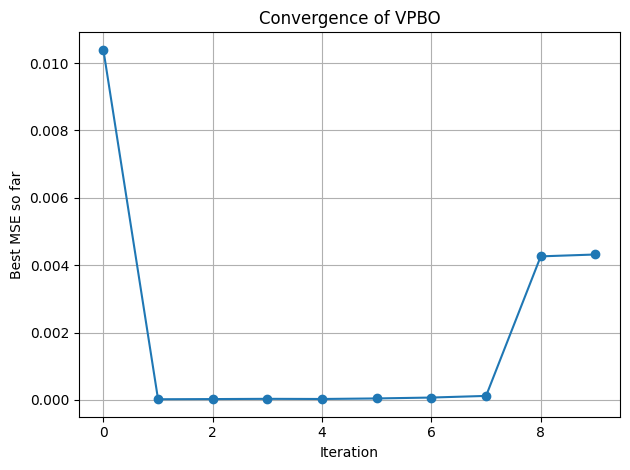

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process.kernels import RBF
from scipy.optimize import Bounds
import dcor
from joblib import Parallel, delayed
import time
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Load data
df = pd.read_csv("df_encoded.csv")

selected_features = [
    'surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
    'manufacturingCost', 'mouldValidationCost', 'designTime',
    'hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
    'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
    'weightCavityProcessed', 'weightMould', 'totalDistance',
    'injectedMaterial_product', 'injectedMaterialCost',
    'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
    'productVolume', 'materozzaVolume', 'nProdottiAnno', 'materialDensity',
    'tolerance', 'surfaceFinishing', 'machineCycleTime', 'maintenanceCost',
    'productionCost', 'injectedMaterial_materozza',
    'injectionMouldingProcess', 'steelPrice', 'mouldMaterialName',
    'machineName', 'EUUSMacchina', 'CNMacchina', 'setupTime',
    'deliveryVolume', 'deliveryPeriod'
]

target_columns = ['Cost', 'resources - total', 'human health - total', 'ecosystem quality - total']

X_raw = df[selected_features].values
Y_raw = df[target_columns].values

scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X_raw)

scaler_y = MinMaxScaler()
Y_scaled = scaler_y.fit_transform(Y_raw)

# Distance correlation filter
def dcor_filter(X, y, threshold):
    selected = []
    for i in range(X.shape[1]):
        corr = np.mean([dcor.distance_correlation(X[:, i], y[:, j]) for j in range(y.shape[1])])
        if corr >= threshold:
            selected.append(i)
    return X[:, selected], selected

# MLP evaluator for multiple targets
def mlp_eval(x_batch, *args):
    X_full, y_full = args
    results = []
    for x in x_batch:
        threshold = x[0]
        hidden_size = int(x[1] * (200 - 10) + 10)
        X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.2)

        X_sel, selected = dcor_filter(X_train, y_train, threshold)
        if X_sel.shape[1] == 0:
            results.append([1e6])
            continue

        X_val_sel = X_val[:, selected]
        model = MLPRegressor(hidden_layer_sizes=(hidden_size,), max_iter=300, random_state=0)
        model.fit(X_sel, y_train)
        y_pred = model.predict(X_val_sel)
        error = mean_squared_error(y_val, y_pred)
        results.append([error])
    return results

# Reference model
def ref_model(x_batch, *args):
    return np.zeros((x_batch.shape[0], 1))

# BO class
class BO:
    def __init__(self, distmod, args, dist_ref, ref_args, dim, bounds,
                 descale, kernel, exp_w, ub, lb, system='default'):
        self.distmod = distmod
        self.args = args
        self.dist_ref = dist_ref
        self.ref_args = ref_args
        self.dim = dim
        self.bounds = bounds
        self.descale = descale
        self.kernel = kernel
        self.exp_w = exp_w
        self.ub = ub
        self.lb = lb
        self.system = system

    def optimizer_vpbo(self, trials, split_num, lim_init,
                       f_cores=1, af_cores=1, ref_cores=1, x_init=None):
        print('Variable Partitioned BO run...')
        start = time.time()
        self.trials_vp = trials
        splits = split_num
        self.time_vp = np.zeros(self.trials_vp)
        self.time_fvp = np.zeros(self.trials_vp)
        div = int(self.dim / splits)
        ref_mod = self.dist_ref['distrefmod']

        x = lim_init * np.ones((splits, self.dim))
        lwr = x.copy()
        upr = x.copy() + 1e-6
        print(f"x shape: {x.shape}, lwr shape: {lwr.shape}, upr shape: {upr.shape}")
        print(f"splits: {splits}, div: {div}")
        for i in range(splits):
            if x_init is None:
                x[i, i * div:(i + 1) * div] = np.random.uniform(self.bounds.lb,
                                                                self.bounds.ub,
                                                                (1, div))
            else:
                x_init = x_init.reshape(1, self.dim)
                x[i, i * div:(i + 1) * div] = x_init[0, i * div:(i + 1) * div]
            lwr[i, i * div:(i + 1) * div] = self.bounds.lb[i]
            upr[i, i * div:(i + 1) * div] = self.bounds.ub[i]
        x = np.vstack([x, lim_init])

        init_pts = int(len(x) / splits)
        splt = int(x.shape[0] / f_cores)
        x_bs = np.array(np.ones(f_cores), dtype=object)

        for i in range(f_cores - 1):
            x_bs[i] = x[i * splt:(i + 1) * splt, :]
        x_bs[-1] = x[(f_cores - 1) * splt:, :]

        start_f = time.time()
        y = Parallel(n_jobs=f_cores)(delayed(self.distmod)(x_s, *self.args) for x_s in x_bs)
        y = np.vstack(y[:])
        y_ref = np.zeros_like(y)
        eps = y - y_ref
        y_bst = np.min(y, axis=0).reshape(-1, 1).T

        model_vp = {}
        bnds_var = {}
        for i in range(splits):
            model_vp[str(i + 1)] = GaussianProcessRegressor(self.kernel,
                                                            alpha=1e-6,
                                                            n_restarts_optimizer=10,
                                                            normalize_y=True)
            model_vp[str(i + 1)].fit(x, eps[:, 0])

            lwr[i] = x[np.argmin(y[:, 0])]
            upr[i] = x[np.argmin(y[:, 0])] + 1e-6
            lwr[i, i * div:(i + 1) * div] = self.bounds.lb[i]
            upr[i, i * div:(i + 1) * div] = self.bounds.ub[i]
            bnds_var[str(i + 1)] = Bounds(lwr[i], upr[i])

        x_nxt = x.copy()
        x_nxtbs = np.array(np.ones(f_cores), dtype=object)

        for i in range(init_pts):
            end = time.time()
            self.time_vp[i] = (i + 1) * (end - start) / init_pts
            self.time_fvp[i] = (i + 1) * (end - start_f) / init_pts
            print(f'Init {i+1}/{init_pts}, Time: {self.time_vp[i]:.2f}s')

        for i in range(trials - init_pts):
            x0 = np.random.uniform(self.bounds.lb, self.bounds.ub, (16, self.dim))
            x_nxt[i % splits] = x0[np.random.randint(len(x0))]

            for j in range(f_cores - 1):
                x_nxtbs[j] = x_nxt[j * splt:(j + 1) * splt, :]
            x_nxtbs[-1] = x_nxt[(f_cores - 1) * splt:, :]

            start_f = time.time()
            y_nxt = Parallel(n_jobs=f_cores)(delayed(self.distmod)(x_s, *self.args) for x_s in x_nxtbs)
            y_nxt = np.vstack(y_nxt[:])
            y_ref_nxt = np.zeros_like(y_nxt)
            eps_nxt = y_nxt - y_ref_nxt

            x = np.vstack([x, x_nxt])
            y = np.vstack([y, y_nxt])
            eps = np.vstack([eps, eps_nxt])
            y_bst = np.vstack([y_bst, np.min(y_nxt, axis=0).reshape(-1, 1).T])

            for j in range(splits):
                model_vp[str(j + 1)].fit(x, eps[:, 0])
                bnds_var[str(j + 1)] = Bounds(lwr[j], upr[j])

            self.time_vp[i + init_pts] = time.time() - start
            self.time_fvp[i + init_pts] = time.time() - start_f
            print(f'Iter {i+1}/{trials-init_pts}, Best error: {y_bst[-1,0]:.4f}')

        self.vpbo_optim = True
        self.model_vp = model_vp
        self.x_vp = self.descale(x)
        self.y_vp = y
        self.y_vpbst = y_bst

# Run
bo = BO(
    distmod=mlp_eval,
    args=(X_scaled, Y_scaled),  # MULTI-TARGET support
    dist_ref={'distrefmod': ref_model},
    ref_args=(),
    dim=X_scaled.shape[1],
    bounds=Bounds(np.zeros(X_scaled.shape[1]), np.ones(X_scaled.shape[1])),
    descale=lambda x: x,
    kernel=1.0 * RBF(length_scale=1.0),
    exp_w=0.1,
    ub=np.ones(X_scaled.shape[1]),
    lb=np.zeros(X_scaled.shape[1]),
    system='mlp_opt'
)

lim_init = np.random.uniform(0, 1, bo.dim)
x_init = np.random.uniform(0, 1, bo.dim)

bo.optimizer_vpbo(
    trials=10,
    split_num=4,
    lim_init=lim_init,
    f_cores=4,  # PARALLEL CPU
    af_cores=1,
    ref_cores=1,
    x_init=x_init
)

# Best result
best_idx = np.argmin(bo.y_vp)
best_input = bo.x_vp[best_idx]
best_error = bo.y_vp[best_idx]

threshold_best = best_input[0]
hidden_size_best = int(best_input[1] * (200 - 10) + 10)

print("\n🎯 Best Hyperparameters Found:")
print(f"Distance Threshold: {threshold_best:.3f}")
print(f"Hidden Layer Size: {hidden_size_best}")
print(f"Validation MSE: {best_error[0]:.4f}")

# 🔍 Visualize convergence
plt.plot(bo.y_vpbst[:, 0], marker='o')
plt.xlabel("Iteration")
plt.ylabel("Best MSE so far")
plt.title("Convergence of VPBO")
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import joblib

def mlp_eval_multi(x, X, Y, seed=0):
    np.random.seed(seed)
    threshold = x[0]
    hidden_size = int(x[1] * (200 - 10) + 10)

    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=seed)

    total_mse = []
    for i in range(Y.shape[1]):
        y_train = Y_train[:, i]
        y_val = Y_val[:, i]

        selected = dcor_filter(X_train, y_train, threshold)
        if not selected:
            total_mse.append(1e6)
            continue

        model = MLPRegressor(hidden_layer_sizes=(hidden_size,), max_iter=300, random_state=seed)
        model.fit(X_train[:, selected], y_train.ravel())
        y_pred = model.predict(X_val[:, selected])
        mse = mean_squared_error(y_val, y_pred)
        total_mse.append(mse)

    return np.mean(total_mse)


def run_vpbo_multi_target(X, Y, trials=20, split_num=4, n_jobs=-1):
    lb = np.array([0.0, 0.0])
    ub = np.array([1.0, 1.0])
    bounds = Bounds(lb, ub)

    def single_trial(seed):
        np.random.seed(seed)
        x = np.random.uniform(lb, ub)
        err = mlp_eval_multi(x, X, Y, seed=seed)
        return x, err

    seeds = np.random.randint(0, 1000000, size=trials)
    results = joblib.Parallel(n_jobs=n_jobs)(
        joblib.delayed(single_trial)(s) for s in seeds
    )

    best_x, best_err = min(results, key=lambda x: x[1])
    return results, best_x, best_err

# Run VPBO-style MLP optimization
results, best_x, best_err = run_vpbo_multi_target(X_scaled, Y_scaled, trials=20, split_num=4, n_jobs=4)

print("Best input:", best_x)
print("Best validation error:", best_err)
print(f"Best threshold = {best_x[0]:.3f}, Hidden Layer Size = {int(best_x[1] * 190 + 10)}")

plot_vpbo_convergence(results)


IndexError: tuple index out of range

Trial 01 | x: [0.727 0.907] | MSE: 1000000.00000
Trial 02 | x: [0.383 0.222] | MSE: 1000000.00000
Trial 03 | x: [0.046 0.088] | MSE: 2.30108
Trial 04 | x: [0.667 0.204] | MSE: 1000000.00000
Trial 05 | x: [0.554 0.723] | MSE: 1000000.00000
Trial 06 | x: [0.414 0.055] | MSE: 1000000.00000
Trial 07 | x: [0.644 0.513] | MSE: 1000000.00000
Trial 08 | x: [0.755 0.772] | MSE: 1000000.00000
Trial 09 | x: [0.881 0.404] | MSE: 1000000.00000
Trial 10 | x: [0.836 0.738] | MSE: 1000000.00000
Trial 11 | x: [0.792 0.05 ] | MSE: 1000000.00000
Trial 12 | x: [0.562 0.812] | MSE: 1000000.00000
Trial 13 | x: [0.676 0.721] | MSE: 1000000.00000
Trial 14 | x: [0.584 0.922] | MSE: 1000000.00000
Trial 15 | x: [0.426 0.238] | MSE: 1000000.00000
Trial 16 | x: [0.431 0.794] | MSE: 1000000.00000
Trial 17 | x: [0.334 0.149] | MSE: 1000000.00000
Trial 18 | x: [0.623 0.322] | MSE: 1000000.00000
Trial 19 | x: [0.411 0.891] | MSE: 1000000.00000
Trial 20 | x: [0.194 0.605] | MSE: 1000000.00000


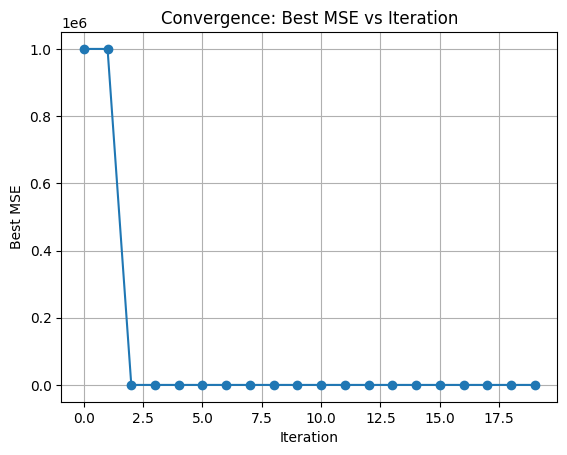


Best Configuration:
Distance Threshold: 0.046
Hidden Layer Size: 26
Validation MSE: 2.30108


In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from scipy.optimize import Bounds
import matplotlib.pyplot as plt
import dcor
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# --- Simulated data: Replace with your actual df ---
np.random.seed(0)
n_samples = 1000
n_features = 40
X = np.random.rand(n_samples, n_features)
Y = np.random.rand(n_samples, 4)  # 4 targets

# Scale
scaler_x = StandardScaler().fit(X)
scaler_y = StandardScaler().fit(Y)
X_scaled = scaler_x.transform(X)
Y_scaled = scaler_y.transform(Y)

# --- Feature selection function ---
def dcor_filter(X, y, threshold):
    selected = []
    for i in range(X.shape[1]):
        corr = dcor.distance_correlation(X[:, i], y)
        if corr >= threshold:
            selected.append(i)
    return X[:, selected], selected

# --- Evaluation function (for optimizer) ---
def mlp_multi_eval(x, *args):
    threshold = x[0]
    hidden_size = int(x[1] * 190 + 10)

    X, Y = args
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Use distance correlation on each output, take union of selected features
    selected_indices = set()
    for i in range(Y.shape[1]):
        _, idxs = dcor_filter(X_train, Y_train[:, i], threshold)
        selected_indices.update(idxs)

    if len(selected_indices) == 0:
        return [1e6]  # penalty

    selected_indices = sorted(list(selected_indices))
    X_train_sel = X_train[:, selected_indices]
    X_val_sel = X_val[:, selected_indices]

    base_model = MLPRegressor(hidden_layer_sizes=(hidden_size,), max_iter=500)
    model = MultiOutputRegressor(base_model, n_jobs=-1)  # Parallel

    model.fit(X_train_sel, Y_train)
    Y_pred = model.predict(X_val_sel)
    error = mean_squared_error(Y_val, Y_pred)
    return [error]

# --- Bayesian Optimization Class (Simplified) ---
class SimpleBO:
    def __init__(self, func, bounds, args):
        self.func = func
        self.bounds = bounds
        self.args = args
        self.xs = []
        self.ys = []

    def random_search(self, trials=20):
        for i in range(trials):
            x = np.random.uniform(self.bounds.lb, self.bounds.ub)
            y = self.func(x, *self.args)
            self.xs.append(x)
            self.ys.append(y[0])
            print(f"Trial {i+1:02d} | x: {x.round(3)} | MSE: {y[0]:.5f}")

    def plot_convergence(self):
        import matplotlib.pyplot as plt
        best_so_far = np.minimum.accumulate(self.ys)
        plt.plot(best_so_far, marker='o')
        plt.title("Convergence: Best MSE vs Iteration")
        plt.xlabel("Iteration")
        plt.ylabel("Best MSE")
        plt.grid(True)
        plt.show()

# --- Setup bounds and run optimization ---
lb = np.array([0.0, 0.0])  # threshold, layer size
ub = np.array([1.0, 1.0])
bounds = Bounds(lb, ub)

bo = SimpleBO(mlp_multi_eval, bounds, args=(X_scaled, Y_scaled))
bo.random_search(trials=20)
bo.plot_convergence()

# --- Report best configuration ---
best_idx = np.argmin(bo.ys)
best_x = bo.xs[best_idx]
print("\nBest Configuration:")
print(f"Distance Threshold: {best_x[0]:.3f}")
print(f"Hidden Layer Size: {int(best_x[1] * 190 + 10)}")
print(f"Validation MSE: {bo.ys[best_idx]:.5f}")


Encoded df file loaded successfully.
Trial 1/15: Best MSE = 0.0000, Min Time = 3.0721s
Trial 2/15: Best MSE = 0.0000, Min Time = 2.6464s
Trial 3/15: Best MSE = 0.0000, Min Time = 2.6464s
Trial 4/15: Best MSE = 0.0000, Min Time = 2.1029s
Trial 5/15: Best MSE = 0.0000, Min Time = 2.1029s
Trial 6/15: Best MSE = 0.0000, Min Time = 2.1029s
Trial 7/15: Best MSE = 0.0000, Min Time = 2.1029s
Trial 8/15: Best MSE = 0.0000, Min Time = 1.9322s
Trial 9/15: Best MSE = 0.0000, Min Time = 1.9322s
Trial 10/15: Best MSE = 0.0000, Min Time = 1.9322s
Trial 11/15: Best MSE = 0.0000, Min Time = 1.9322s
Trial 12/15: Best MSE = 0.0000, Min Time = 1.9322s
Trial 13/15: Best MSE = 0.0000, Min Time = 1.9322s
Trial 14/15: Best MSE = 0.0000, Min Time = 1.9322s
Trial 15/15: Best MSE = 0.0000, Min Time = 1.9322s


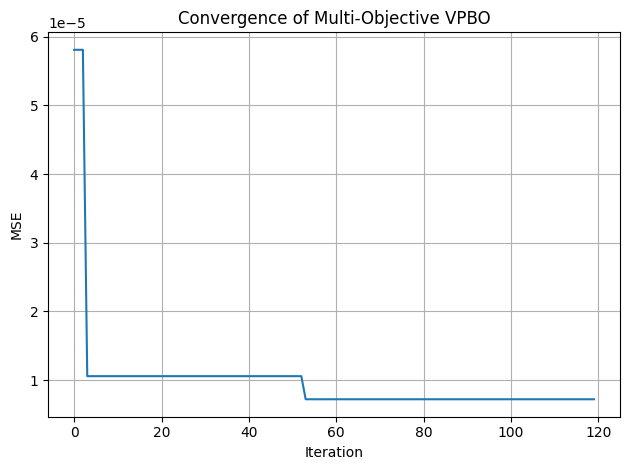


🎯 Best Hyperparameters Found:
Distance Threshold: 0.068
Hidden Layer Size: 117
Validation MSE: 0.0000
Training Time: 8.4285 seconds


In [7]:
import numpy as np
import pandas as pd
import torch
import gpytorch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from scipy.optimize import Bounds
from joblib import Parallel, delayed
import dcor
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from omegaconf import OmegaConf
from pathlib import Path

# Load the configuration file
config_path = "config.yaml"  # Replace with the path to your config file
config = OmegaConf.load(config_path)

# Extract the hotcold file path from the config
scaled_data_file = config.get("df_encoded", None)

# Check if the file exists
if scaled_data_file and Path(scaled_data_file).is_file():
    # Load the hotcold file
    df = pd.read_csv(scaled_data_file)
    print("Encoded df file loaded successfully.")
else:
    print(f"Error: Encoded df file not found at {scaled_data_file}")

# === Load and preprocess data ===

#df = pd.read_csv("df_encoded.csv")

selected_features = [  # your feature list
    'surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
    'manufacturingCost', 'mouldValidationCost', 'designTime',
    'hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
    'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
    'weightCavityProcessed', 'weightMould', 'totalDistance',
    'injectedMaterial_product', 'injectedMaterialCost',
    'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
    'productVolume', 'materozzaVolume', 'nProdottiAnno', 'materialDensity',
    'tolerance', 'surfaceFinishing', 'machineCycleTime', 'maintenanceCost',
    'productionCost', 'injectedMaterial_materozza',
    'injectionMouldingProcess', 'steelPrice', 'mouldMaterialName',
    'machineName', 'EUUSMacchina', 'CNMacchina', 'setupTime',
    'deliveryVolume', 'deliveryPeriod'
]
target_columns = ['Cost', 'resources - total', 'human health - total', 'ecosystem quality - total']

X_raw = df[selected_features].values
Y_raw = df[target_columns].values

scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X_raw)

scaler_y = MinMaxScaler()
Y_scaled = scaler_y.fit_transform(Y_raw)

# === Distance correlation filter ===
def dcor_filter(X, y, threshold):
    selected = []
    for i in range(X.shape[1]):
        corr = np.mean([dcor.distance_correlation(X[:, i], y[:, j]) for j in range(y.shape[1])])
        if corr >= threshold:
            selected.append(i)
    return X[:, selected], selected

# === Multi-objective evaluator (MSE + training time) ===
def mlp_eval_multiobj(x_batch, *args):
    X_full, y_full = args
    results = []
    for x in x_batch:
        threshold = x[0]
        hidden_size = int(x[1] * (200 - 10) + 10)
        X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.2)

        X_sel, selected = dcor_filter(X_train, y_train, threshold)
        if X_sel.shape[1] == 0:
            results.append([1e6, 1e3])
            continue

        X_val_sel = X_val[:, selected]
        model = MLPRegressor(hidden_layer_sizes=(hidden_size,), max_iter=300, random_state=0)
        
        start_time = time.time()
        model.fit(X_sel, y_train)
        duration = time.time() - start_time

        y_pred = model.predict(X_val_sel)
        mse = mean_squared_error(y_val, y_pred)
        results.append([mse, duration])
    return results

# === Dummy ref model ===
def ref_model(x_batch, *args):
    return np.zeros((x_batch.shape[0], 2))

# === Sparse GP model with GPyTorch ===
class SparseGPModel(gpytorch.models.ApproximateGP):
    def __init__(self, inducing_points):
        variational_distribution = gpytorch.variational.CholeskyVariationalDistribution(inducing_points.size(0))
        variational_strategy = gpytorch.variational.VariationalStrategy(
            self, inducing_points, variational_distribution, learn_inducing_locations=True
        )
        super().__init__(variational_strategy)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# === Train Sparse GP ===
def train_gp_model(x_train, y_train):
    x_train = torch.tensor(x_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32)

    # Use subset of training data as inducing points
    inducing_points = x_train[:min(128, len(x_train))]

    model = SparseGPModel(inducing_points)
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model.train()
    likelihood.train()

    optimizer = torch.optim.Adam([
        {'params': model.parameters()},
        {'params': likelihood.parameters()},
    ], lr=0.01)

    mll = gpytorch.mlls.VariationalELBO(likelihood, model, num_data=y_train.size(0))

    for i in range(100):
        optimizer.zero_grad()
        output = model(x_train)
        loss = -mll(output, y_train)
        loss.backward()
        optimizer.step()

    return model, likelihood

# === Run a VPBO-like loop ===
def vpbo_sparsegp(trials=10):
    X = []
    Y = []

    dim = 2
    bounds = Bounds([0, 0], [1, 1])

    for i in range(trials):
        x = np.random.uniform(bounds.lb, bounds.ub, (8, dim))
        y = mlp_eval_multiobj(x, X_scaled, Y_scaled)
        X.extend(x)
        Y.extend(y)

        X_arr = np.array(X)
        Y_arr = np.array(Y)

        print(f"Trial {i+1}/{trials}: Best MSE = {np.min(Y_arr[:,0]):.4f}, Min Time = {np.min(Y_arr[:,1]):.4f}s")

    # Fit Sparse GPs on each objective
    model_mse, lk_mse = train_gp_model(X_arr, Y_arr[:, 0])
    model_time, lk_time = train_gp_model(X_arr, Y_arr[:, 1])

    return X_arr, Y_arr, model_mse, lk_mse, model_time, lk_time

# === Run the optimization ===
X_hist, Y_hist, model_mse, lik_mse, model_time, lik_time = vpbo_sparsegp(trials=15)

# === Plot convergence ===
plt.plot(np.minimum.accumulate(Y_hist[:, 0]), label='Best MSE')
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Convergence of Multi-Objective VPBO")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print best result
best_idx = np.argmin(Y_hist[:, 0])
best_input = X_hist[best_idx]
print("\n🎯 Best Hyperparameters Found:")
print(f"Distance Threshold: {best_input[0]:.3f}")
print(f"Hidden Layer Size: {int(best_input[1] * (200 - 10) + 10)}")
print(f"Validation MSE: {Y_hist[best_idx, 0]:.4f}")
print(f"Training Time: {Y_hist[best_idx, 1]:.4f} seconds")
